In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PATH = "C:\\Users\\User\\Desktop\\CSVD_case.csv"

In [4]:
df = pd.read_csv(PATH, encoding = 'big5')

In [5]:
df = df.rename(columns={'Unnamed: 0': 'name'})

In [6]:
df.head(4)

name        No  total  lacune  microbleeds  PVS  WMH  frontal_mean  \
0   王明錦  16976407      3       1            2   10    3      0.013949   
1   林東龍    126690      4       5           15    3    3      0.000937   
2  黃范勤金  17085009      3       0           15    4    3      0.032223   
3   黃龍山  15060036      3       3            3    5    3      0.004575   

   Parietal_mean   WM_mean   CH_mean   BG_mean   TH_mean   GM_mean  total_mean  
0       0.017570  0.015760  0.033537  0.031380  0.011507  0.025475    0.020617  
1       0.001337  0.001137  0.000927  0.006990  0.000860  0.002926    0.002031  
2       0.102379  0.055608  0.049664  0.067837  0.018161  0.045221    0.050414  
3       0.096088  0.050331  0.036669  0.075415  0.027230  0.046438    0.048385

In [7]:
data = df.values[:,2:]

In [96]:
lacune = np.unique(df.lacune.values)
microbleeds = np.unique(df.microbleeds.values)
PVS = np.unique(df.PVS.values)
WMH = np.unique(df.WMH.values)
total = np.unique(df.total.values)

In [97]:
total

array([0, 1, 2, 3, 4], dtype=int64)

In [98]:
result_mean = []
result_std = []
criteria_list = []
separte_list = []
for total_score in total:
    for lacune_num in lacune:
        for micro_num in microbleeds:
            for PVS_num in PVS:
                for WMH_num in WMH:
                    criteria_list.append([total_score, lacune_num, micro_num, PVS_num, WMH_num])
                    criteria = (data[:,0]>=total_score) & (data[:,1]>=lacune_num) & (data[:,2]>=micro_num) & (data[:,3]>=PVS_num) & (data[:,4]>=WMH_num)
                    class1 = np.array(data[criteria][:,5:],dtype=np.float64)
                    class2 =  np.array(data[criteria == False][:,5:],dtype=np.float64)
                    
                    class1_mean = np.mean(class1, axis=0)
                    class1_std = np.std(class1, axis=0)
                    class2_mean = np.mean(class2, axis=0)
                    class2_std = np.std(class2, axis=0)
                    
                    result_mean.append([class1_mean, class2_mean])
                    result_std.append([class1_std, class2_std])
                    separte_list.append([class1, class2])

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [92]:
for result in range(8):
    if (len(separte_list[0][0])==0) or (len(separte_list[0][1])==0):
        continue
    else:
#         print(separte_list[0][0])
        gp1 = separte_list[0][0][:,result]
        gp2 = separte_list[0][1][:,result]
    
        
        plt.boxplot([gp1, gp2], labels=("class 1", "class 2"))
#     plt.boxplot(gp2, labels="class 2")
        plt.subtitle("criteria = ")
        plt.show()

In [93]:
length = []
for i in separte_list:
    length.append(len(i[0]))

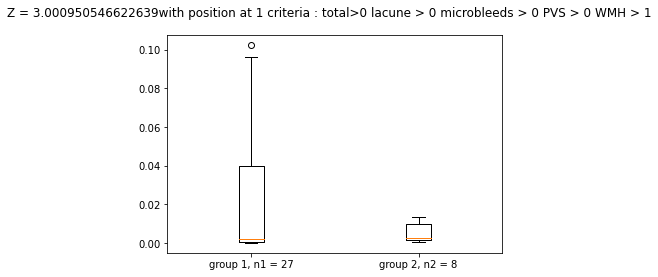

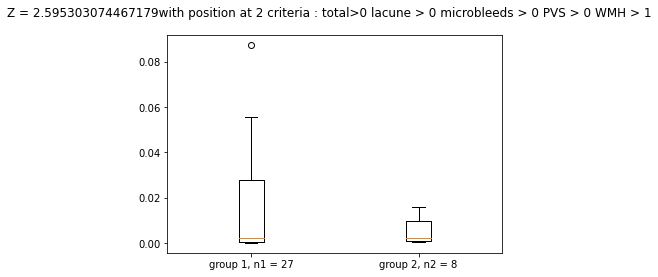

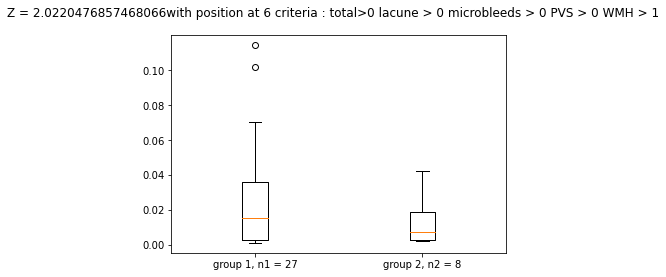

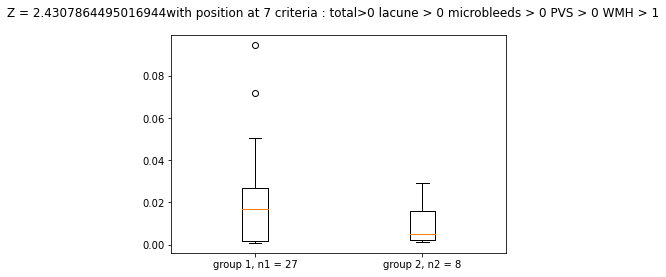

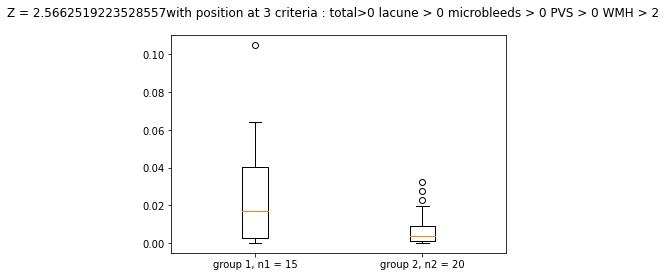

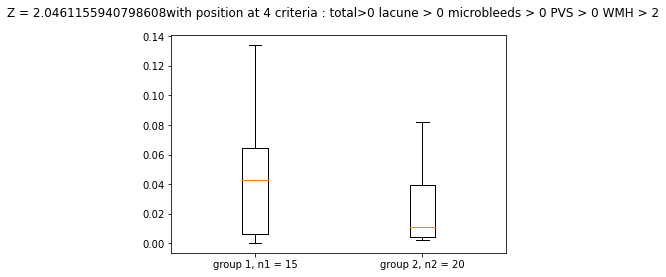

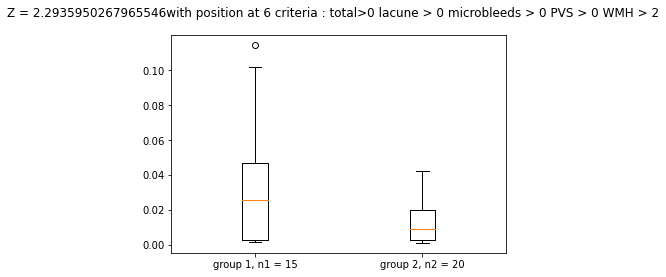

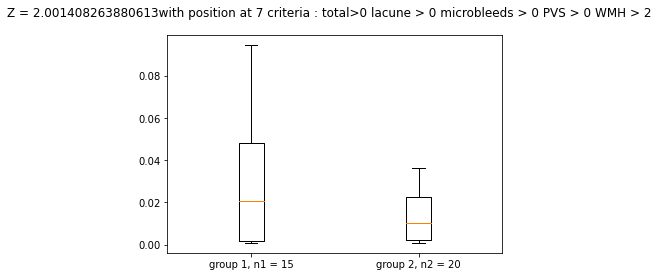

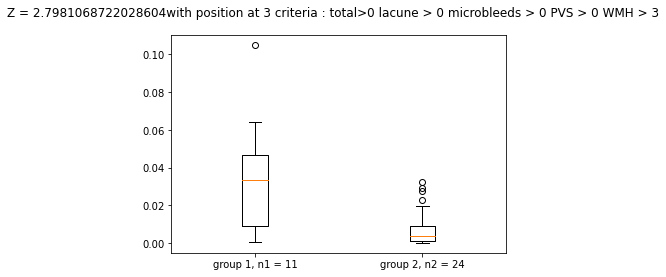

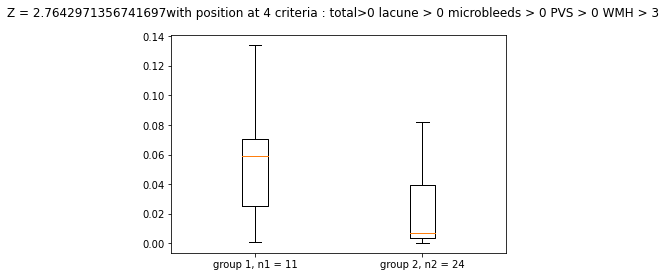

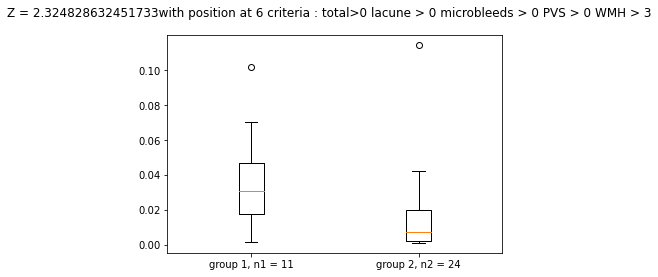

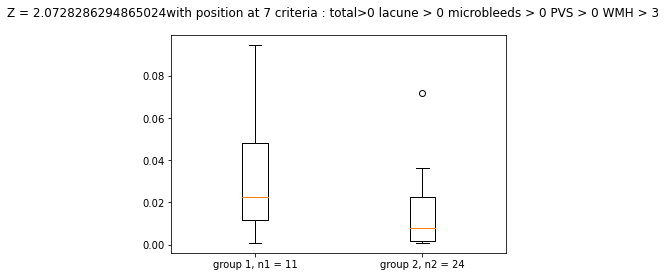

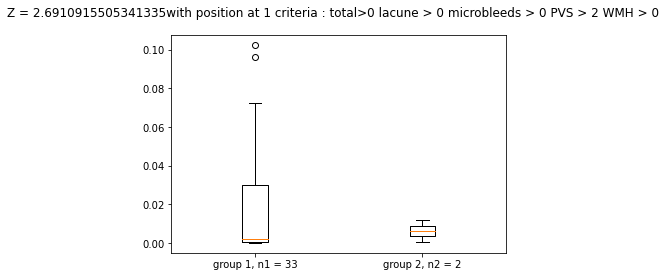

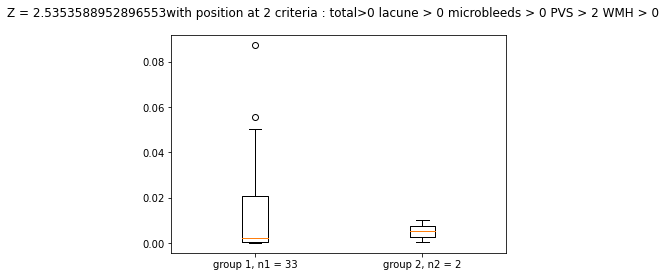

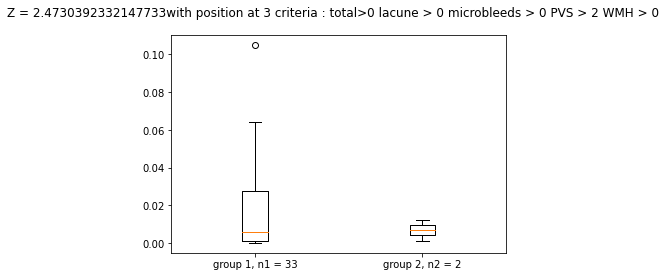

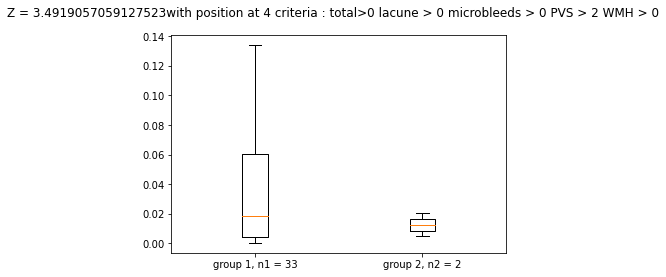

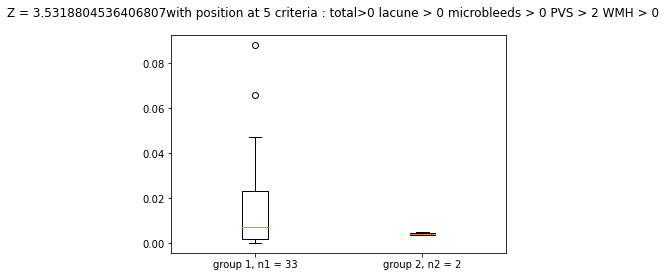

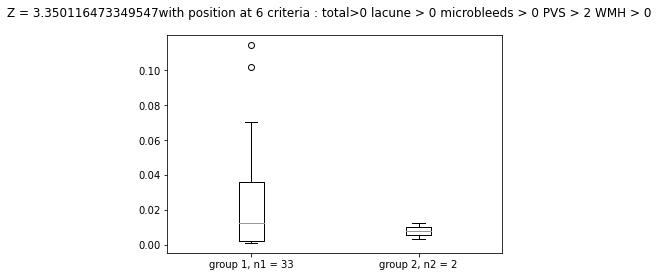

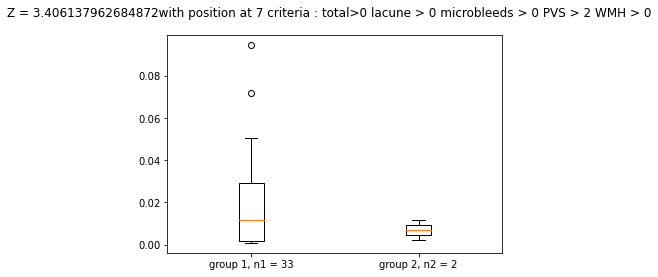

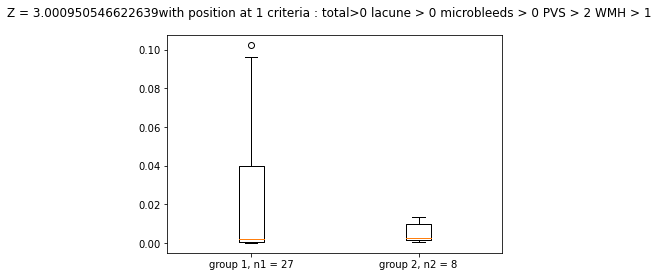

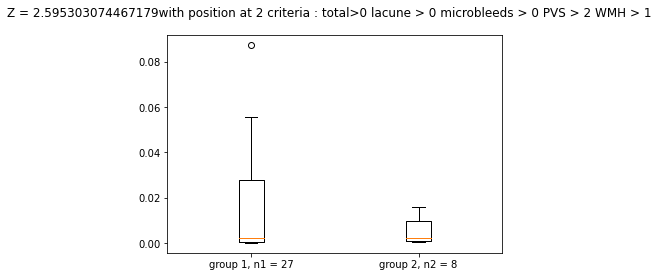

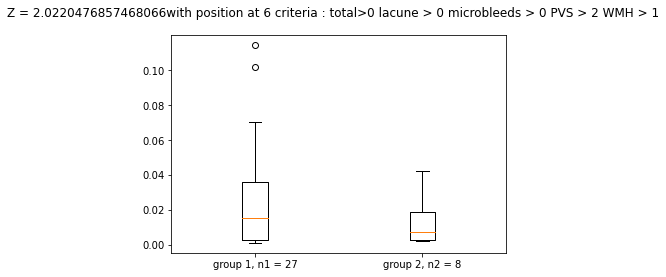

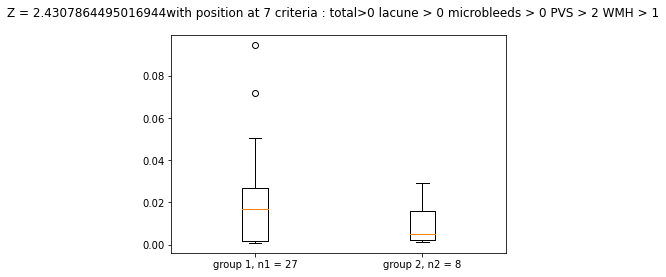

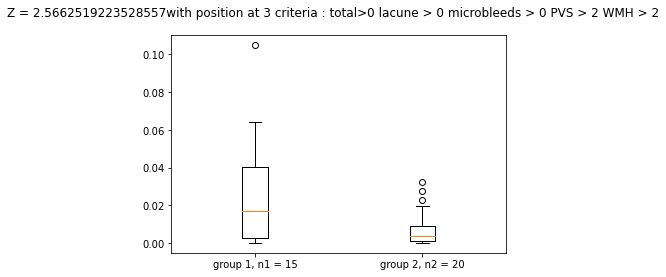

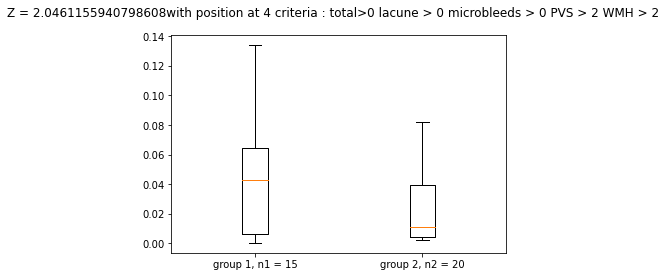

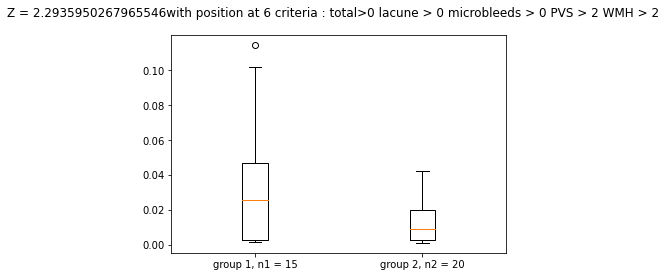

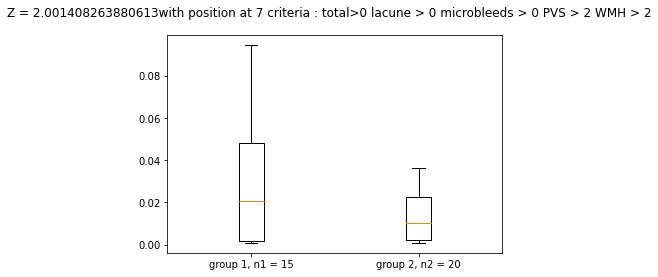

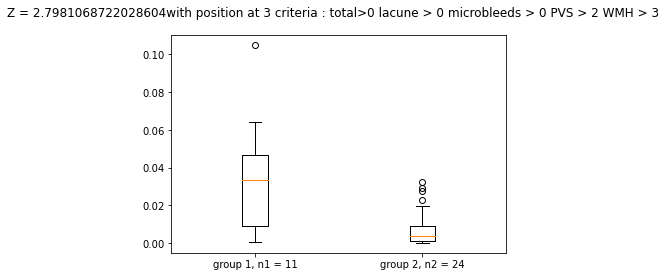

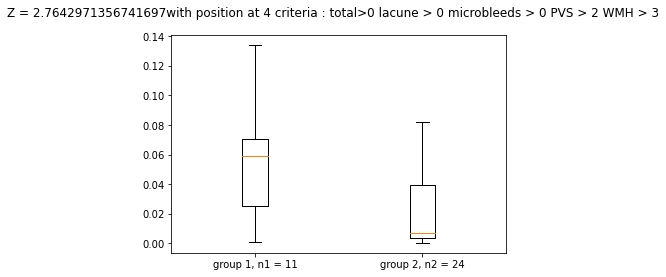

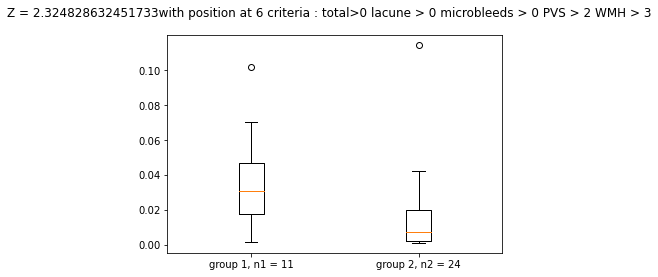

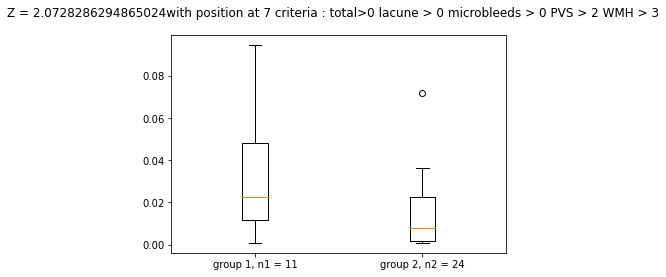

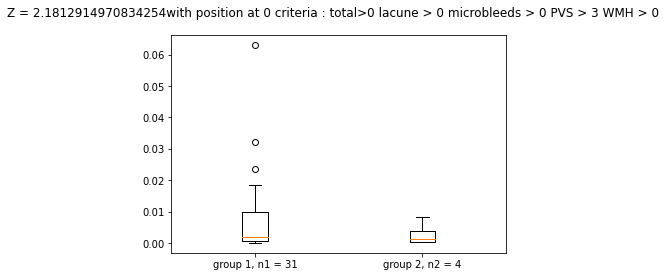

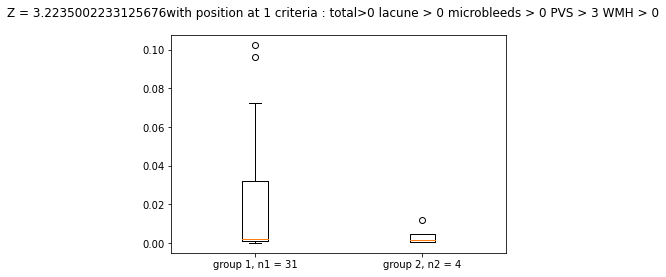

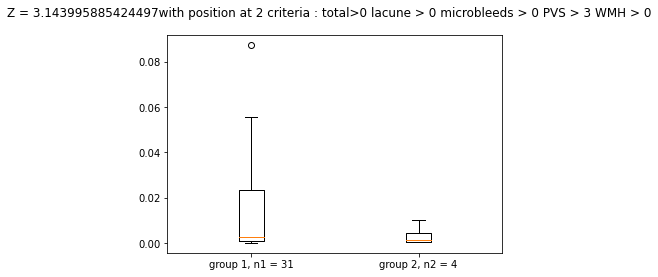

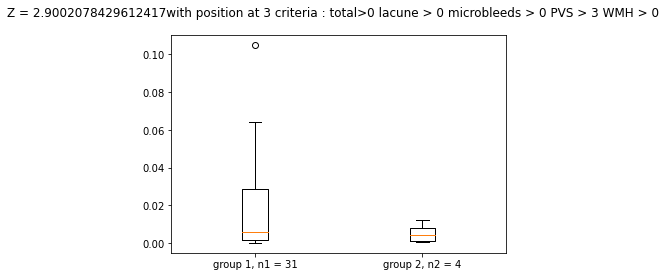

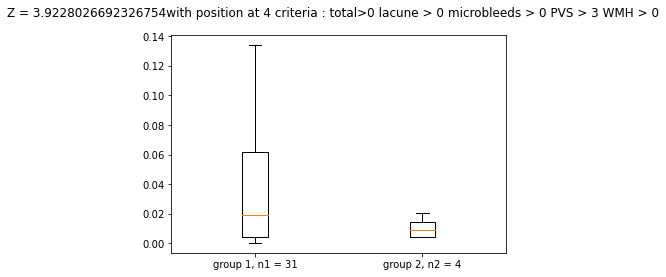

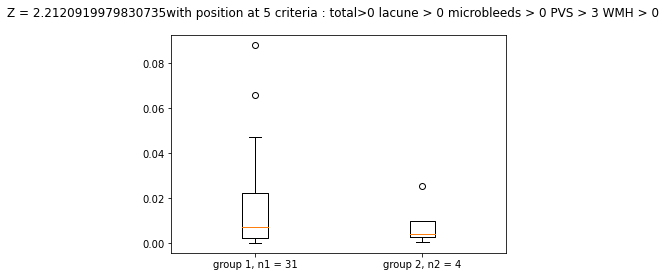

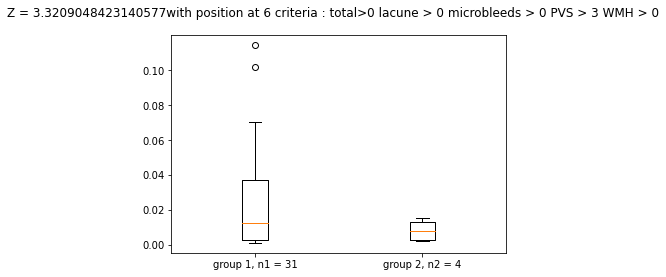

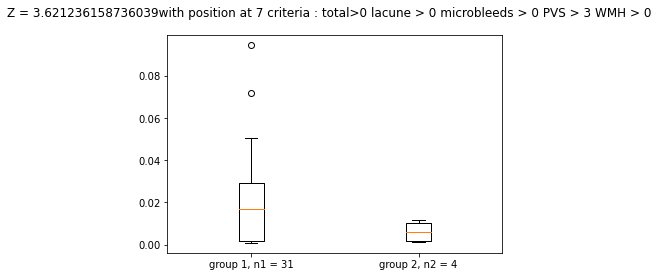

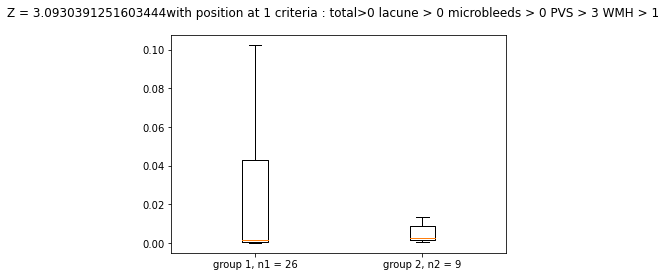

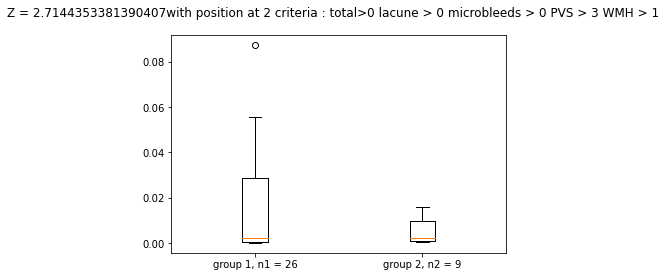

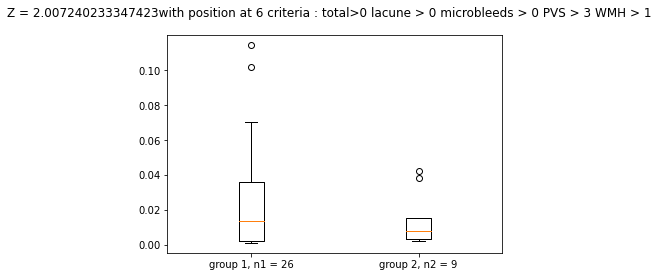

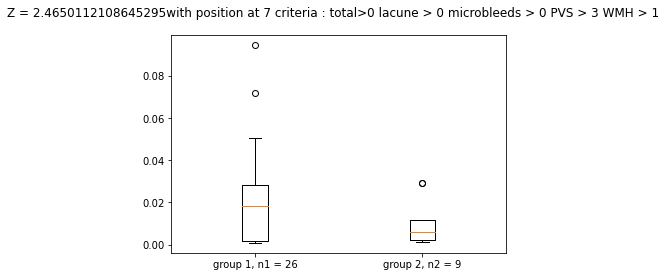

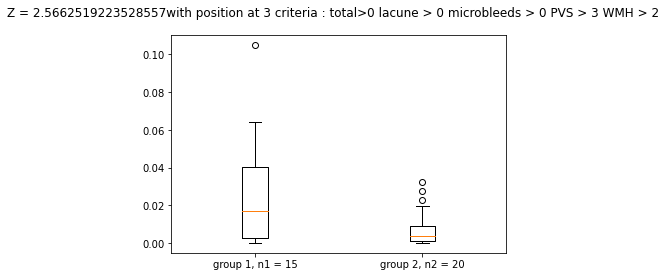

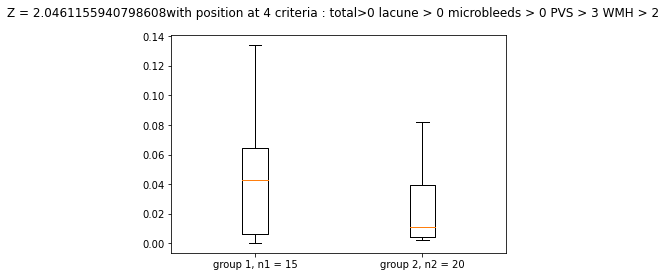

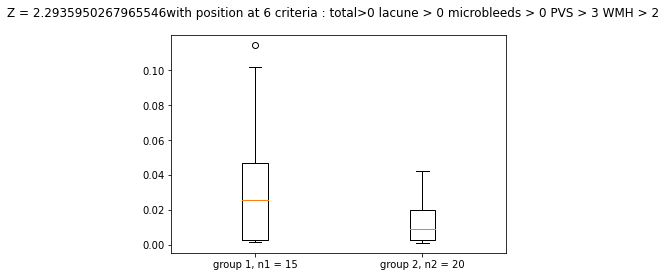

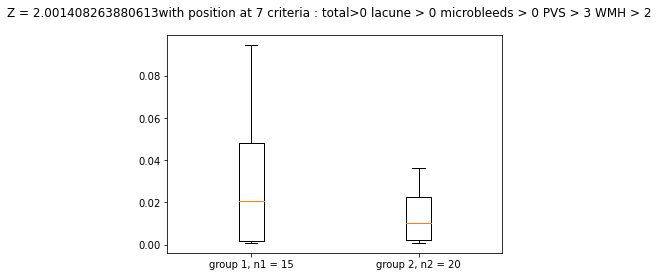

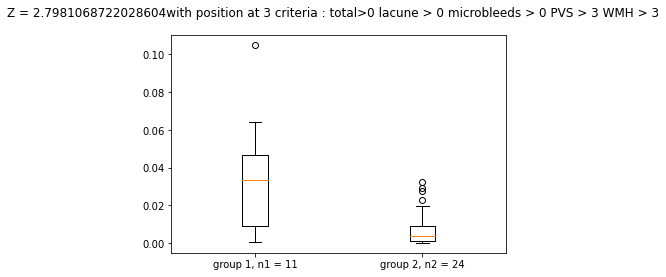

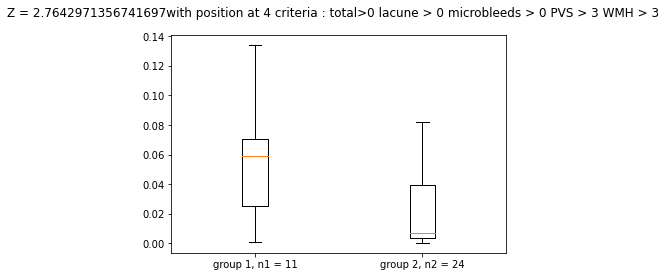

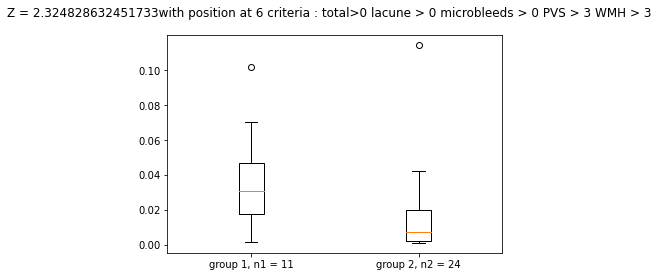

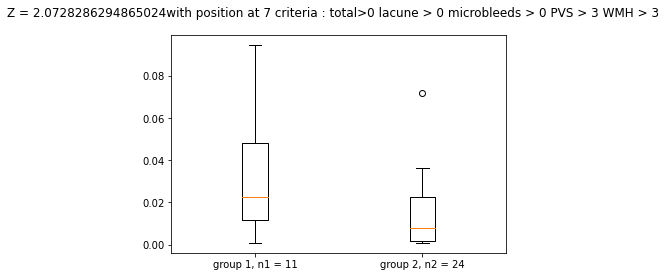

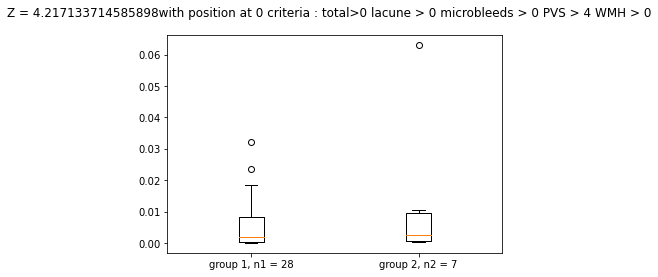

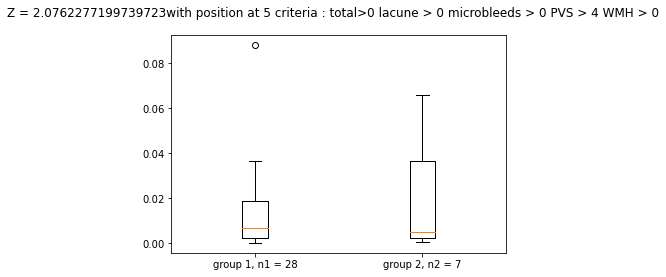

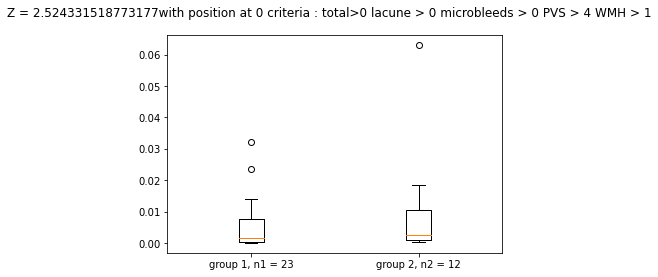

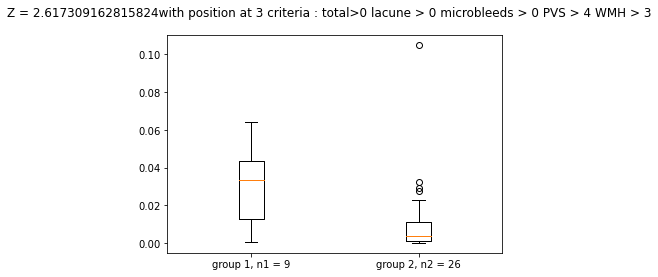

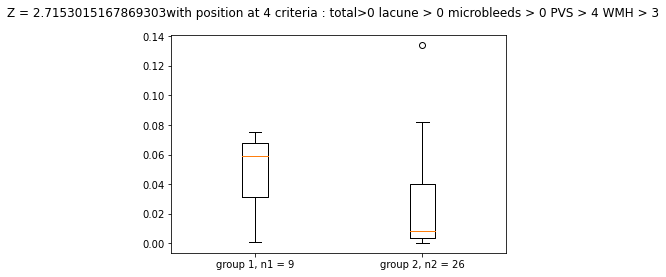

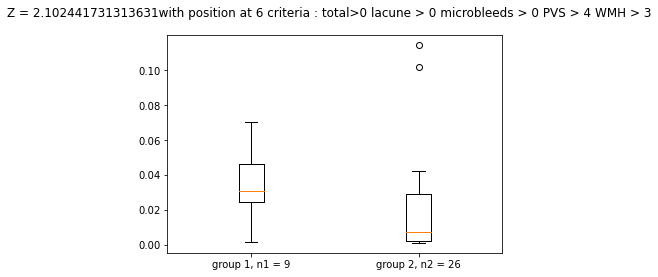

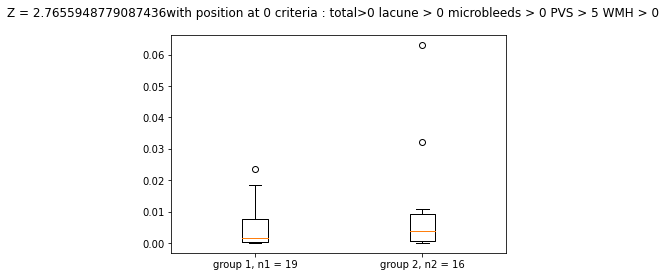

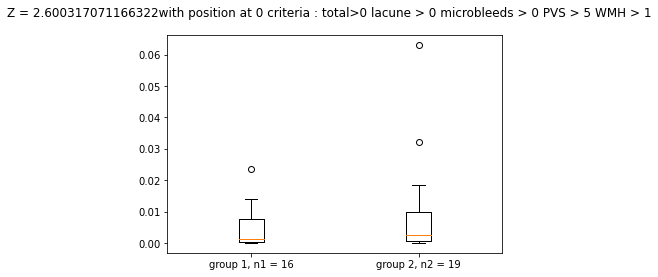

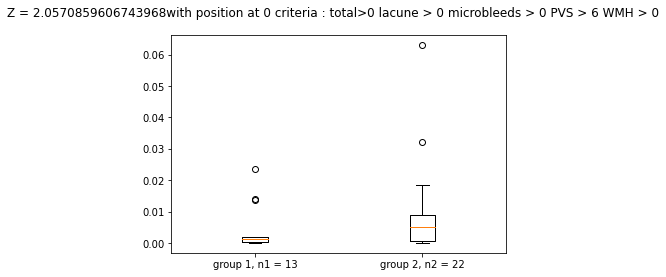

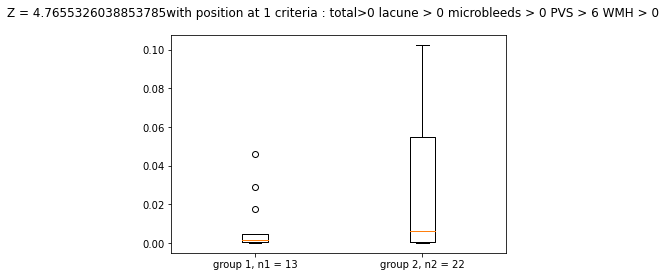

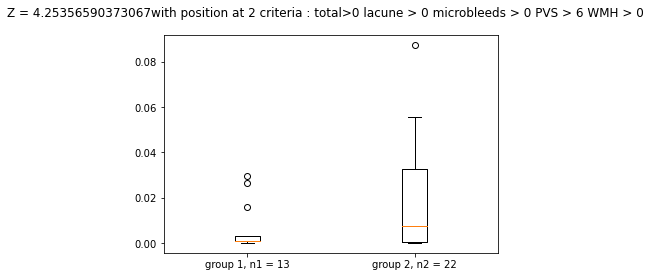

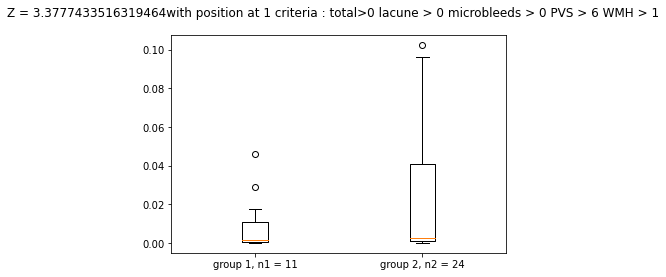

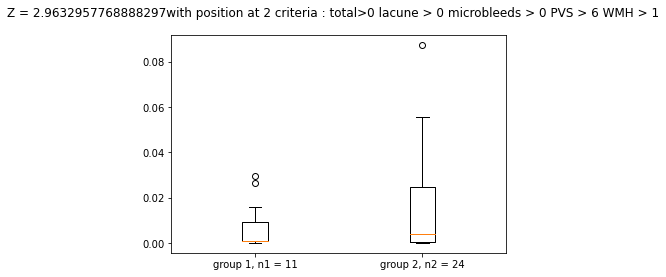

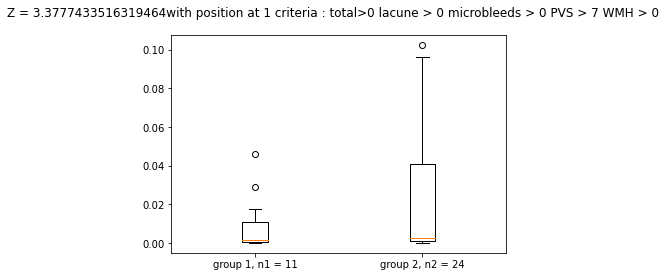

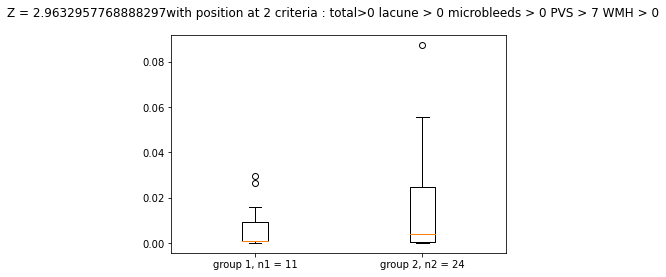

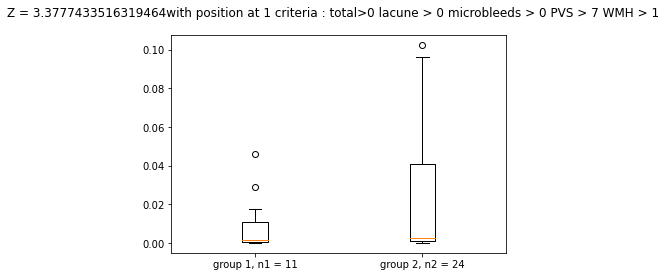

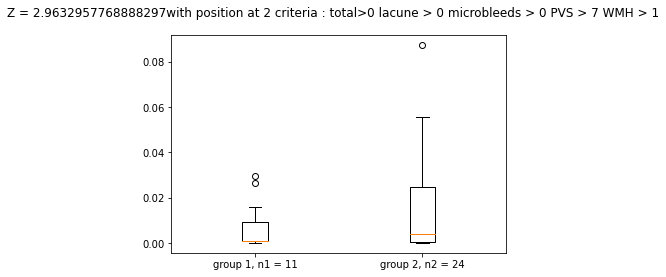

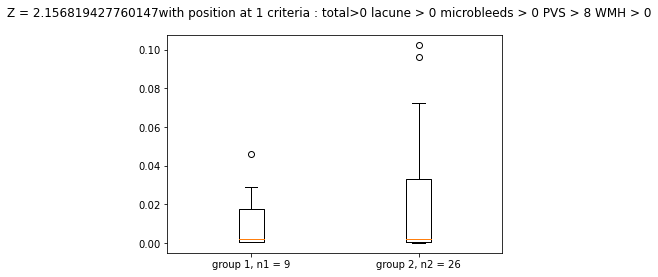

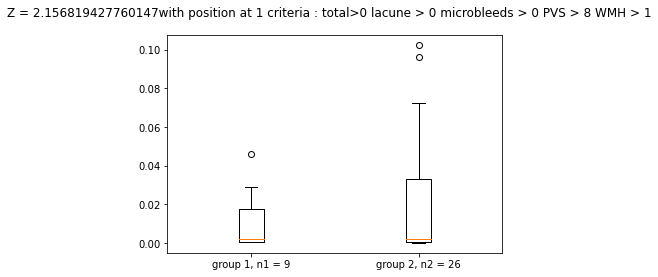

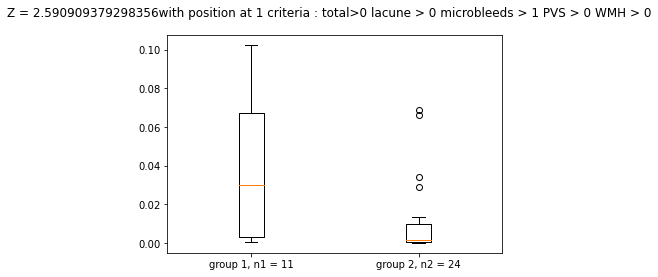

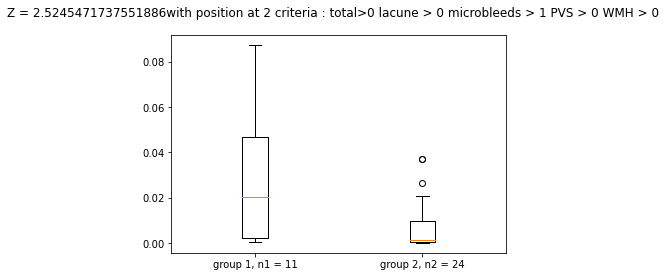

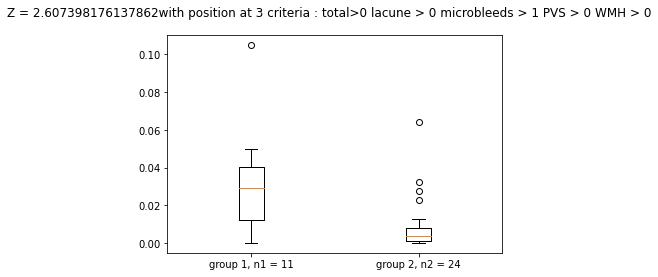

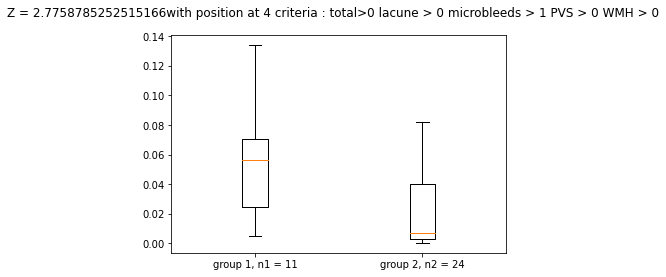

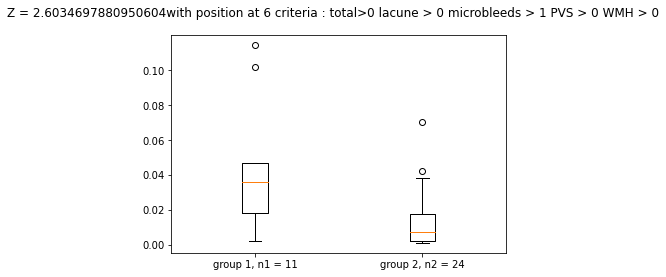

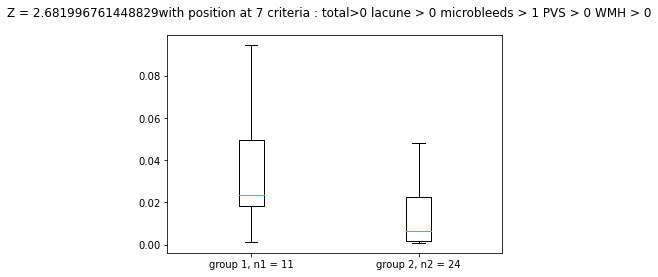

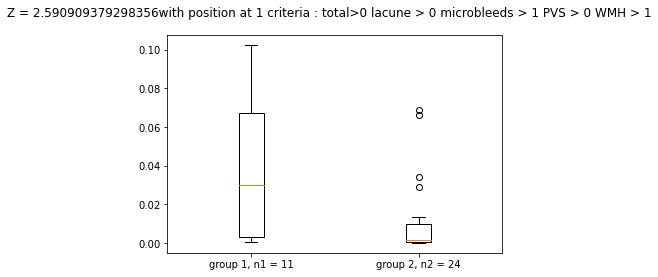

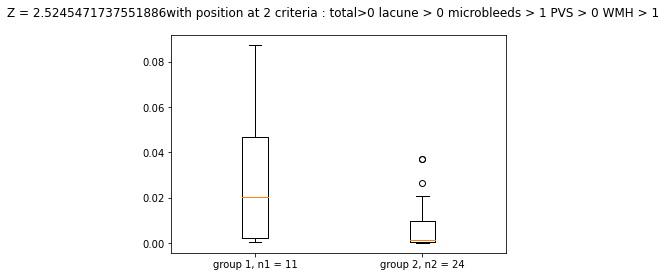

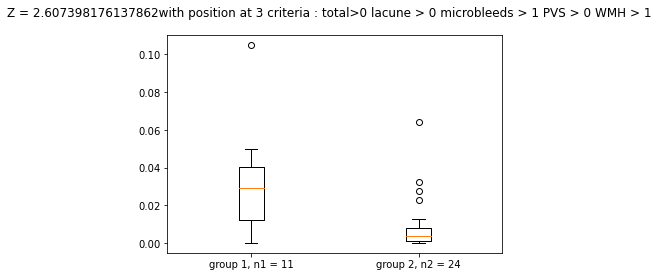

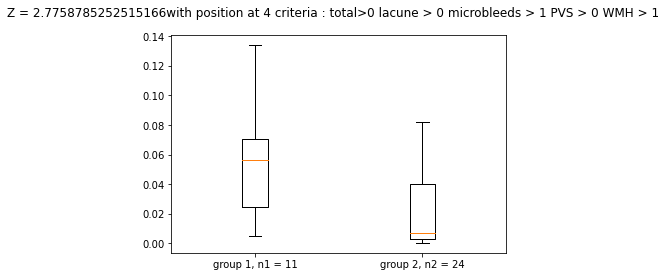

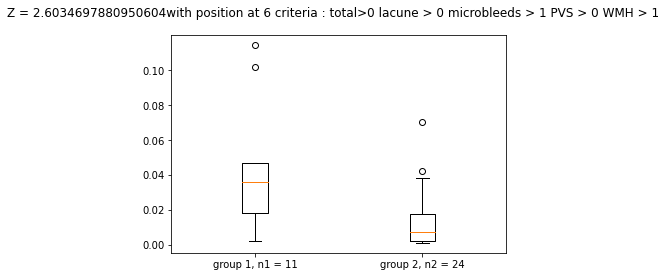

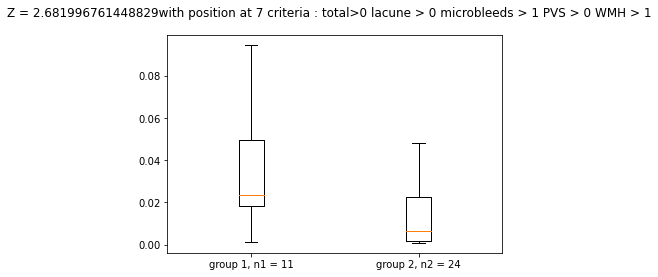

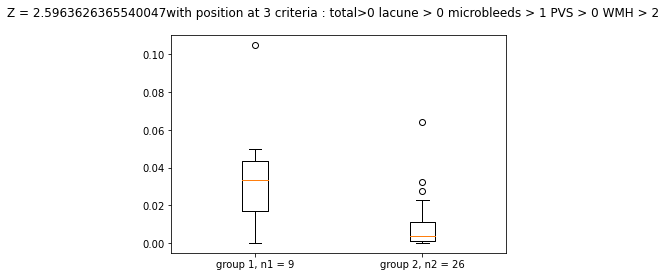

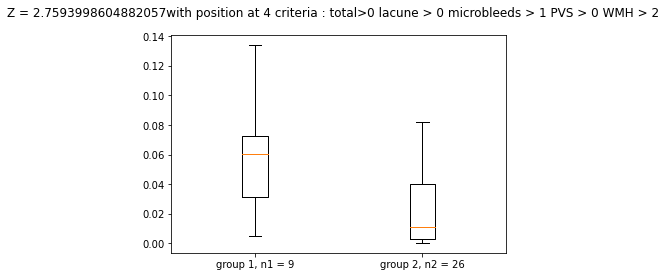

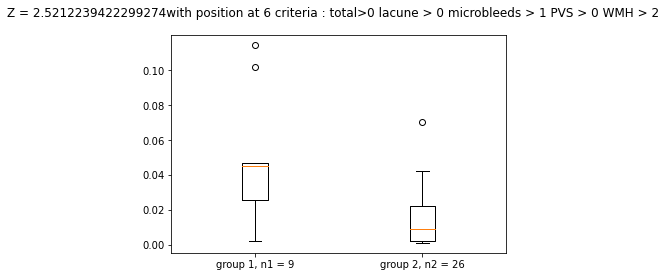

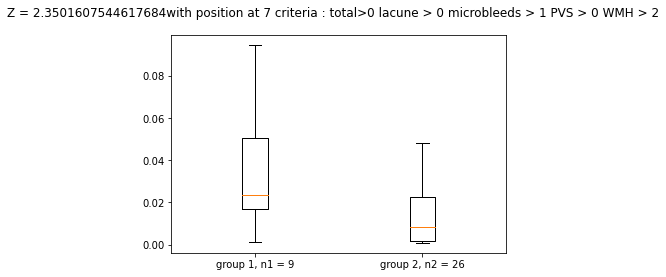

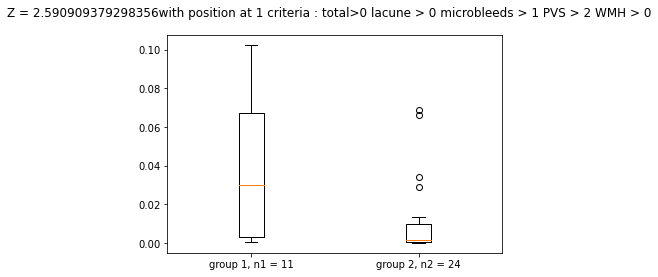

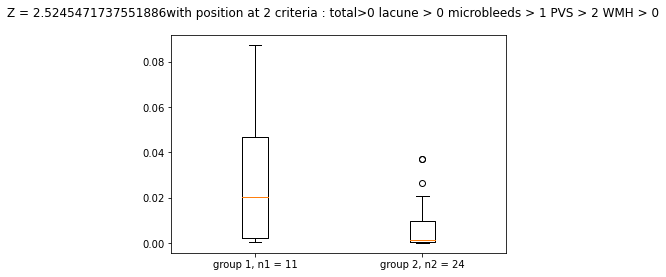

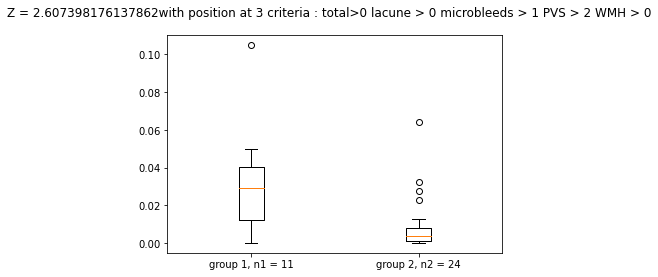

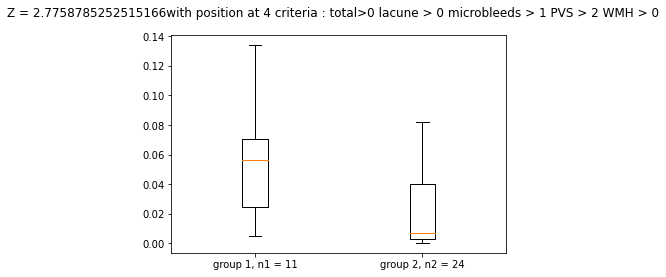

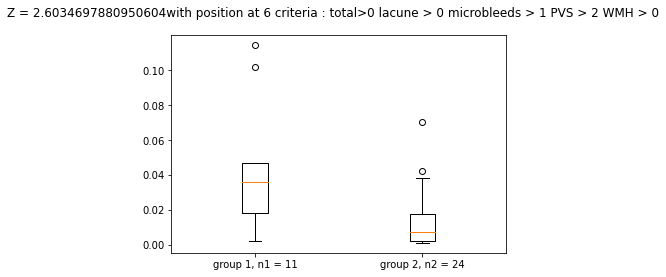

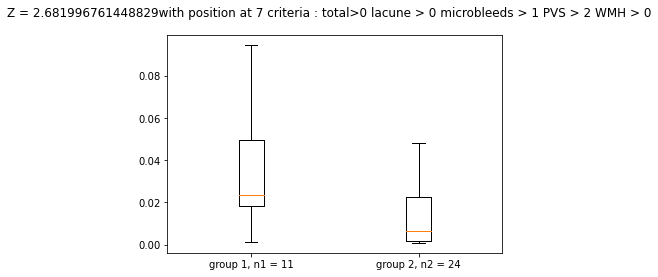

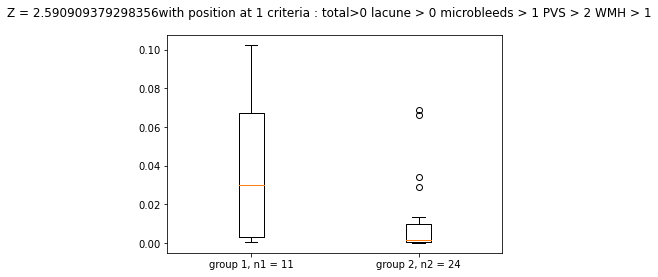

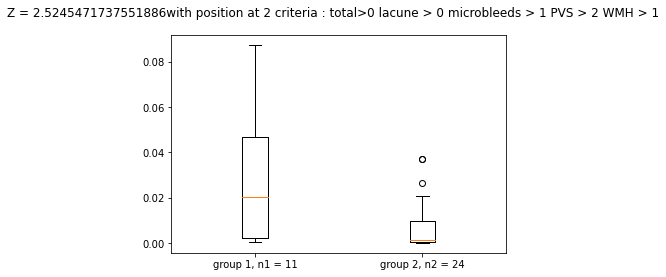

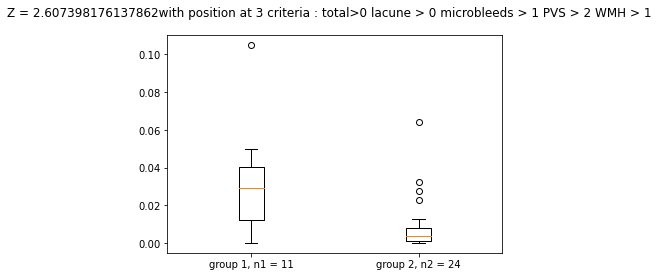

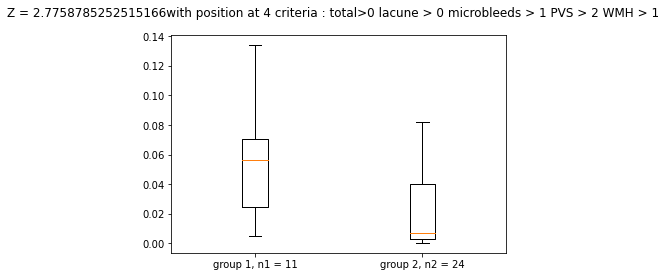

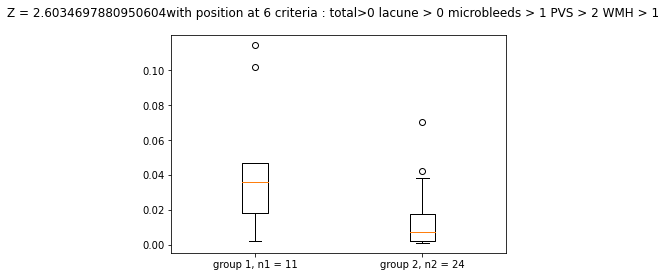

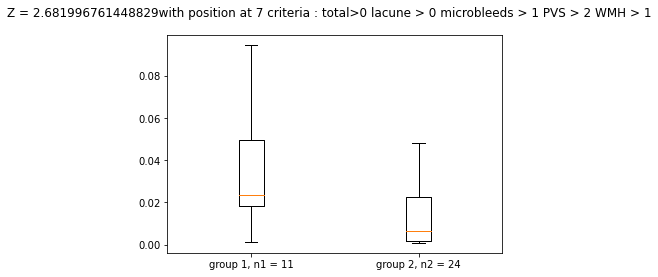

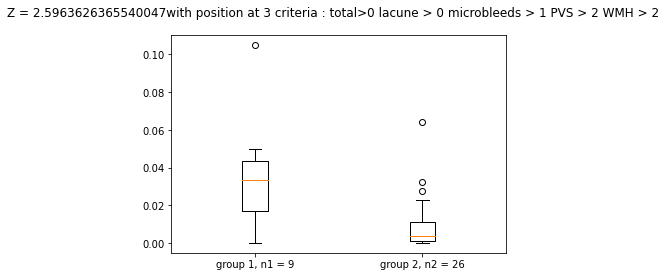

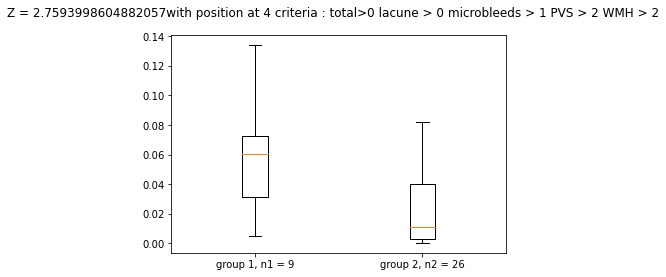

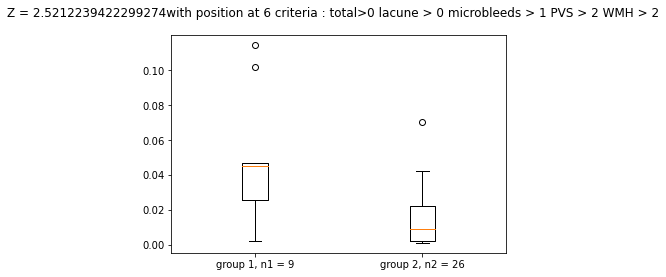

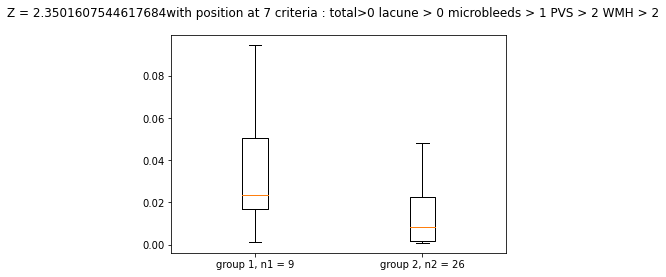

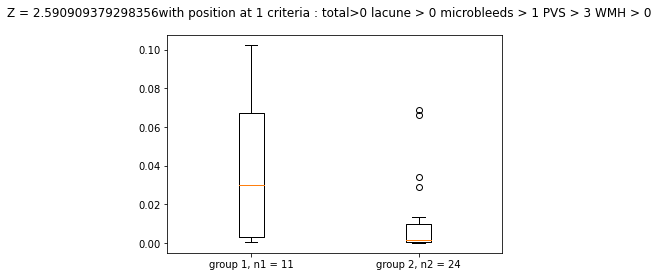

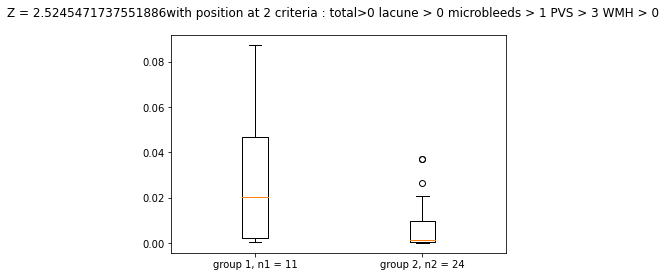

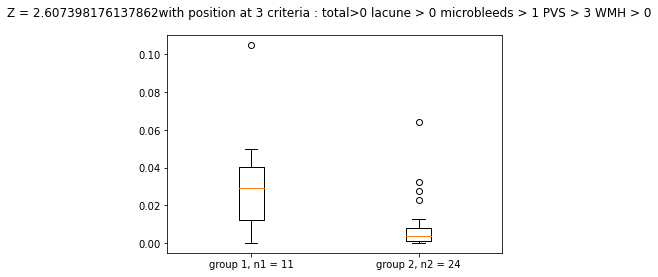

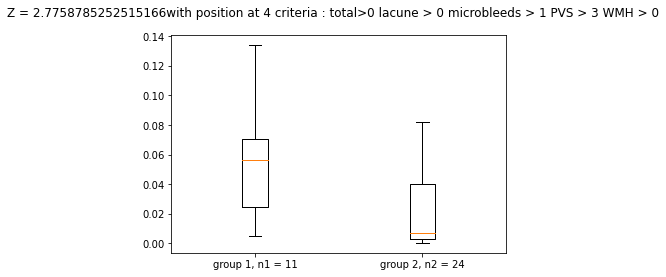

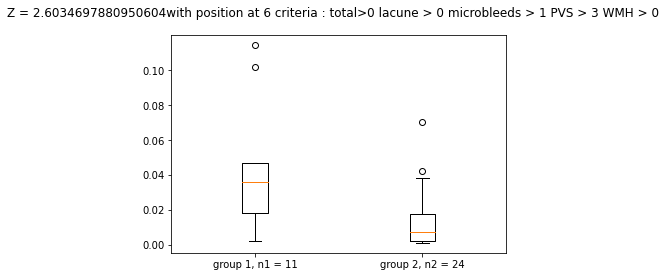

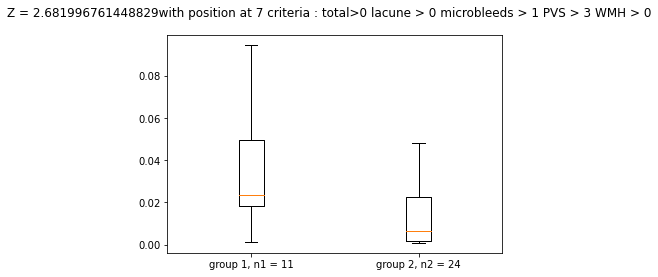

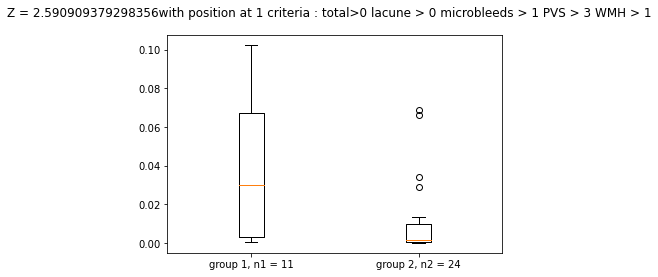

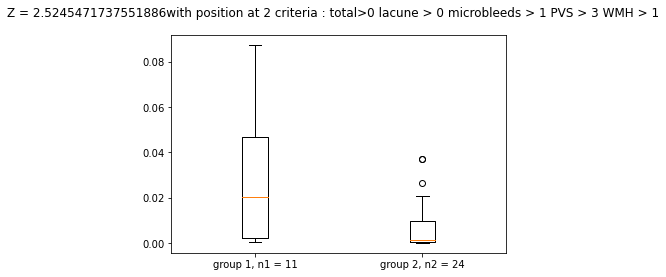

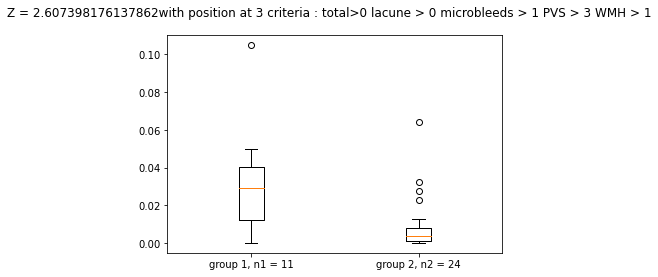

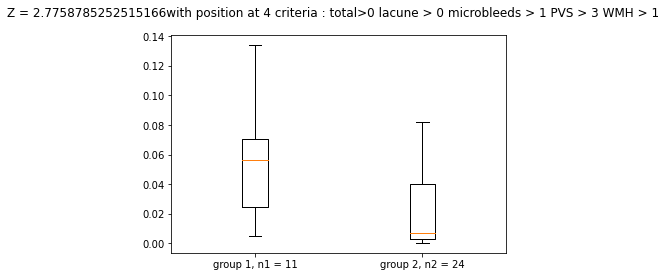

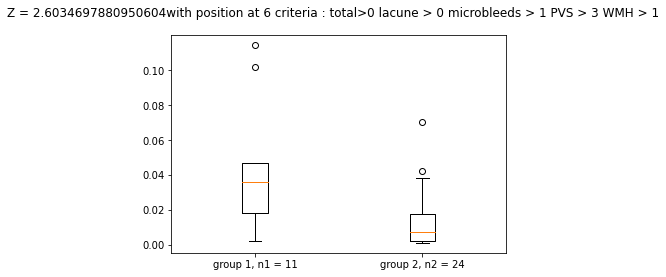

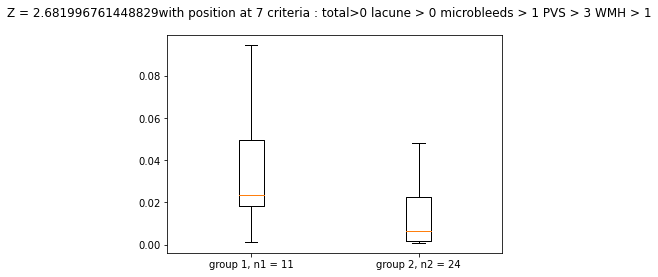

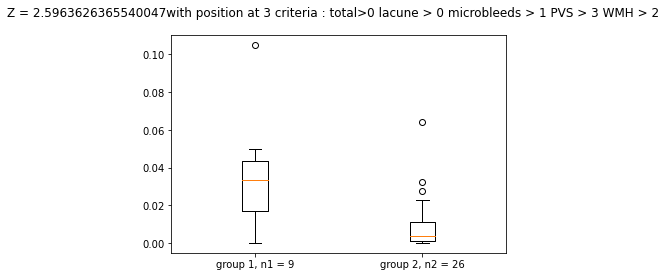

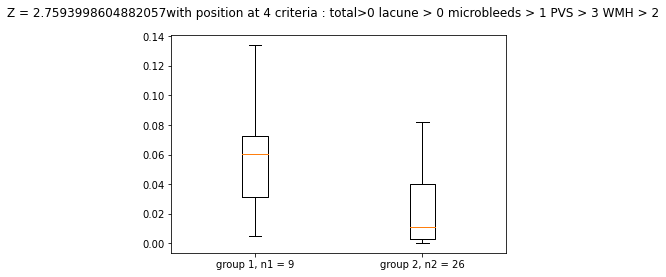

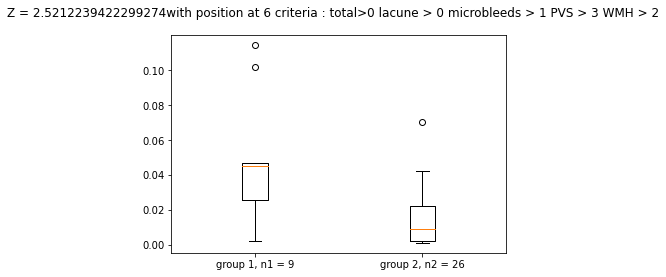

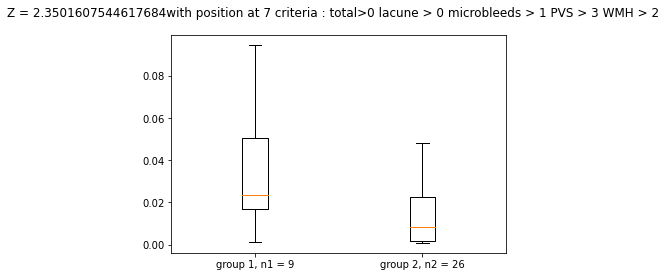

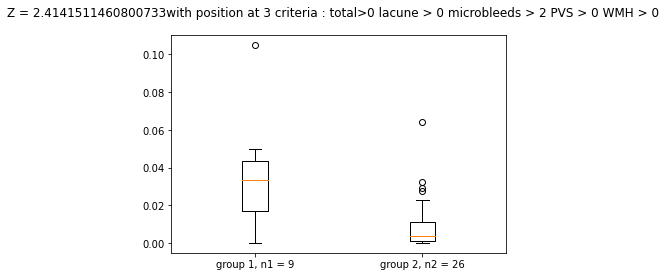

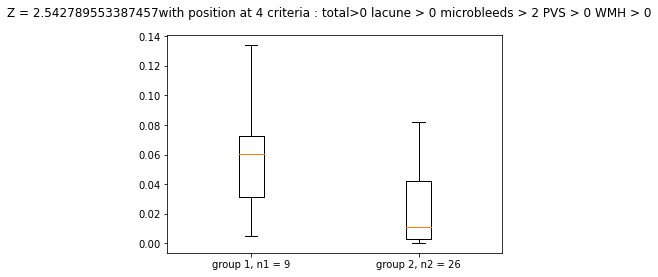

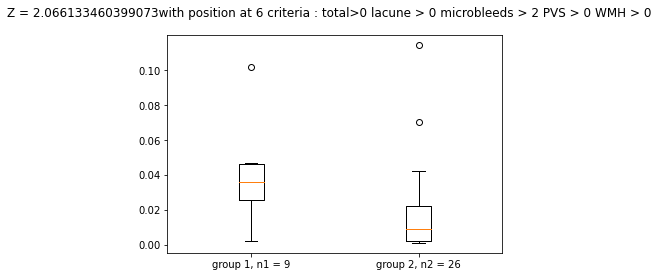

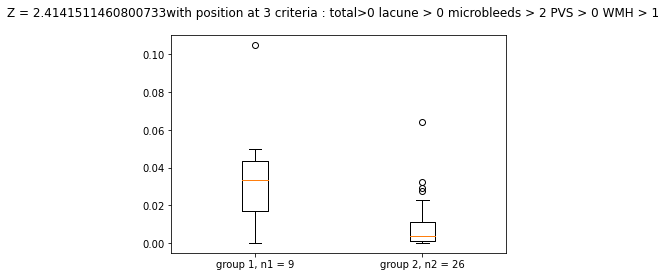

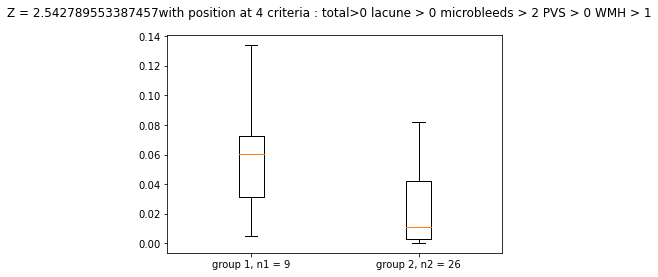

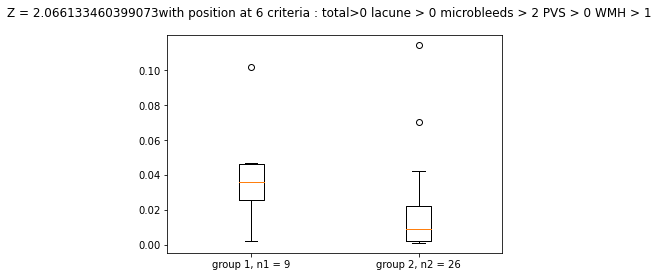

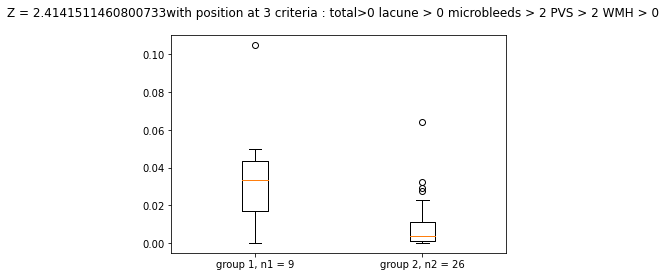

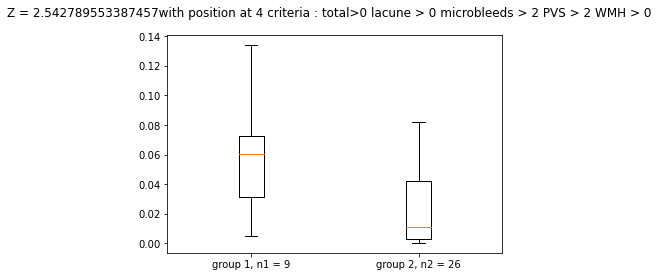

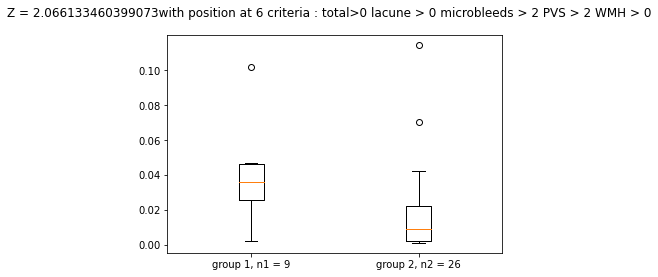

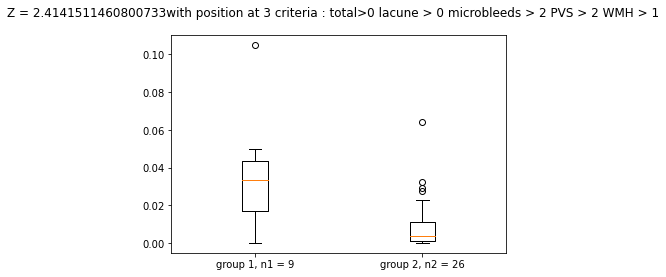

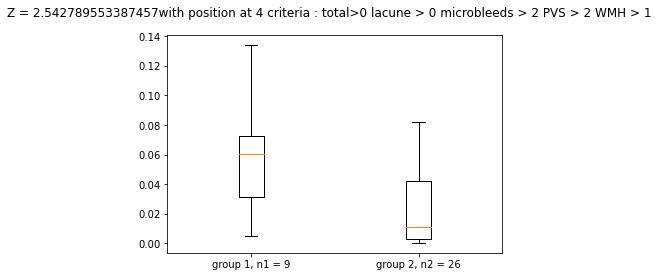

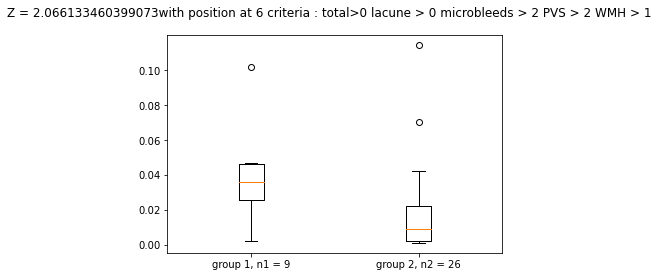

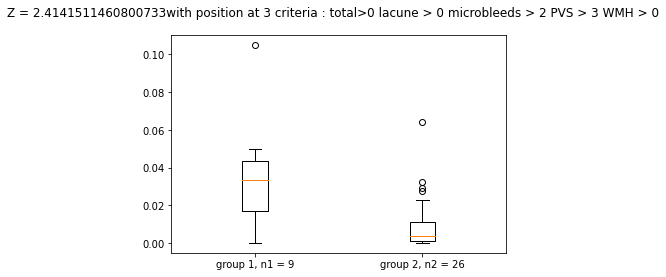

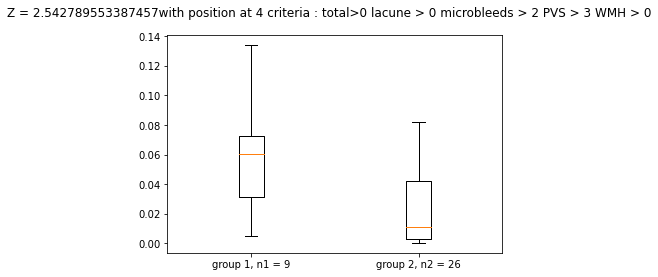

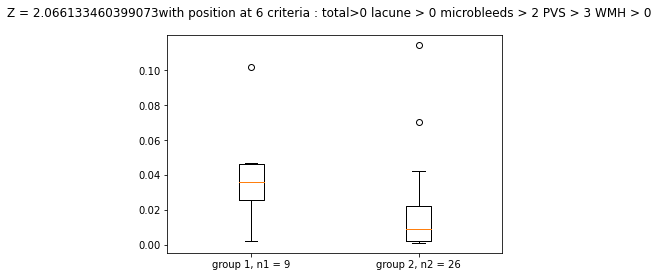

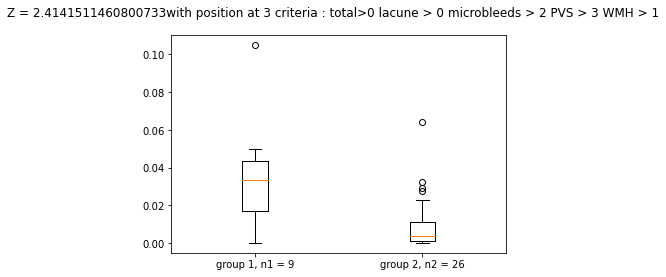

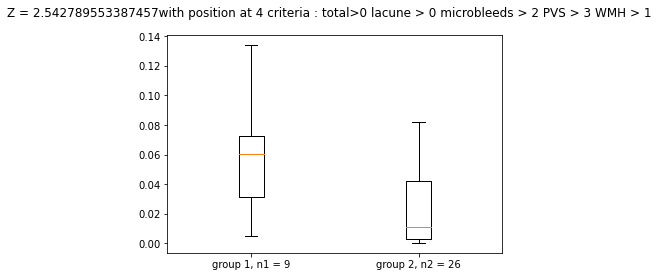

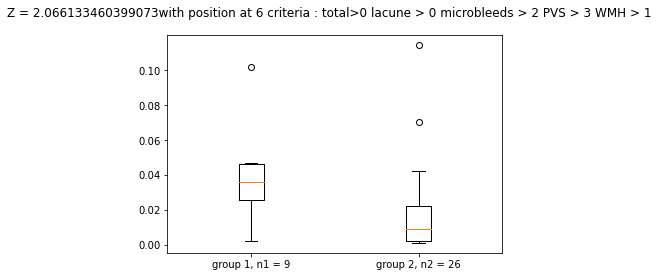

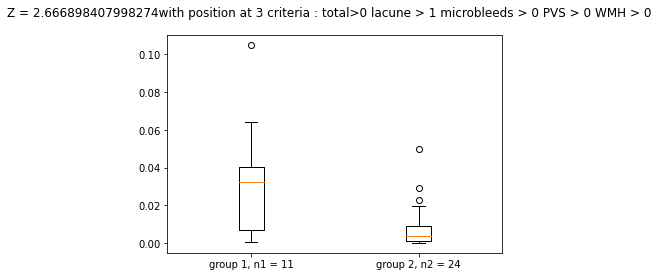

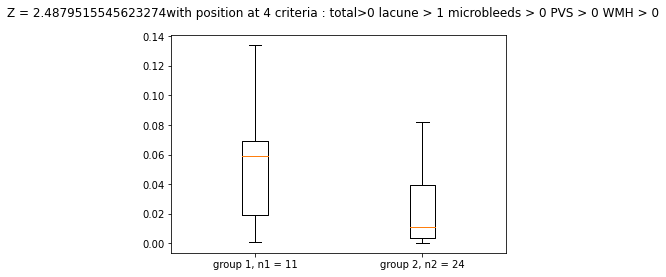

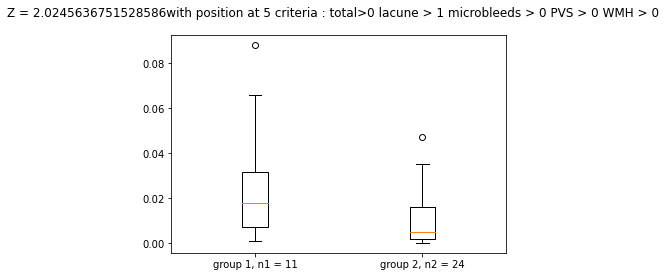

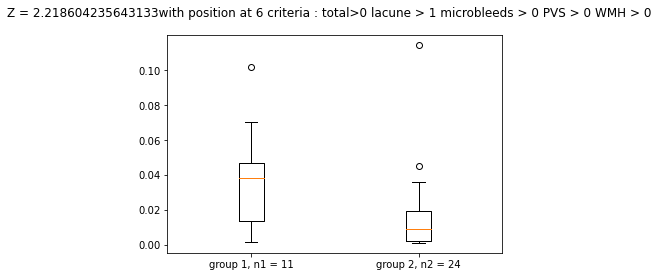

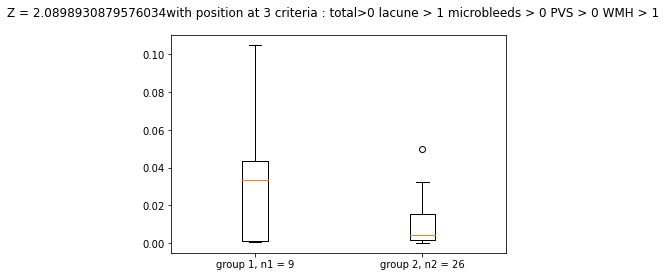

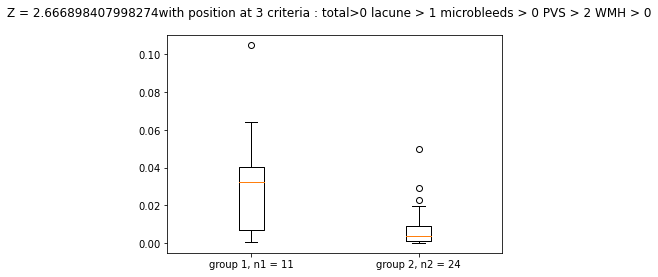

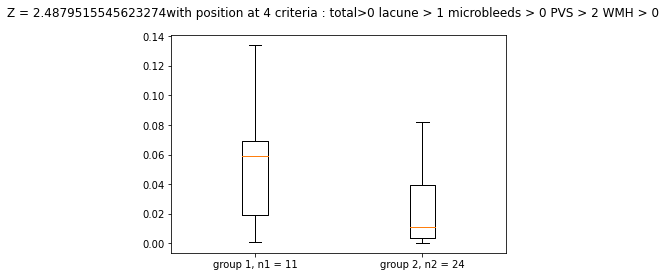

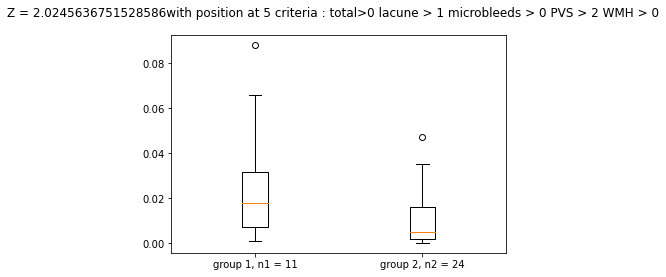

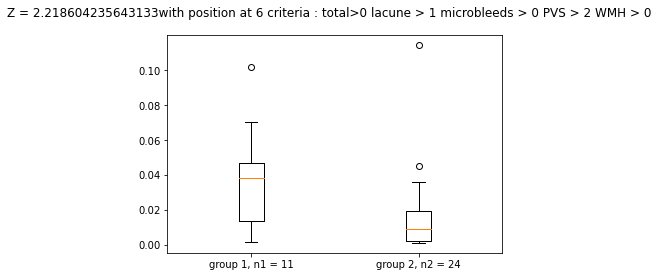

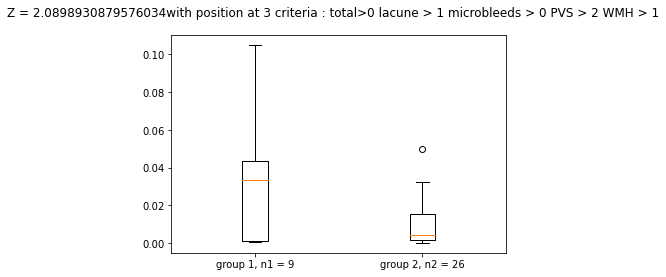

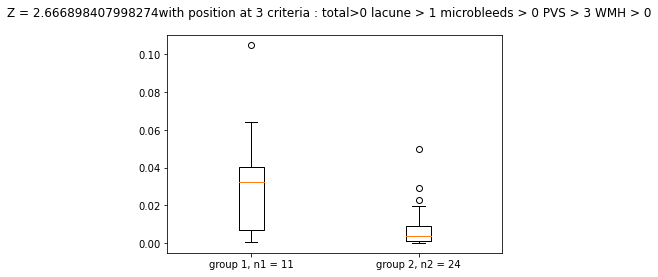

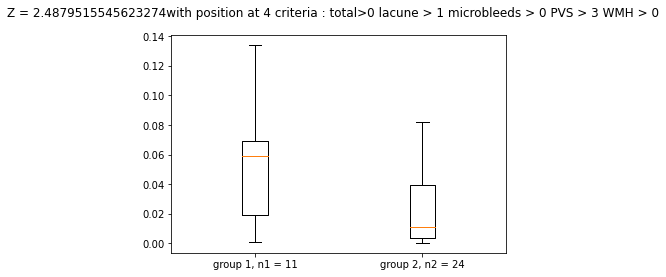

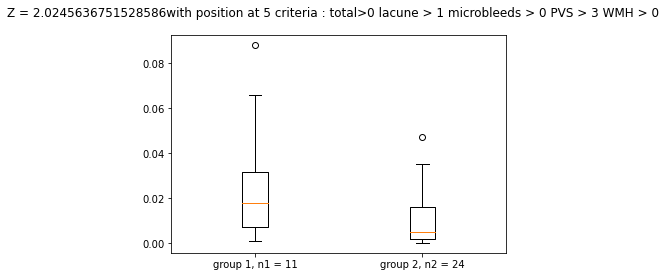

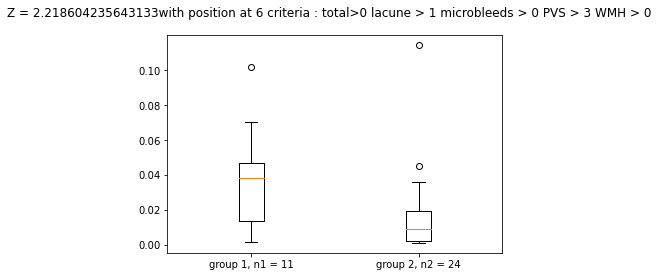

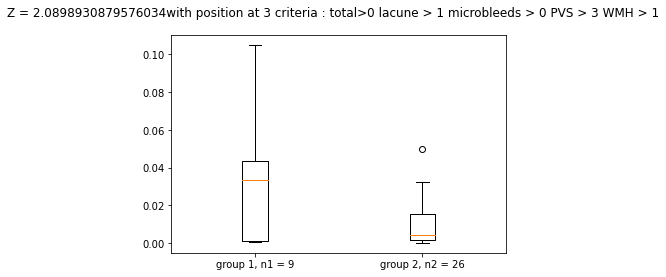

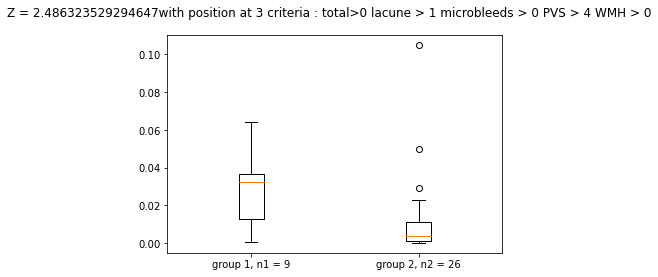

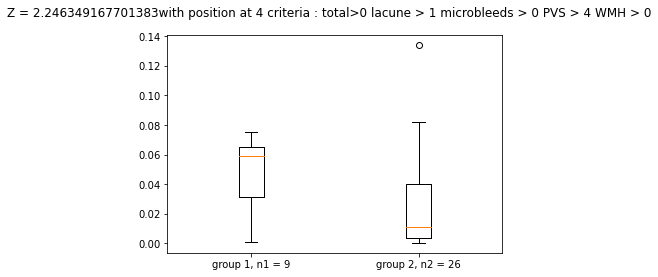

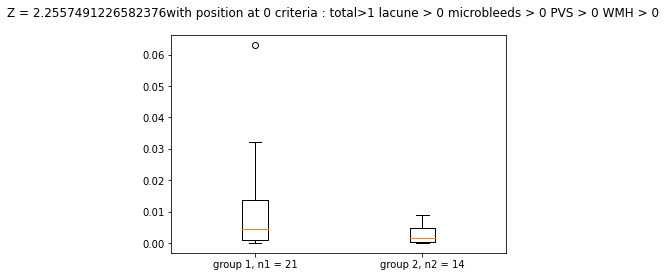

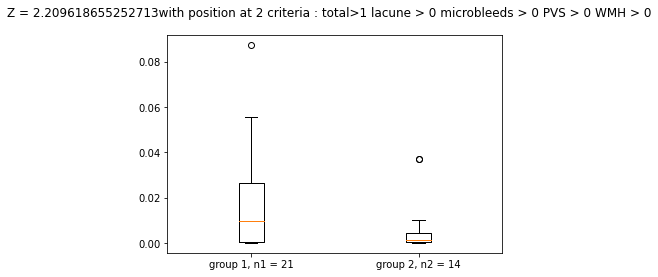

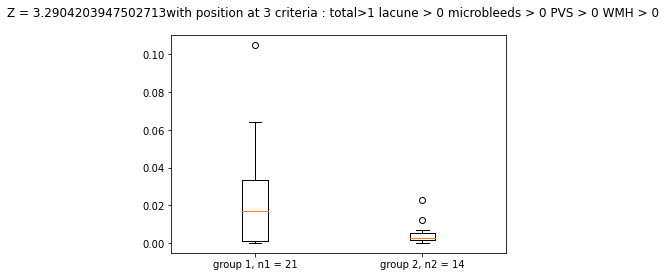

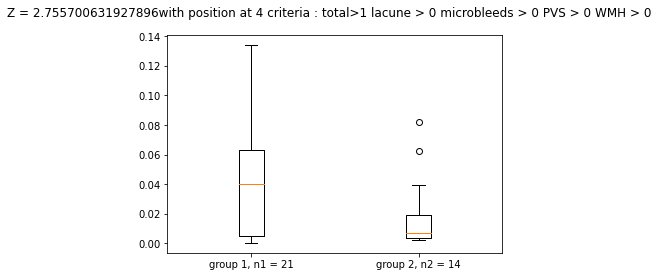

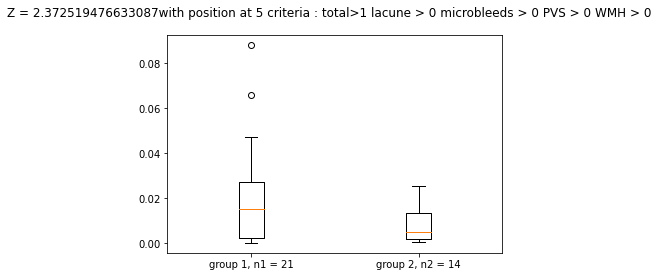

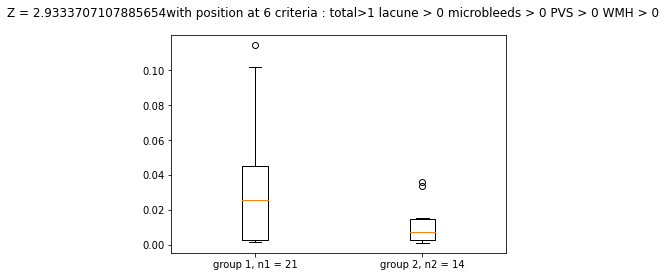

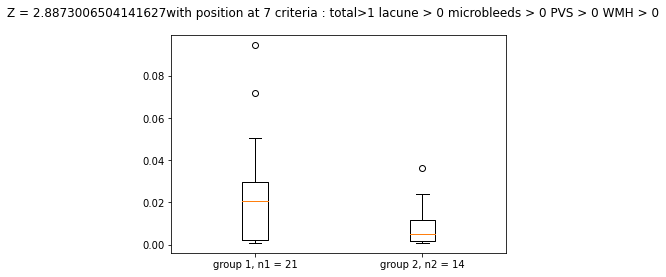

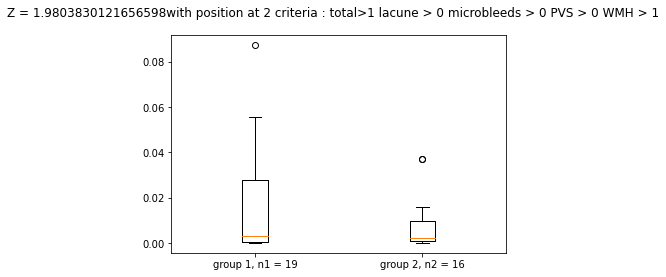

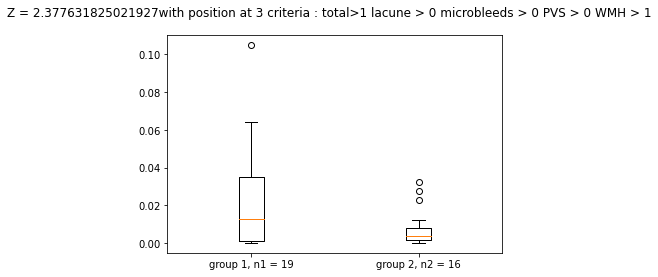

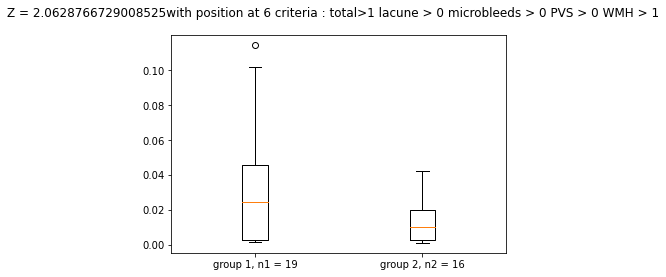

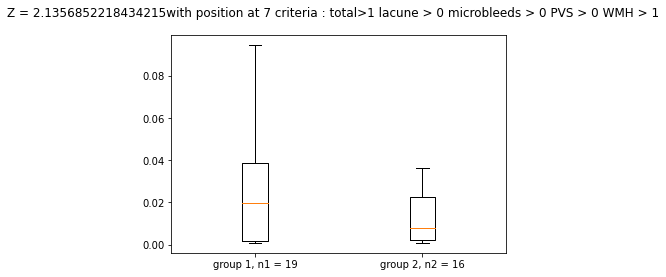

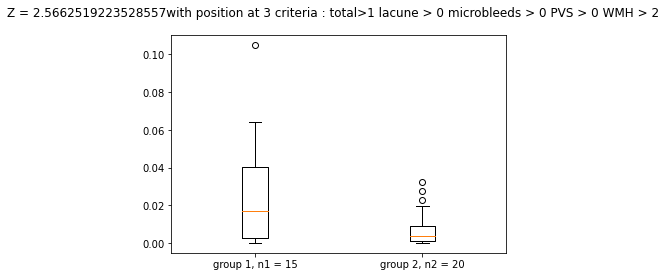

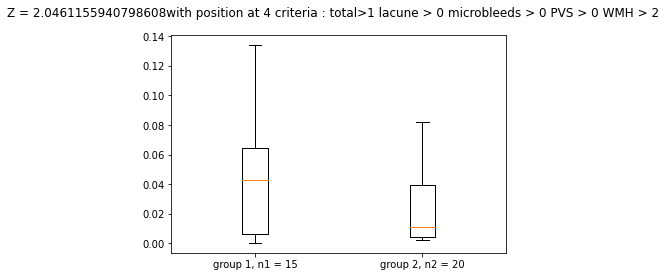

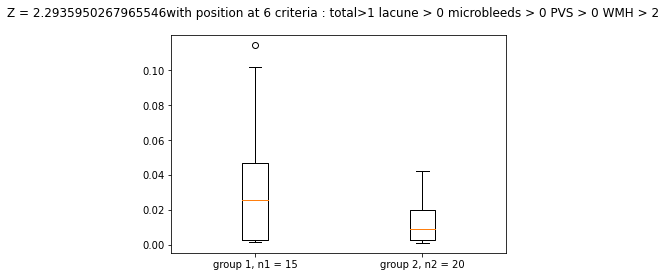

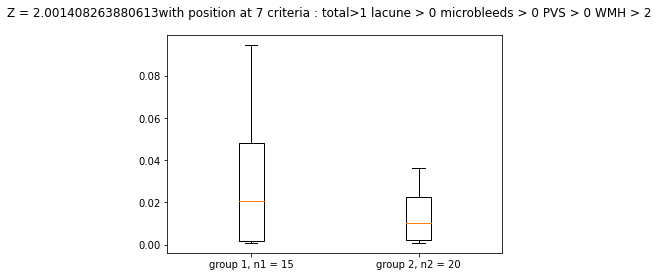

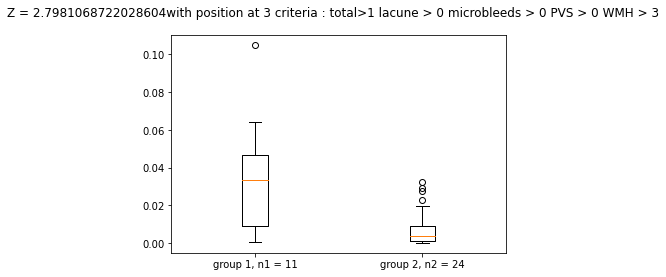

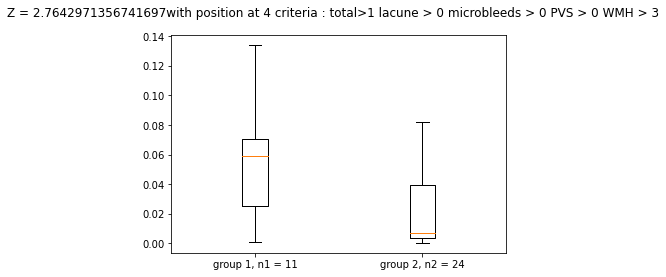

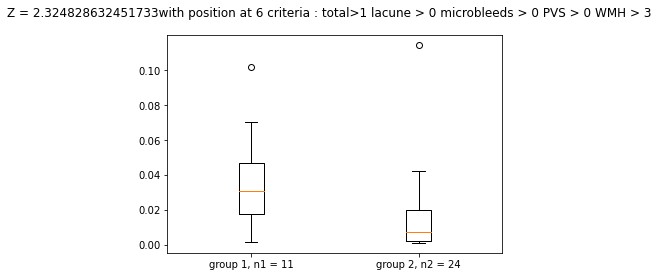

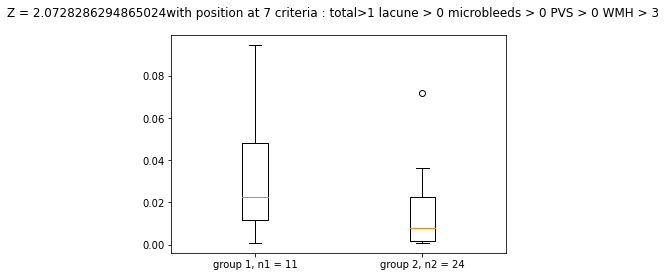

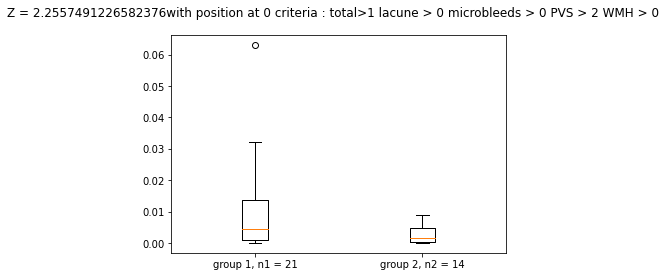

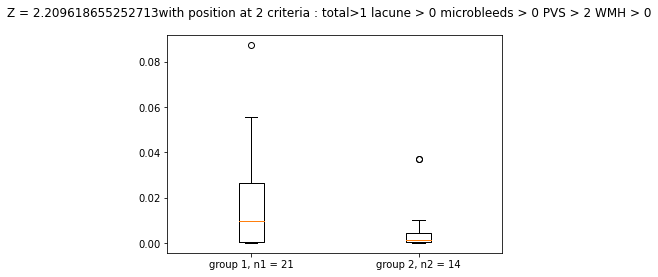

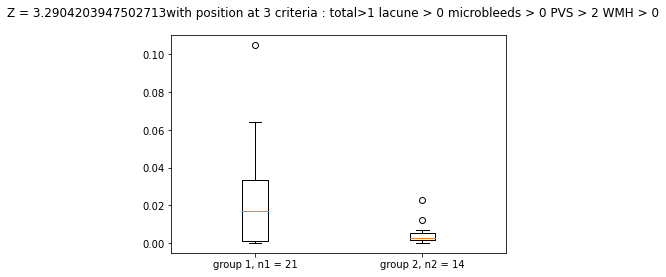

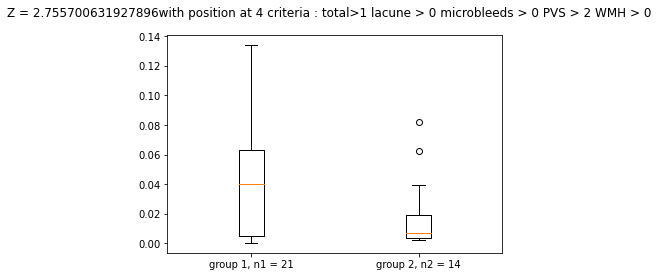

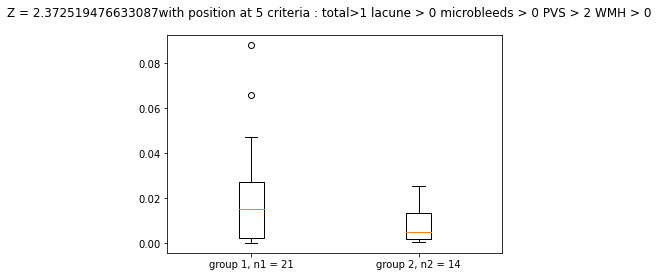

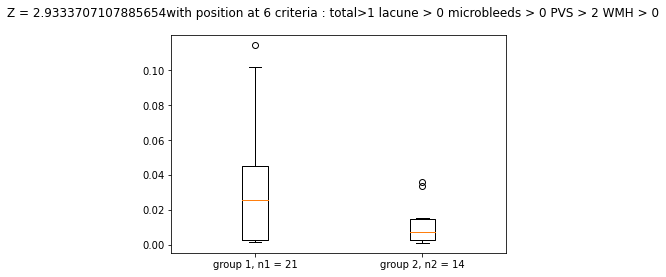

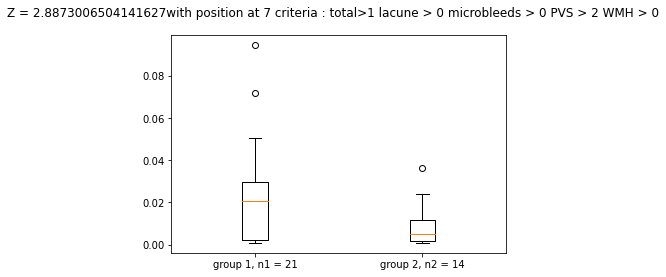

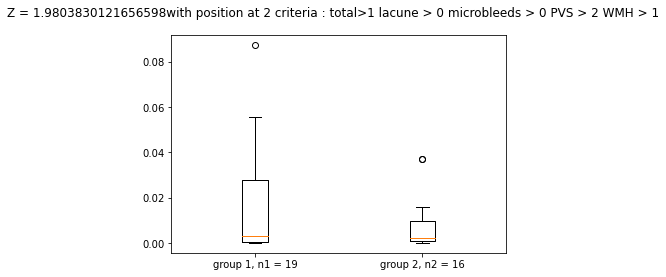

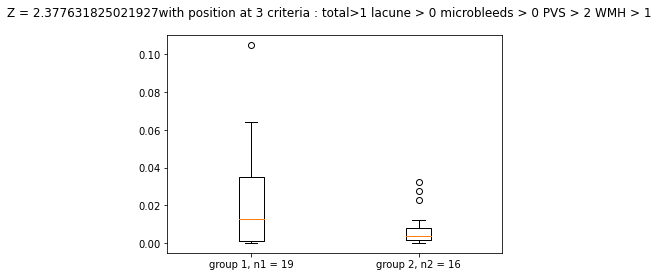

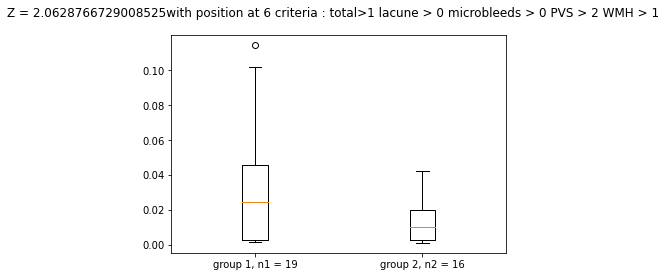

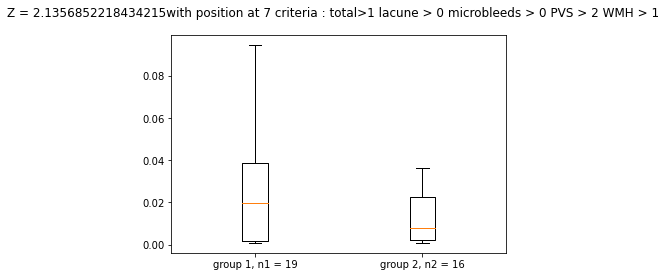

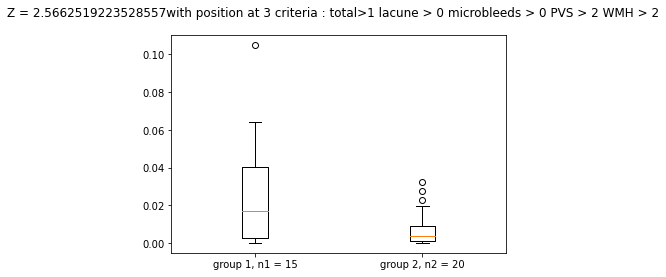

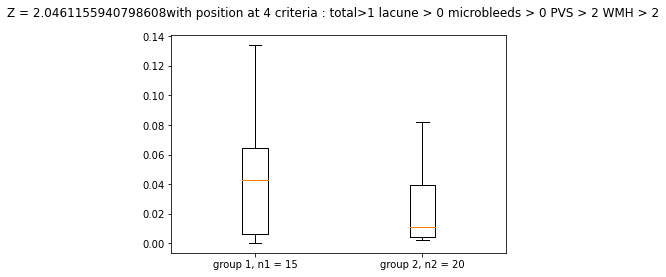

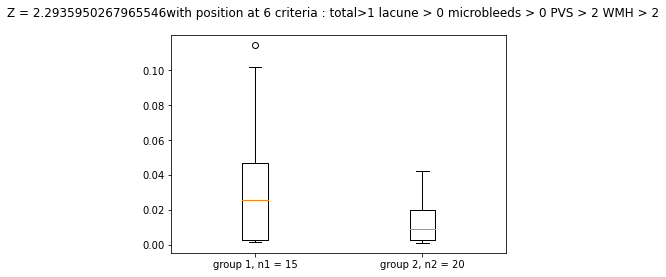

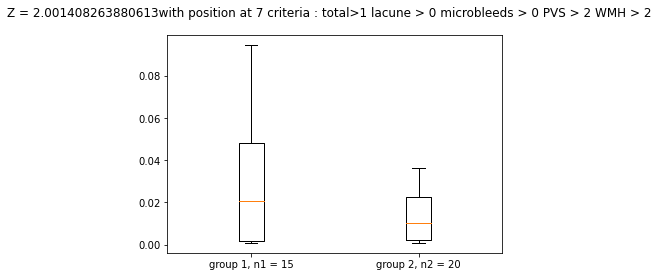

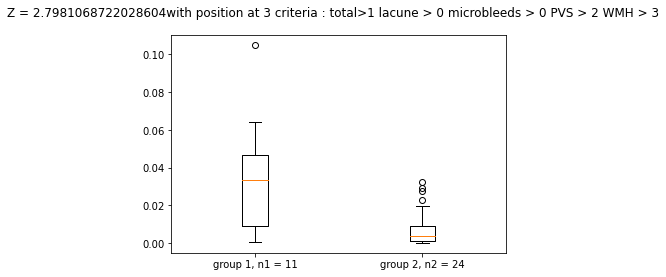

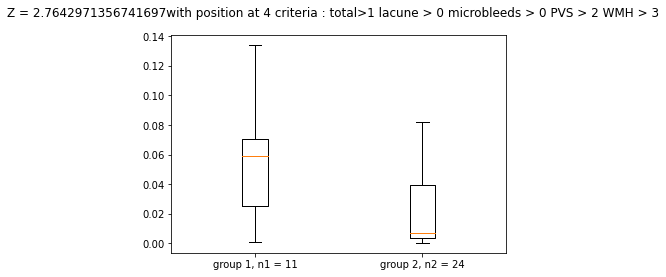

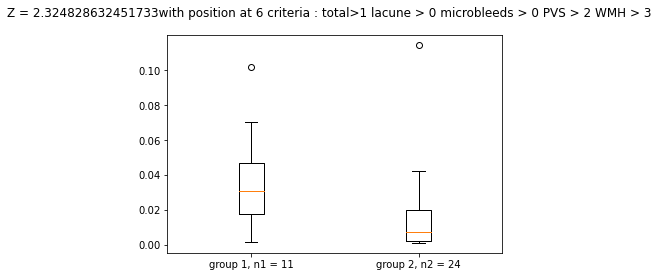

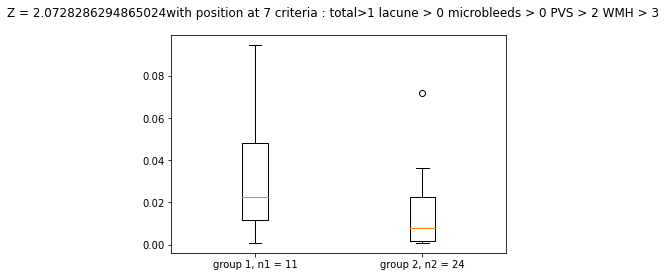

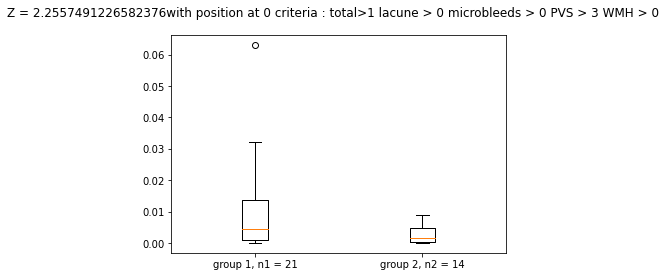

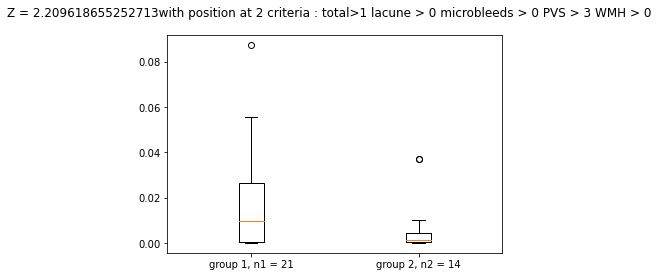

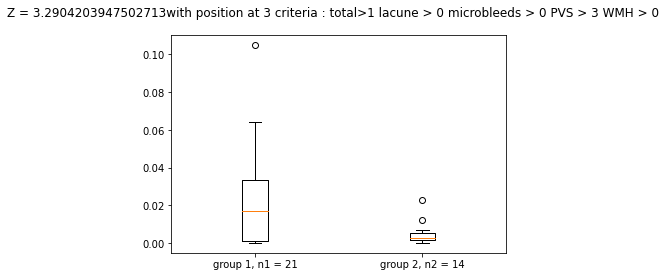

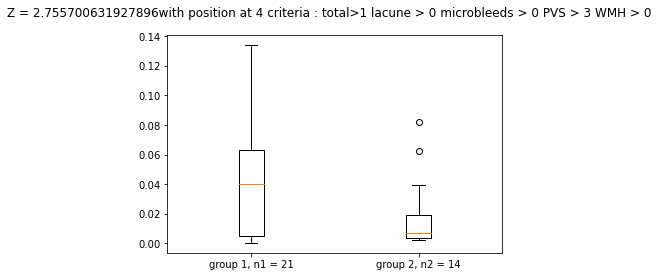

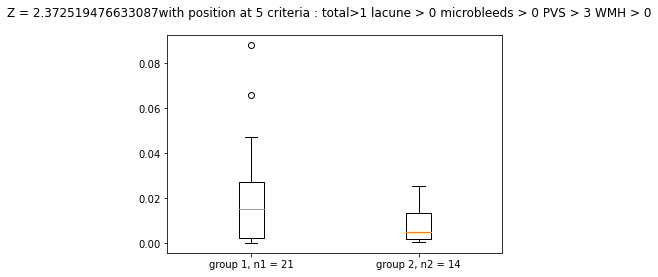

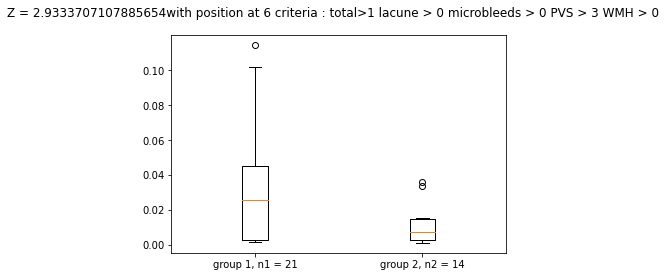

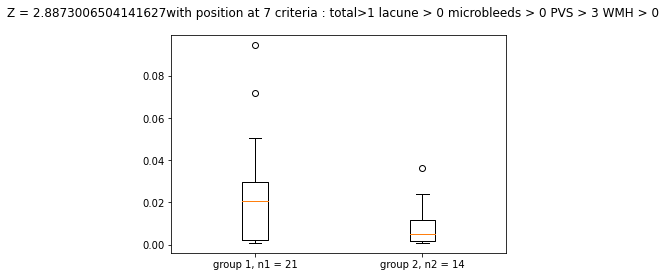

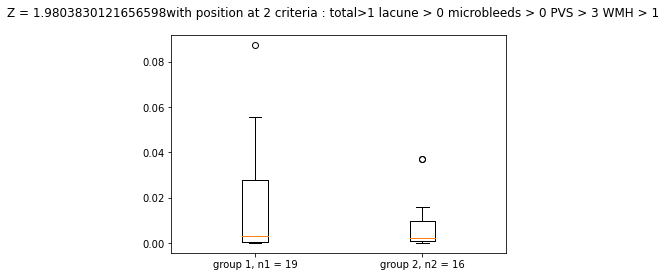

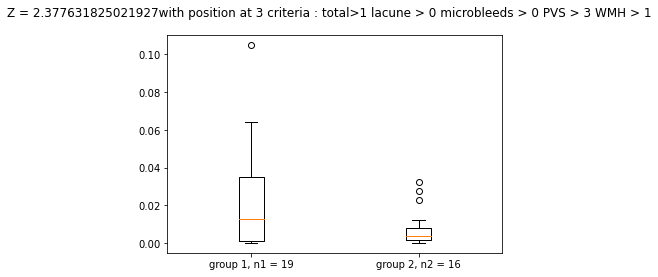

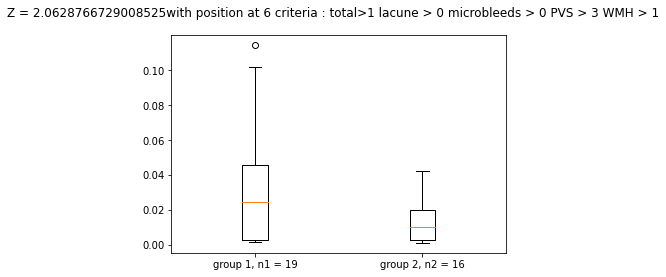

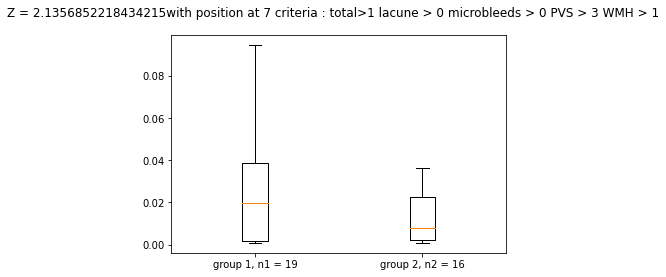

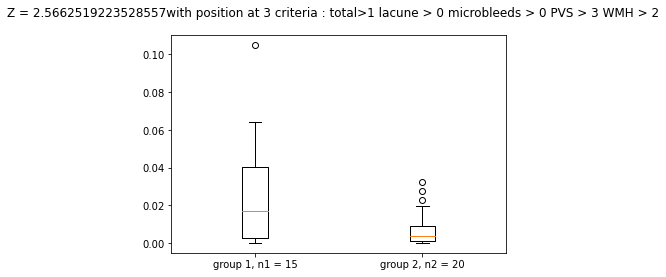

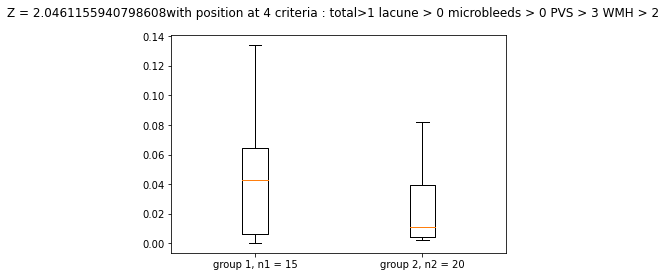

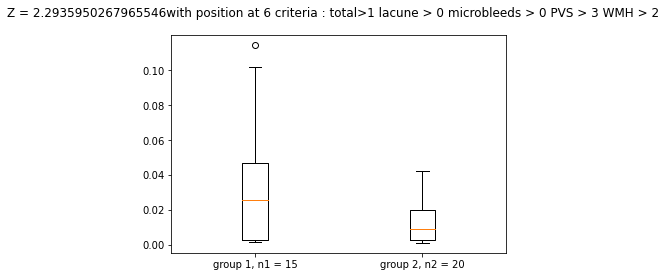

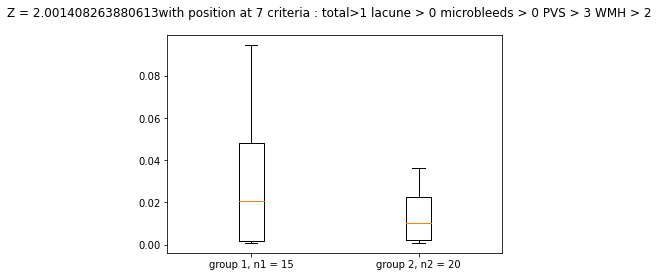

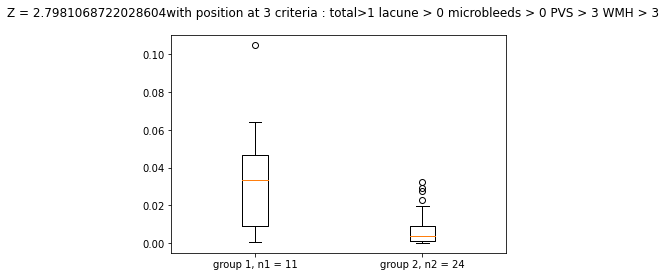

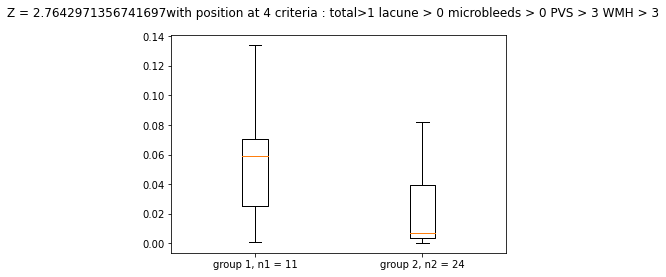

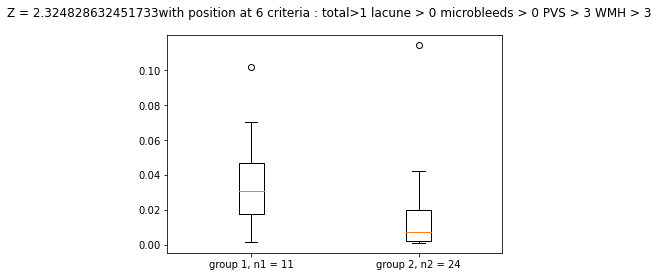

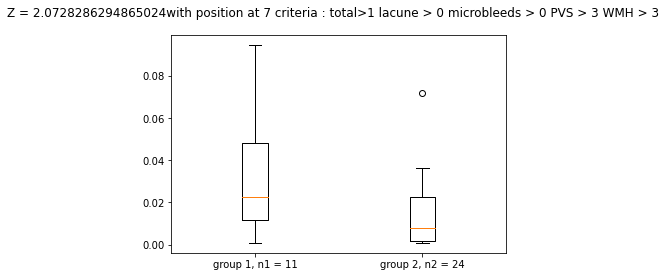

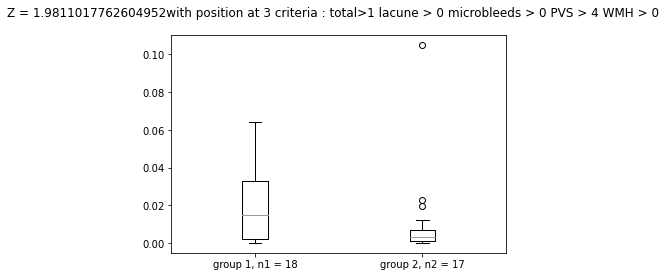

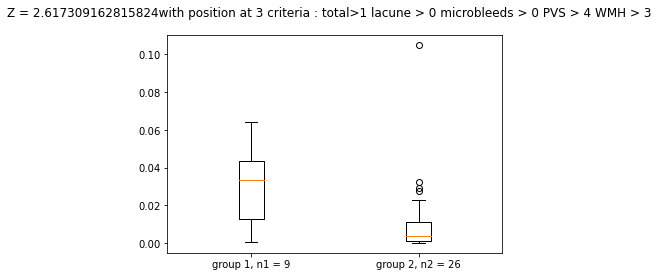

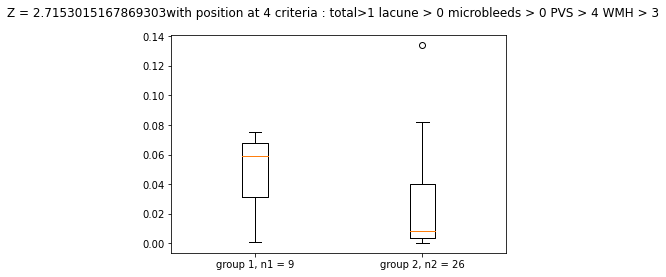

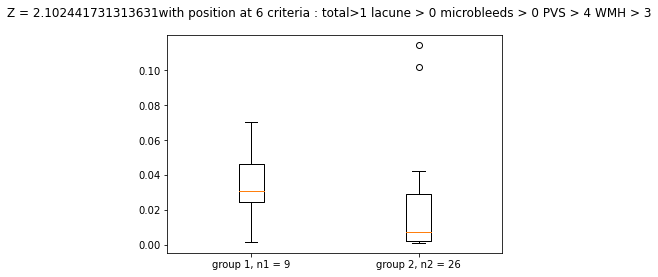

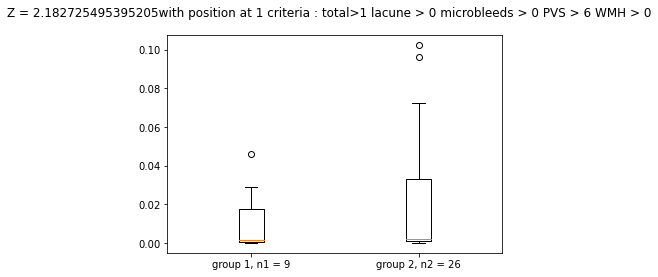

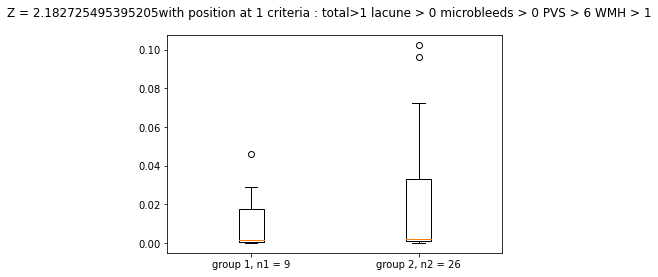

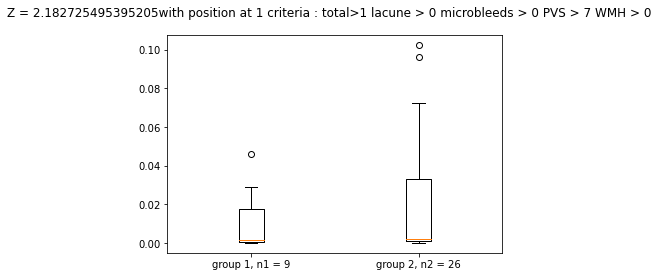

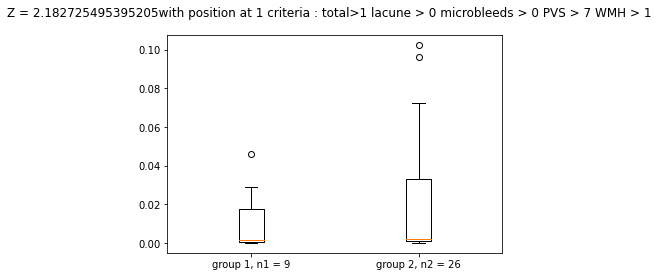

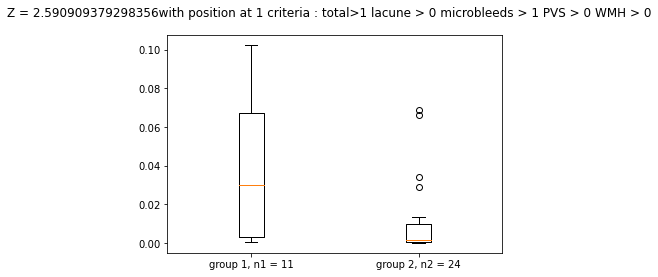

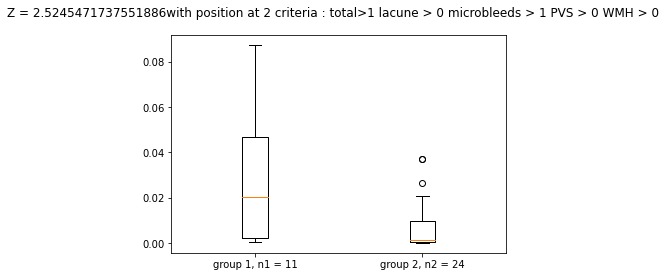

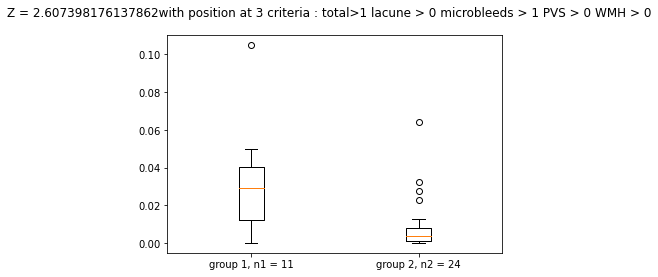

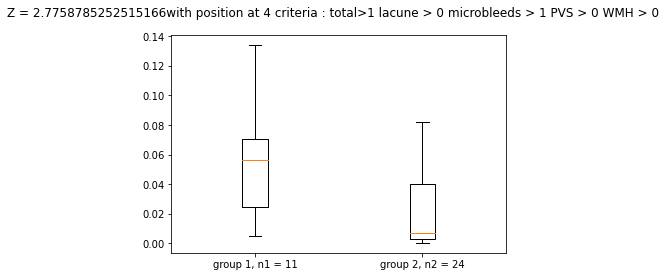

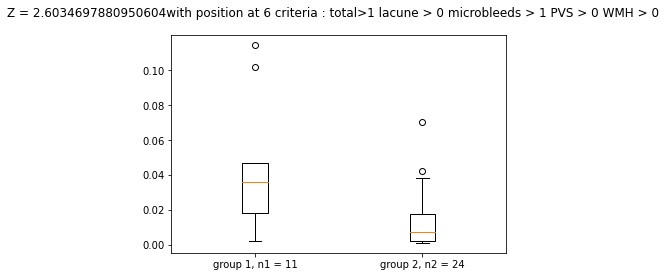

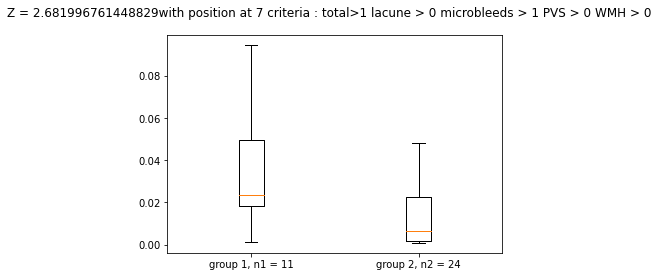

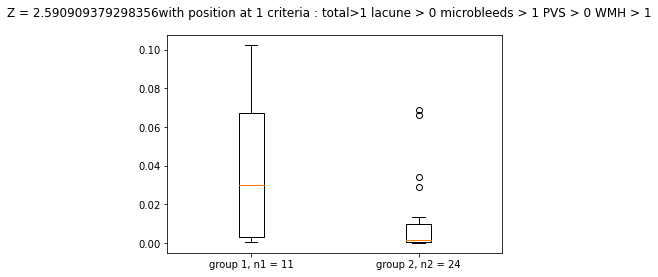

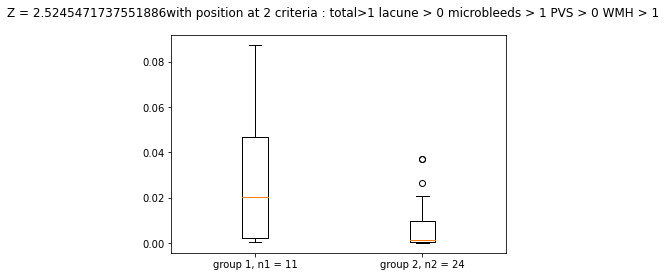

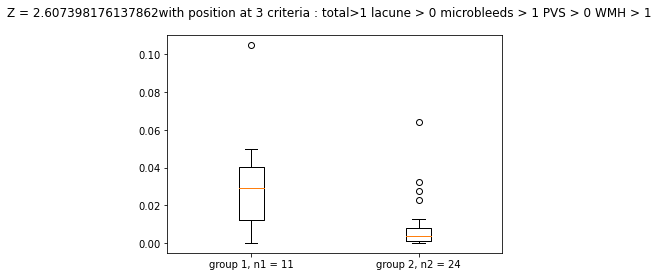

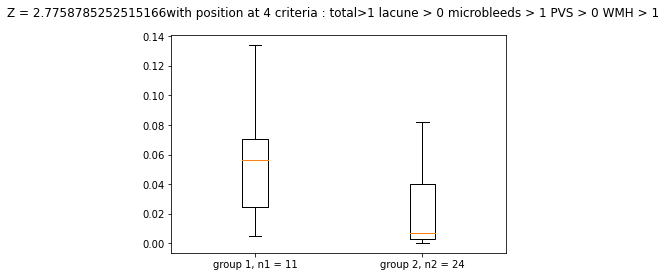

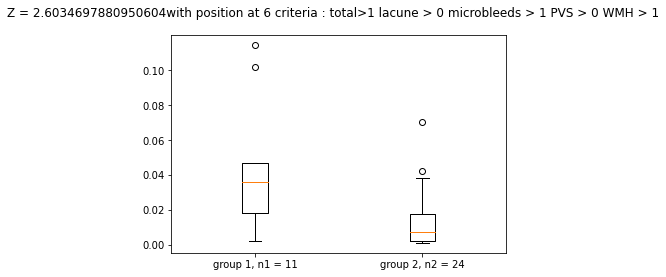

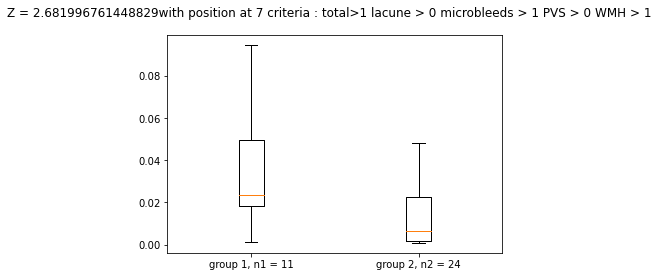

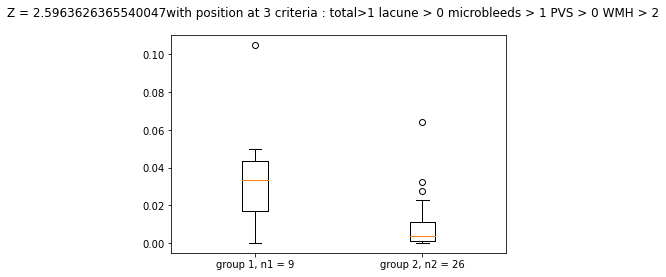

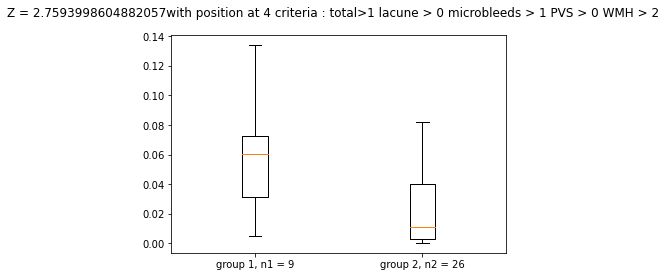

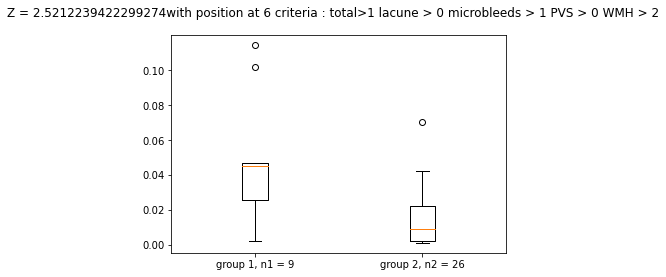

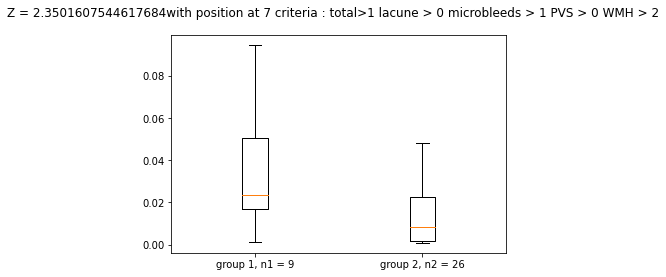

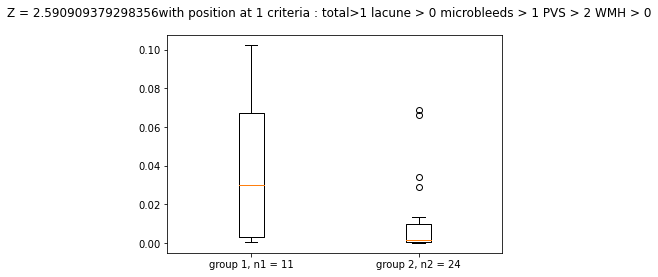

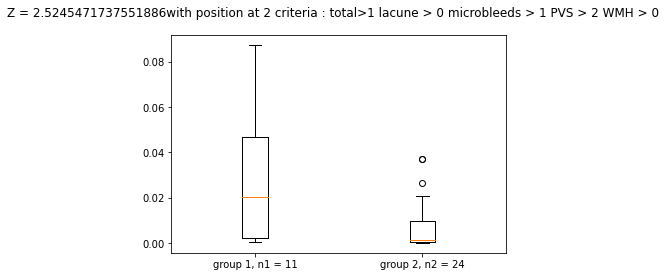

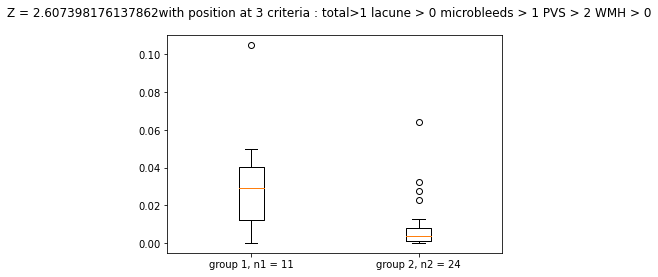

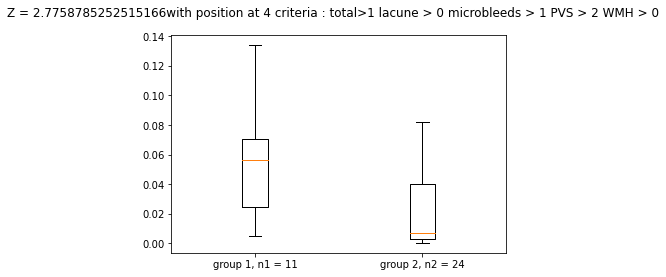

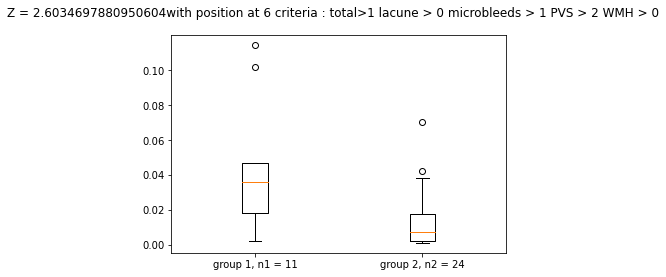

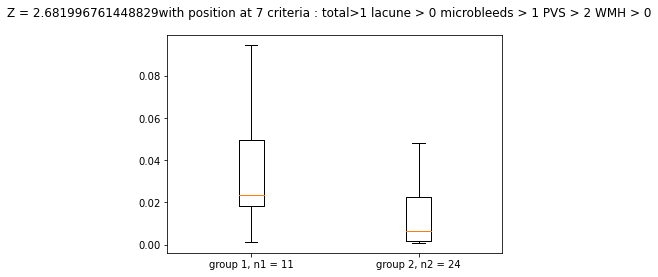

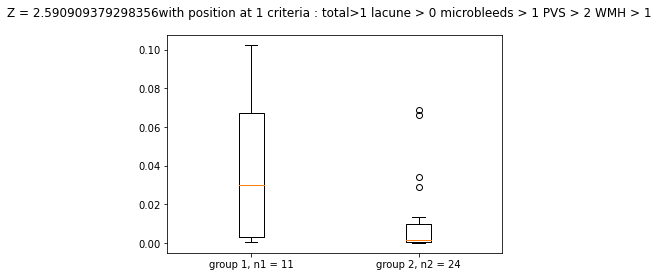

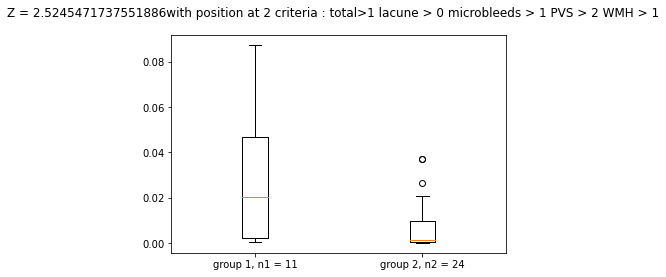

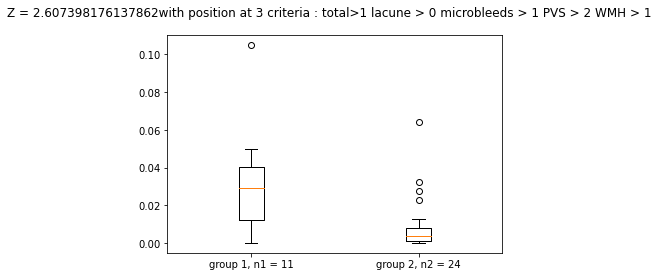

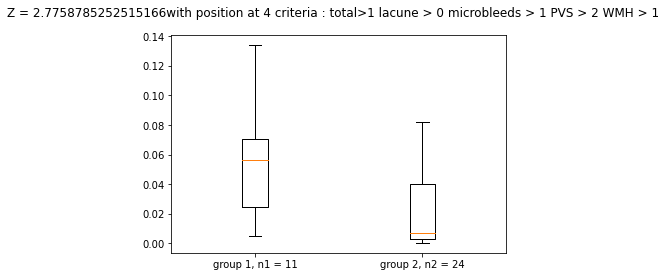

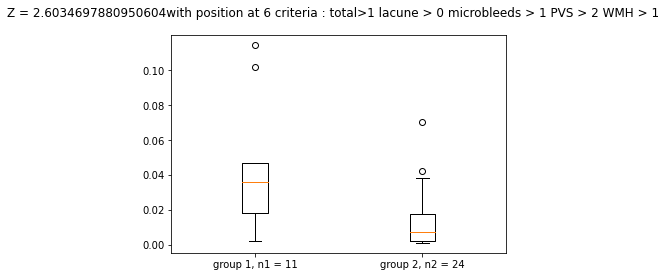

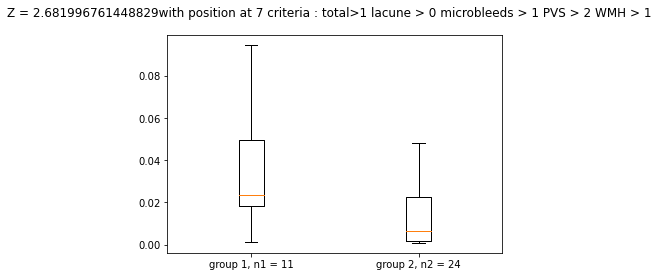

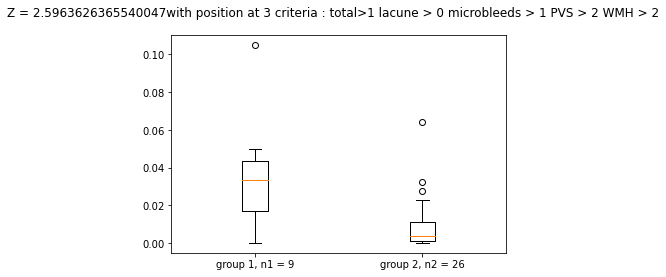

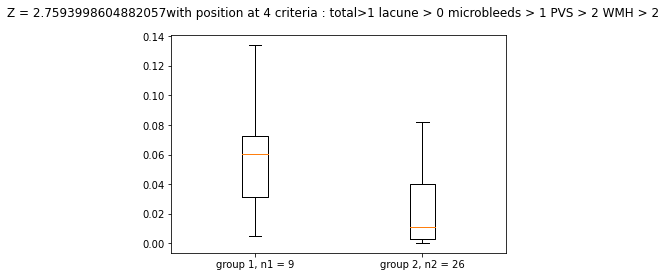

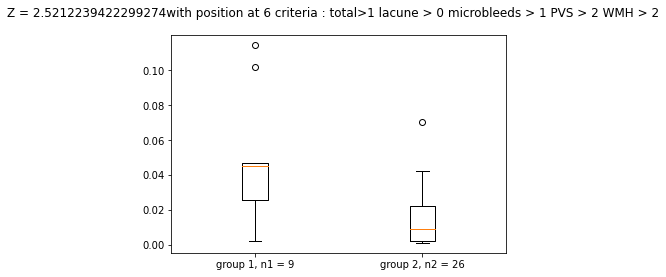

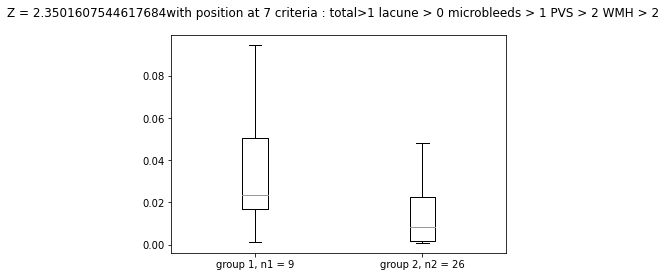

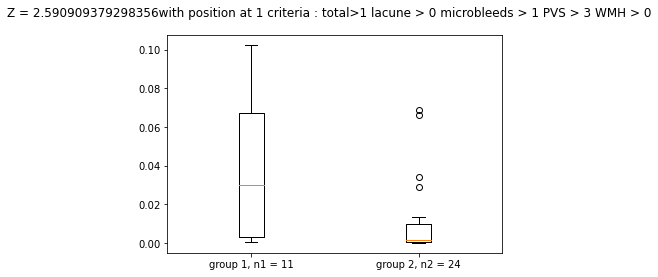

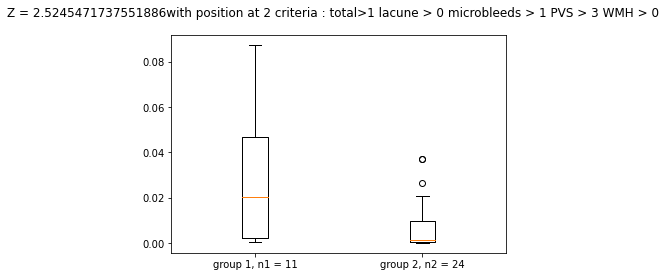

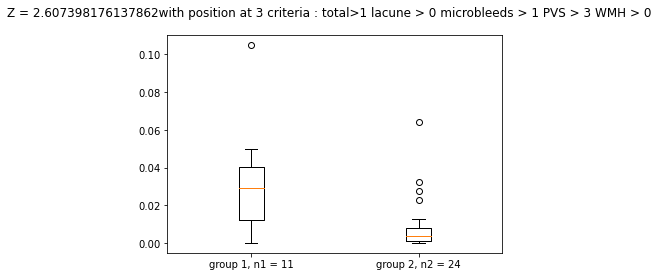

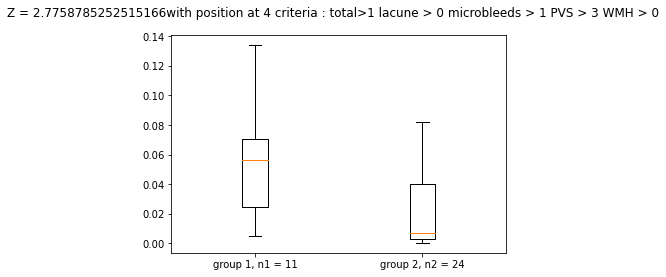

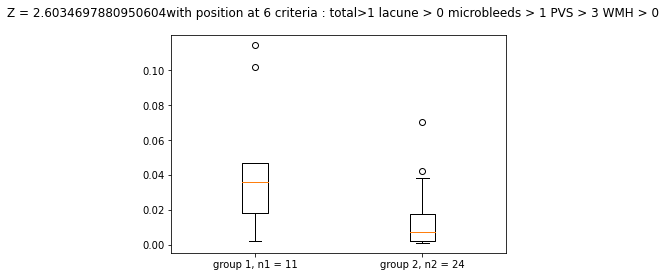

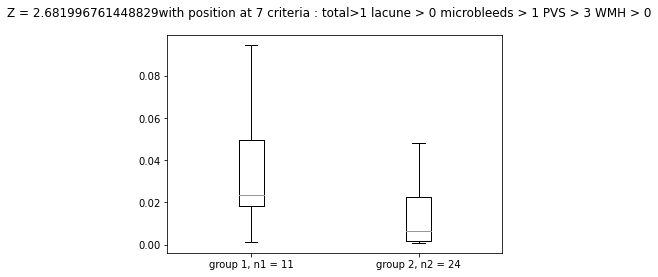

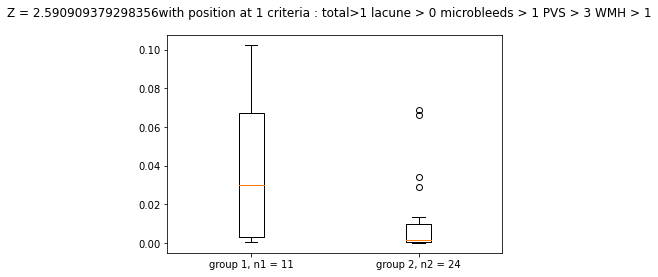

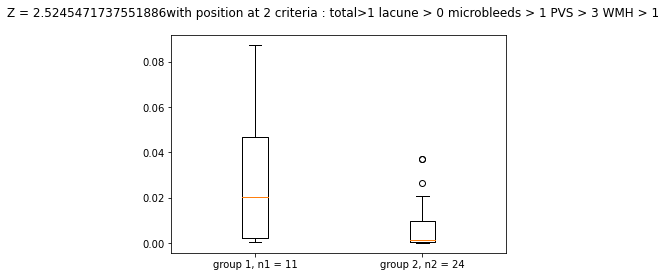

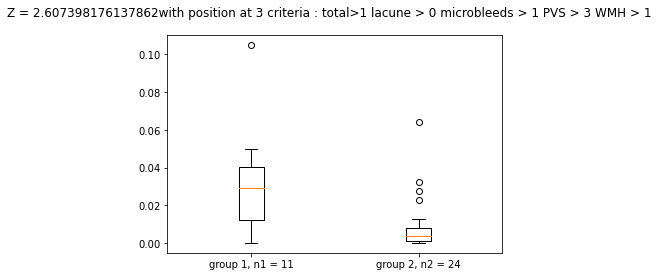

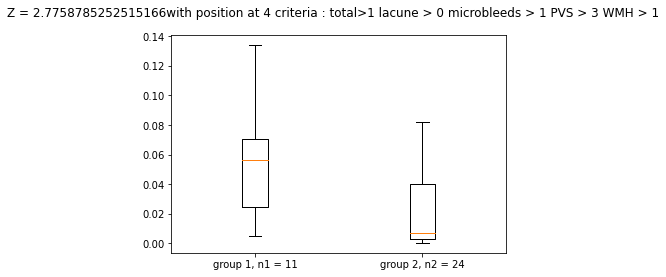

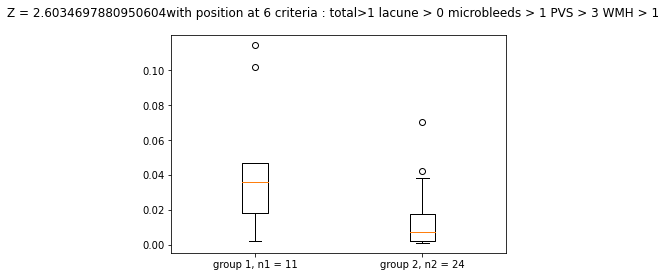

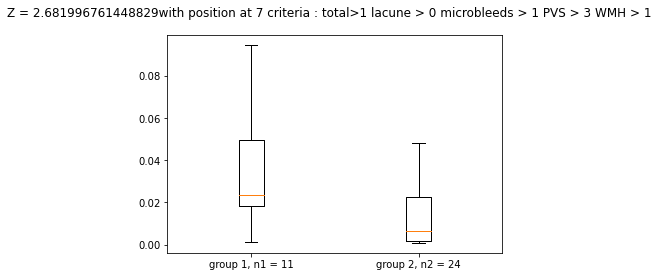

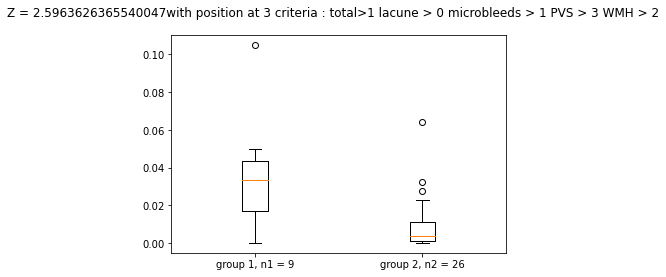

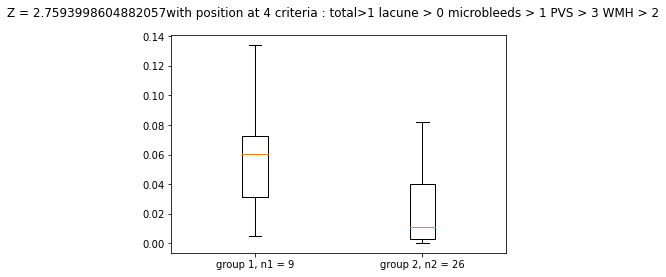

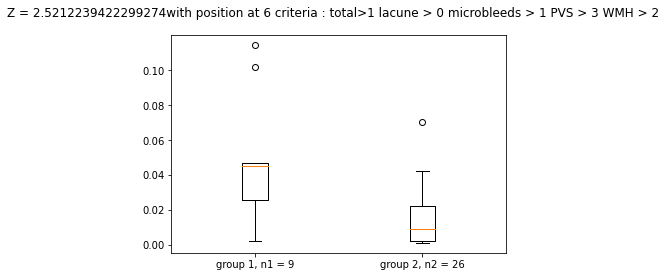

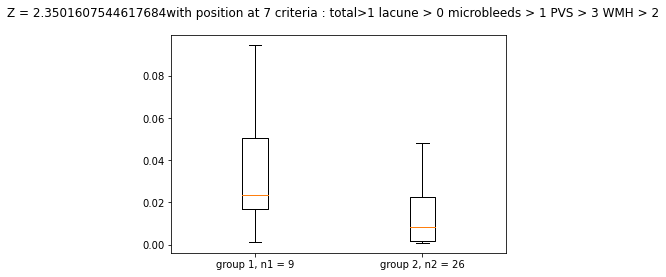

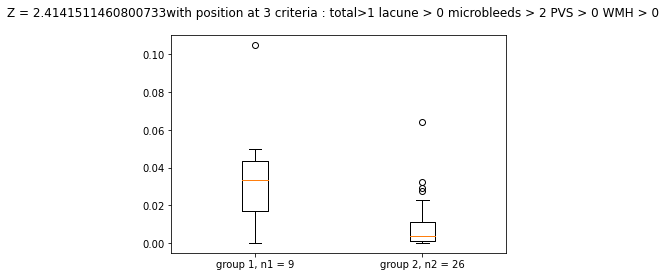

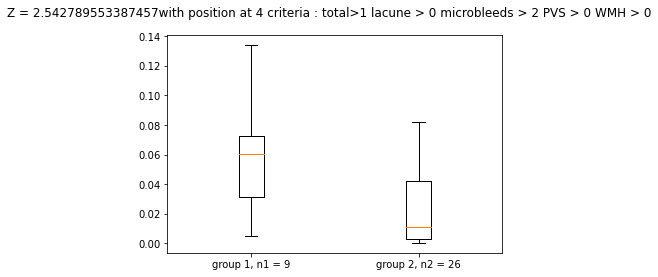

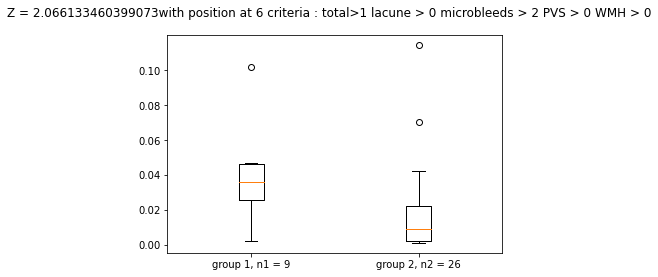

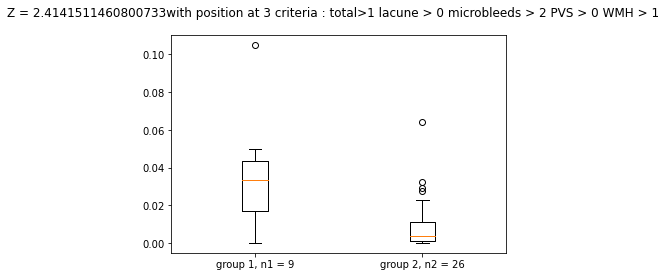

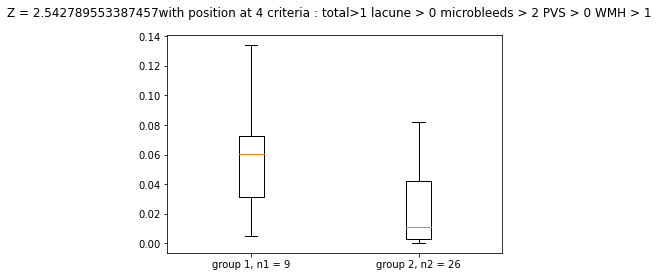

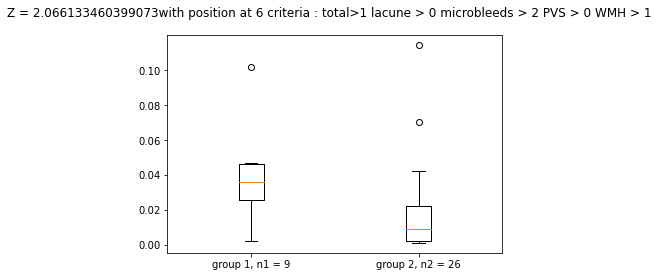

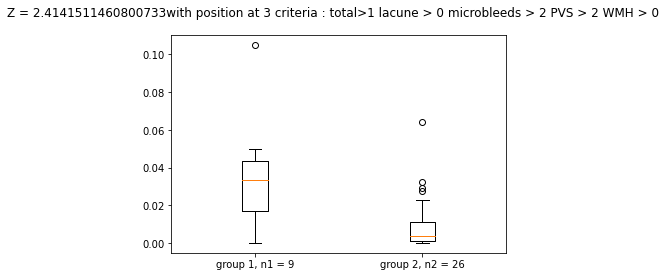

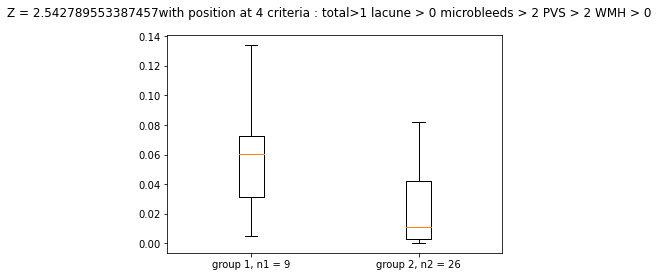

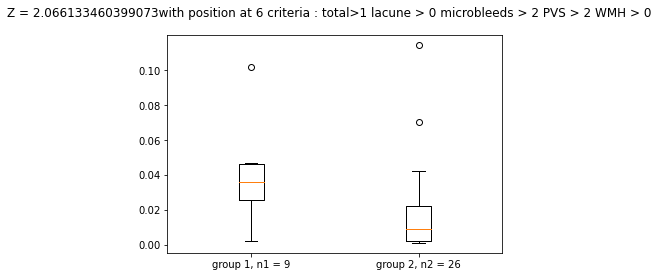

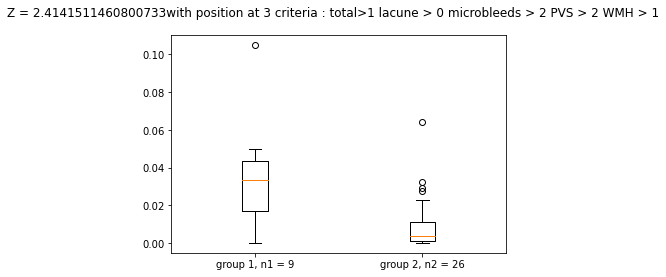

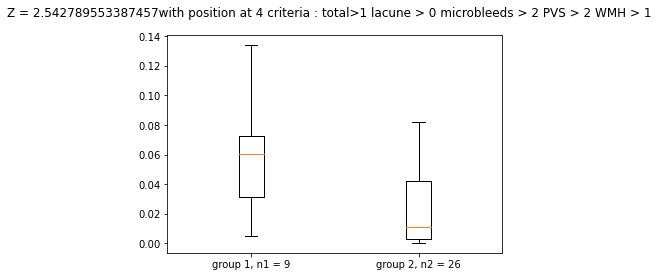

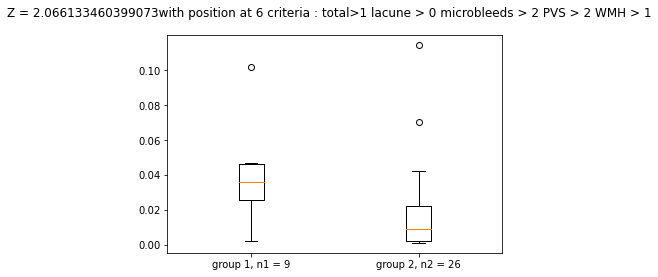

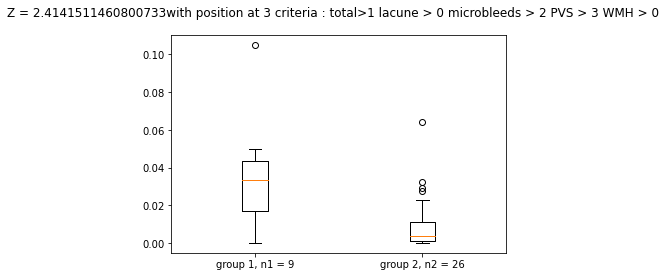

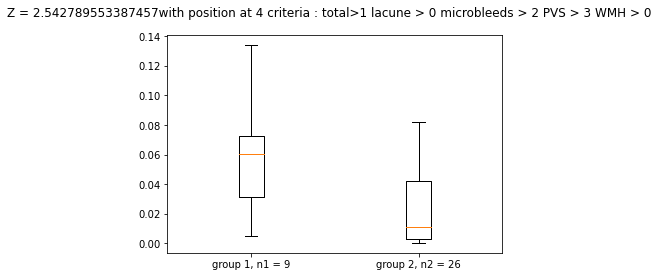

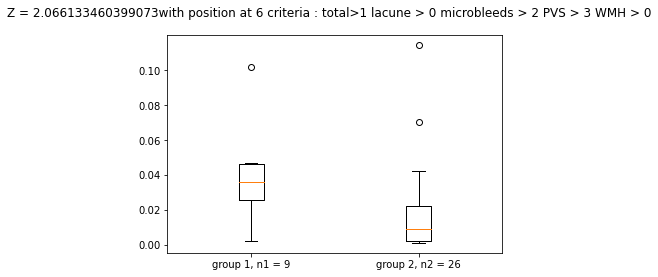

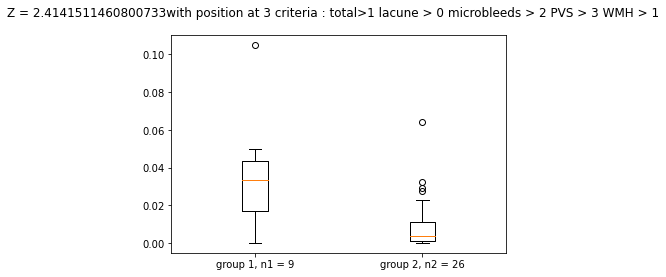

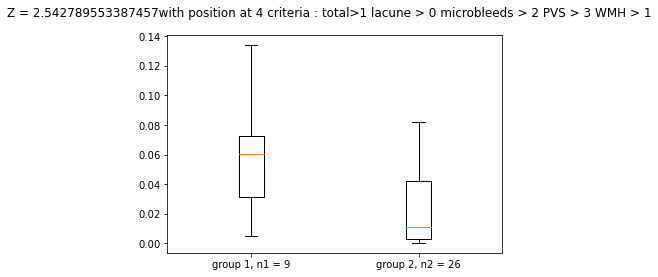

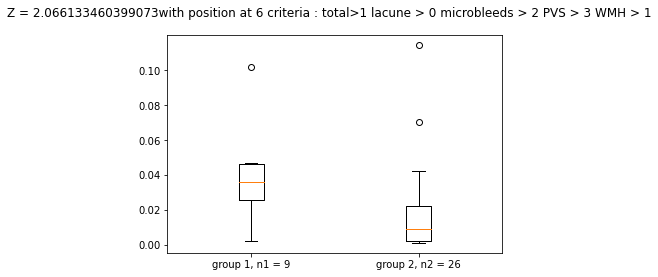

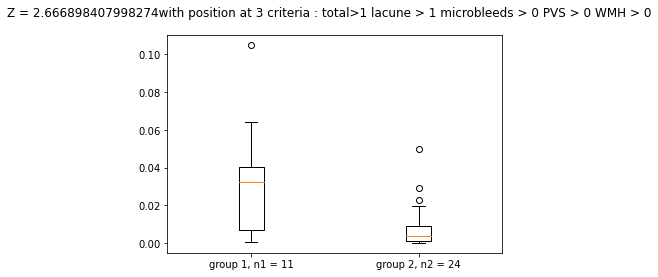

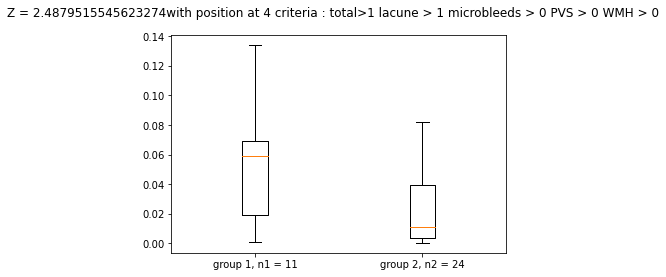

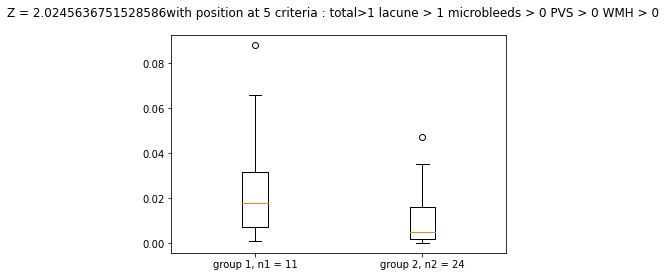

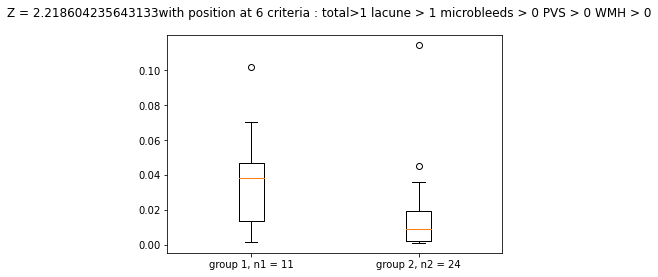

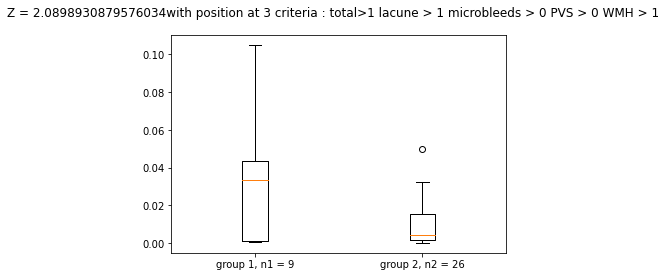

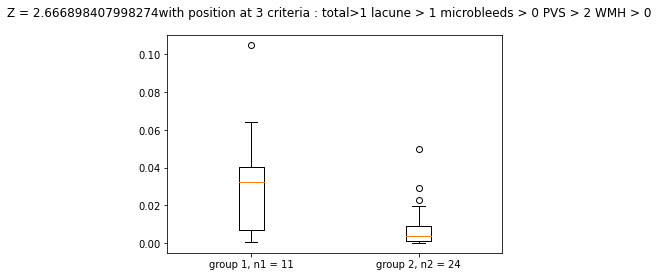

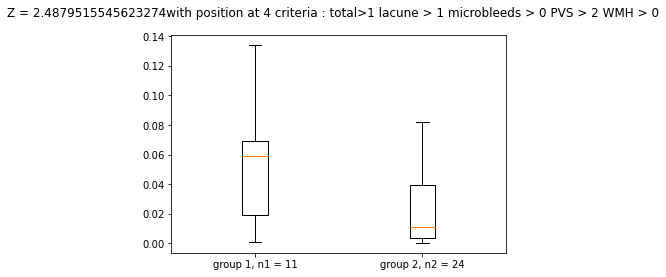

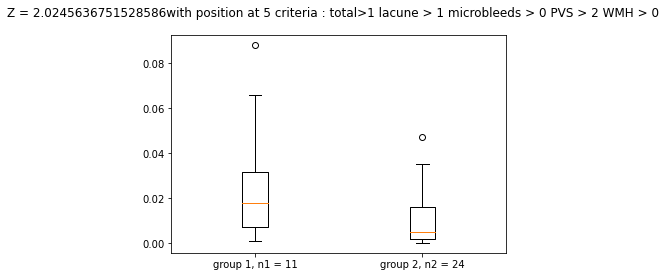

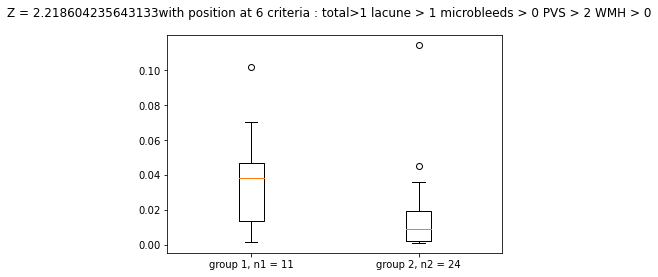

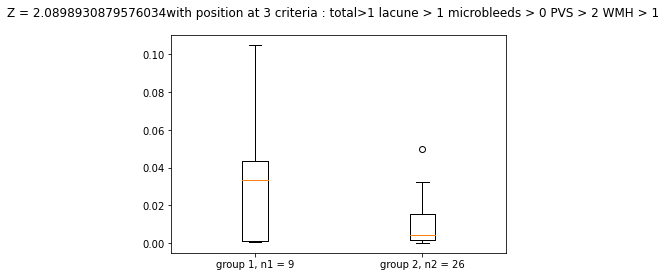

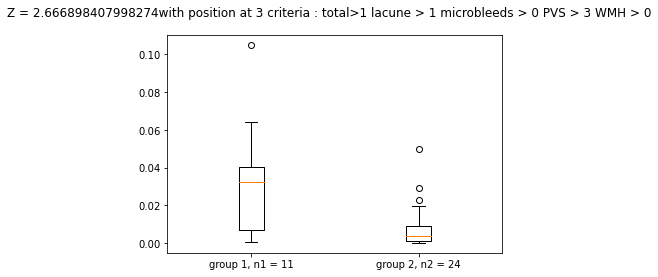

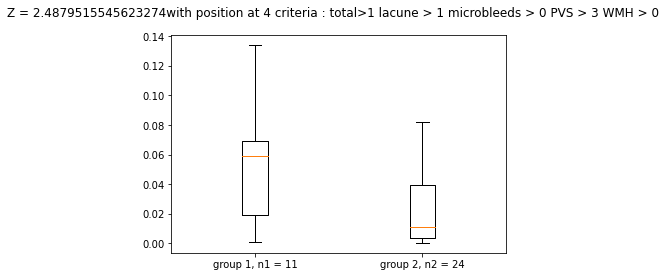

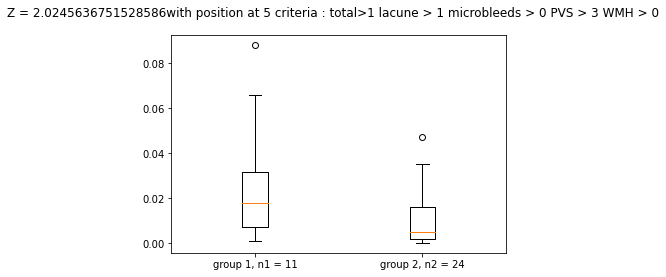

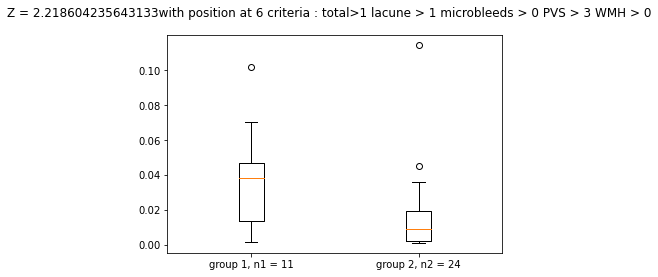

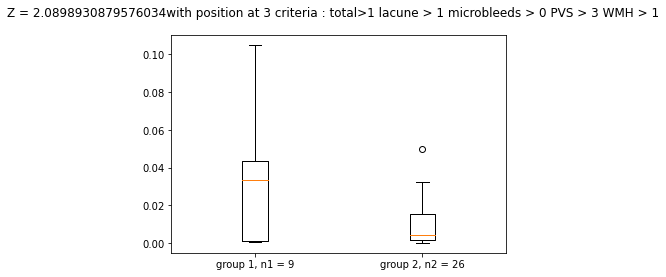

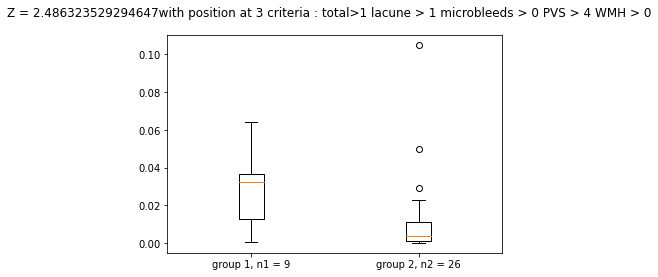

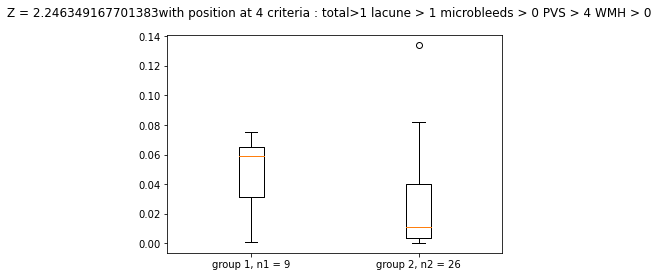

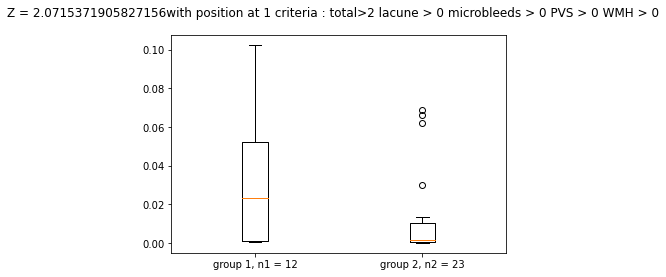

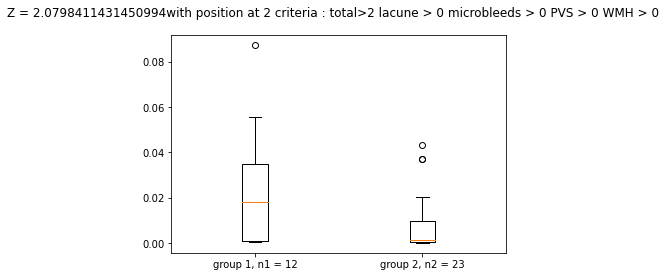

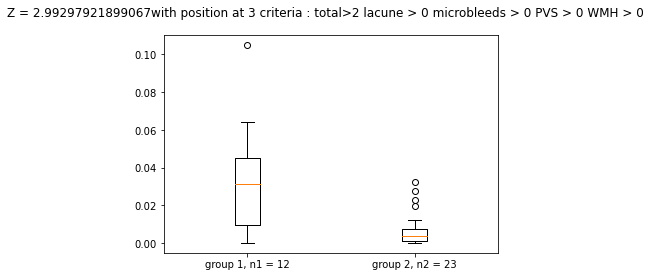

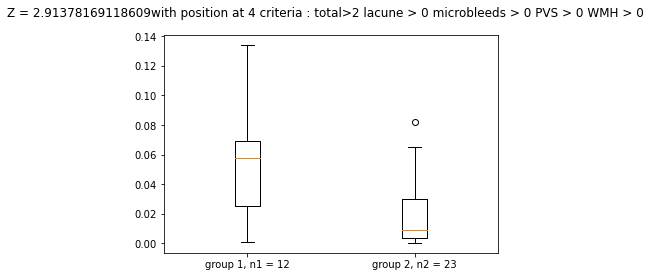

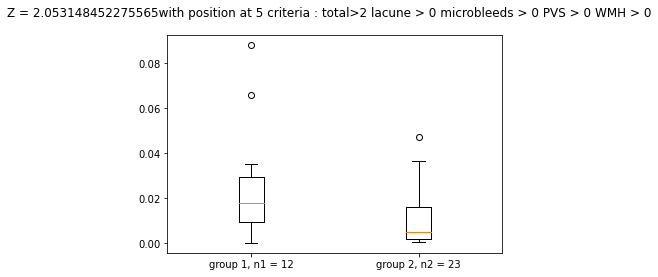

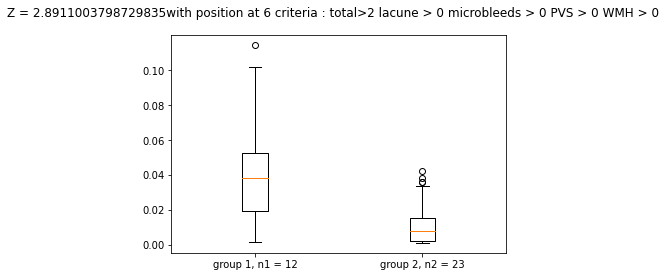

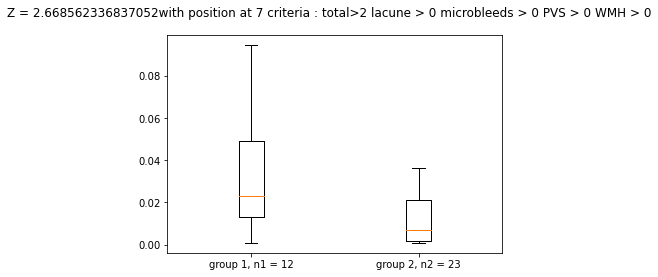

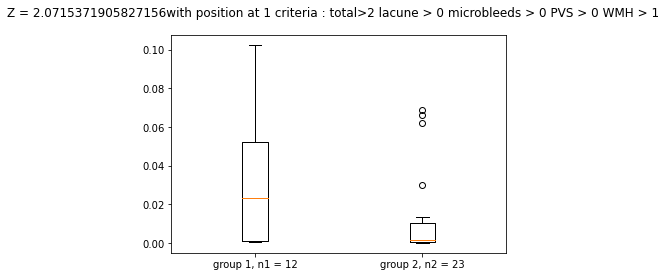

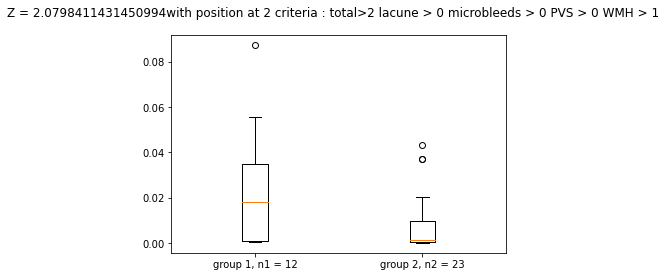

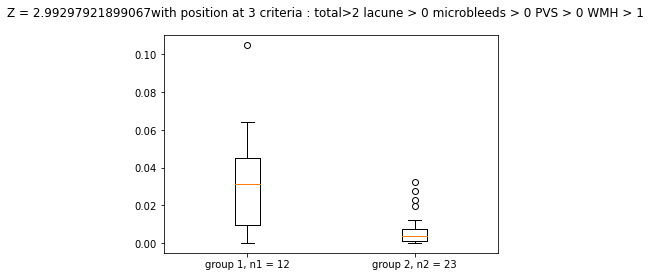

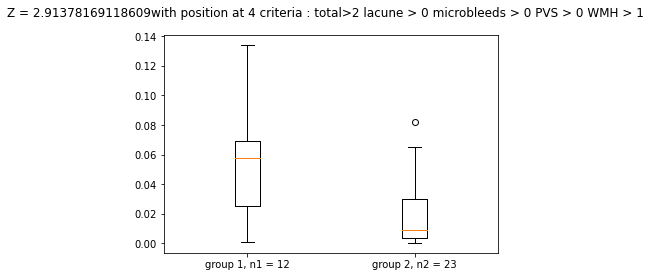

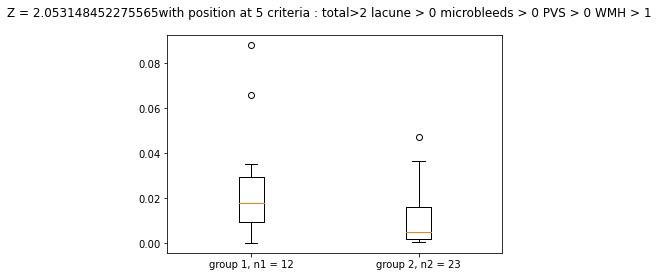

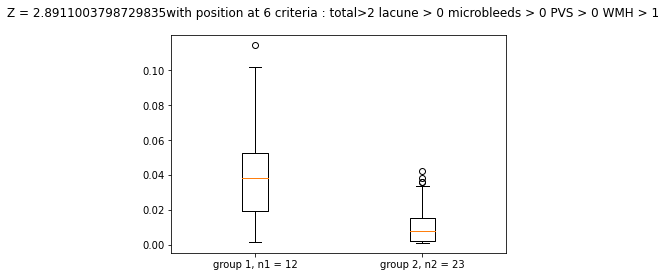

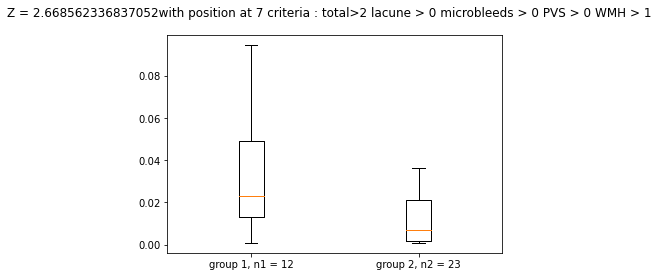

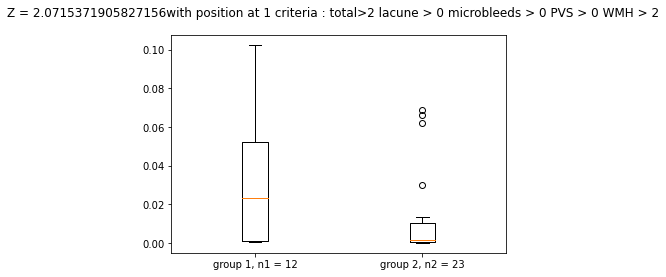

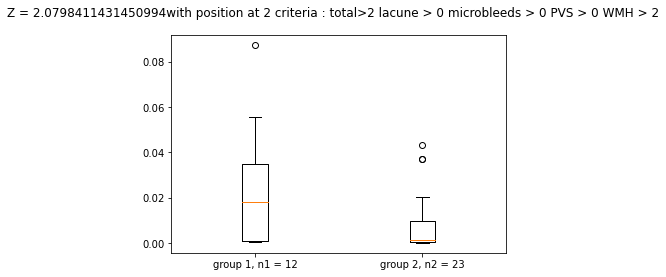

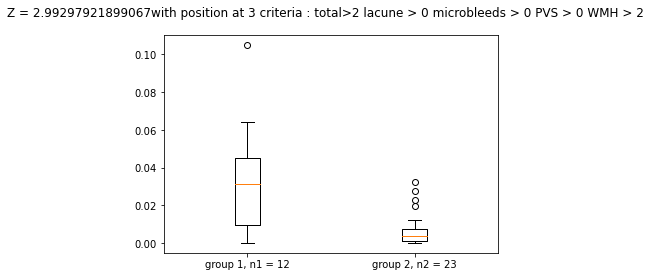

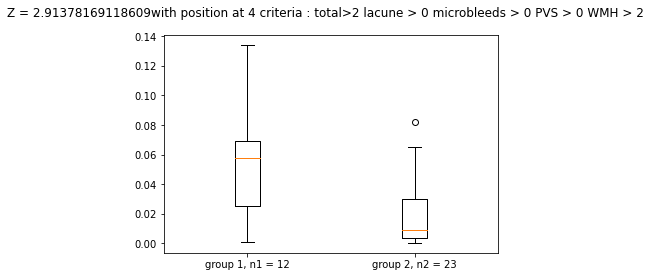

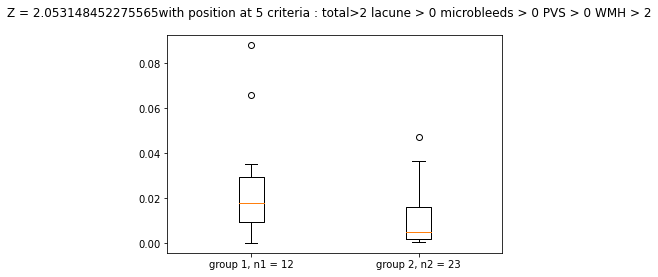

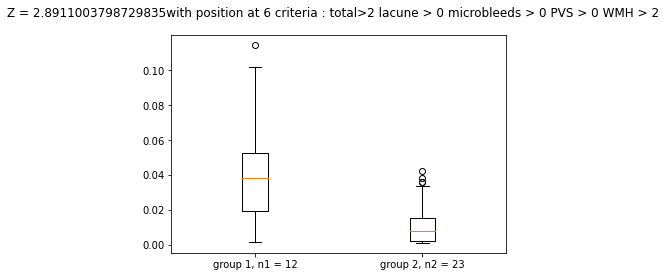

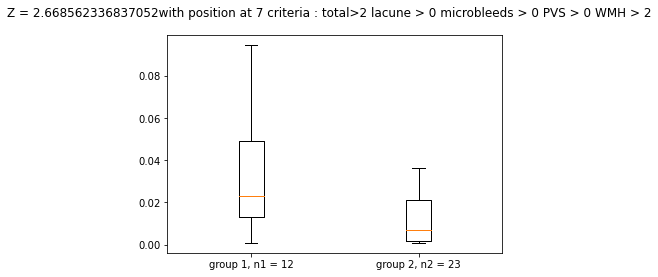

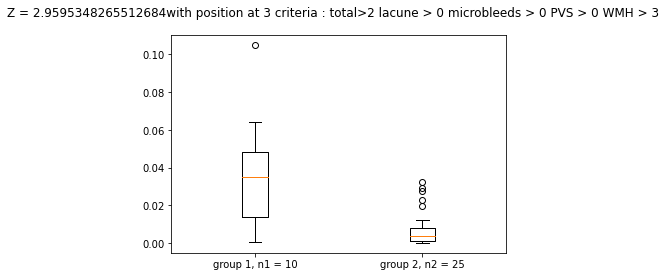

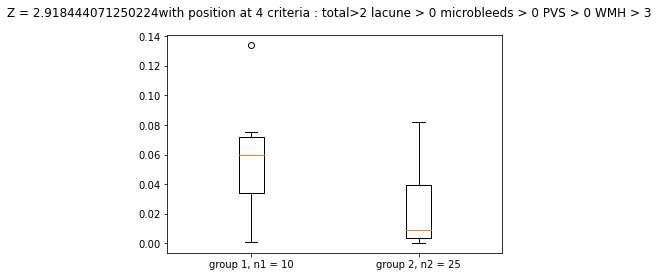

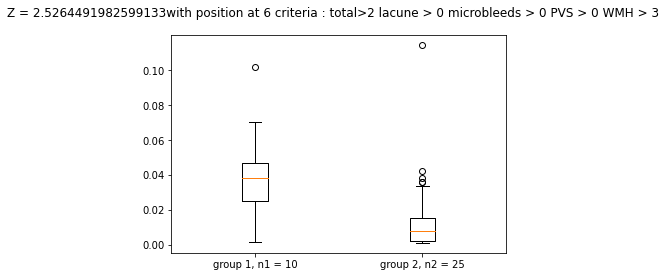

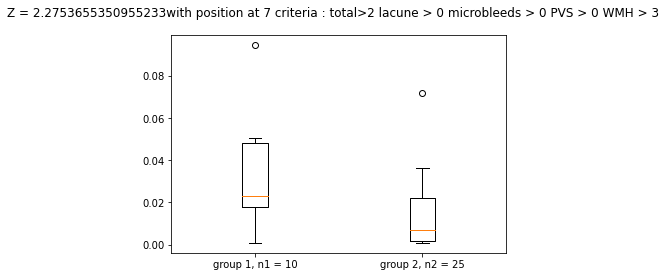

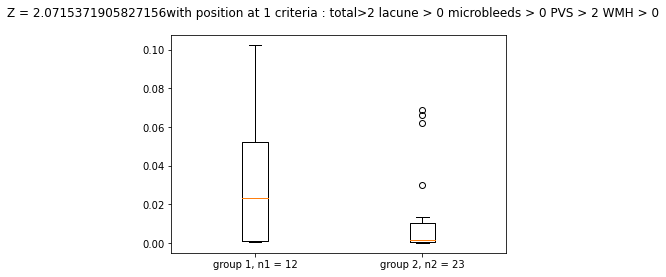

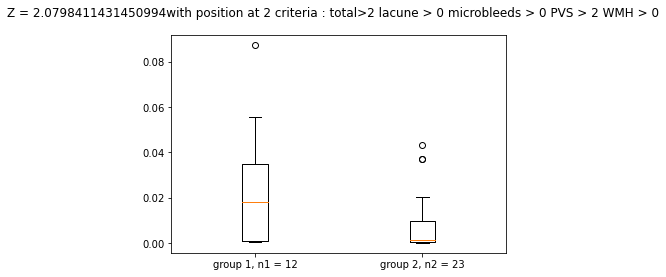

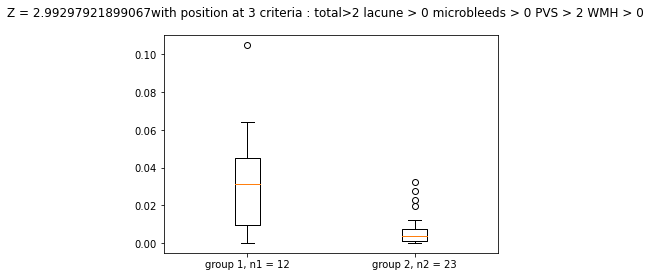

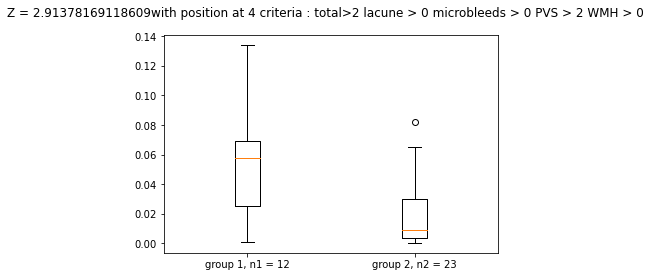

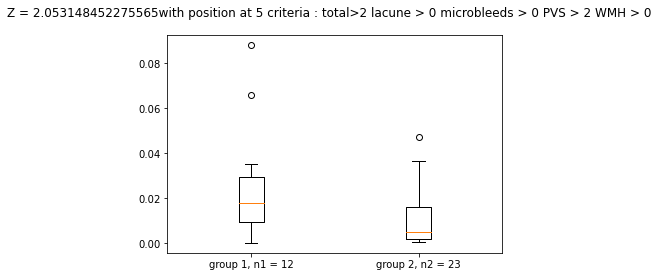

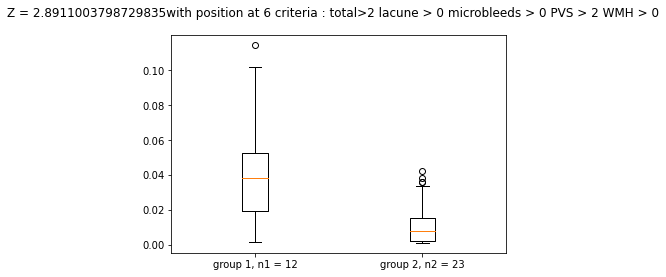

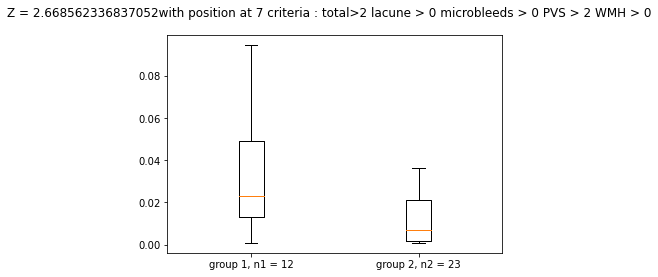

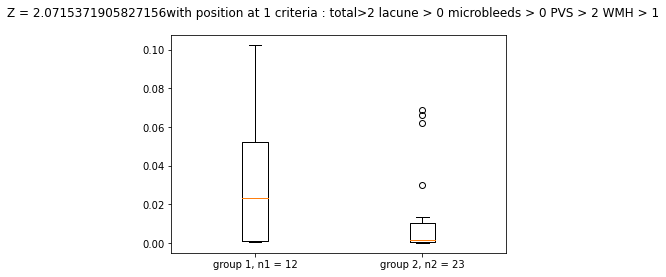

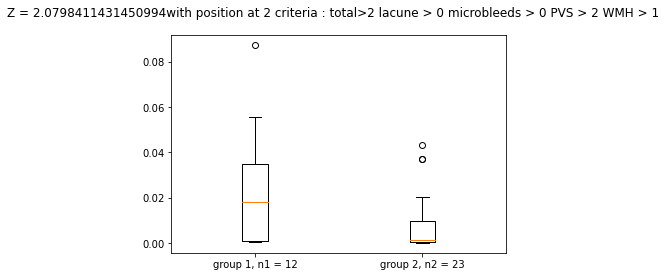

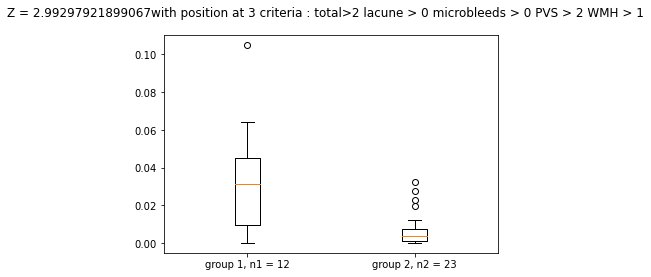

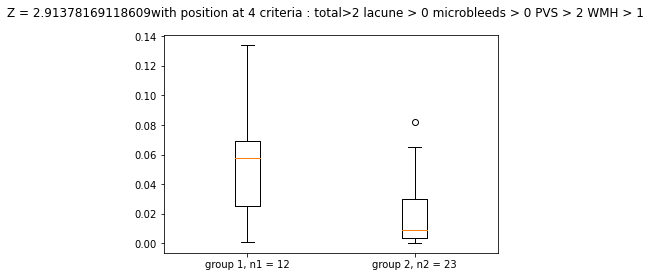

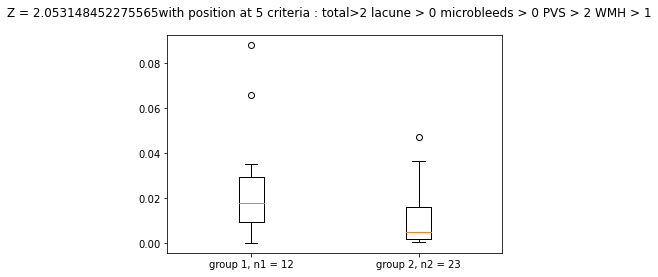

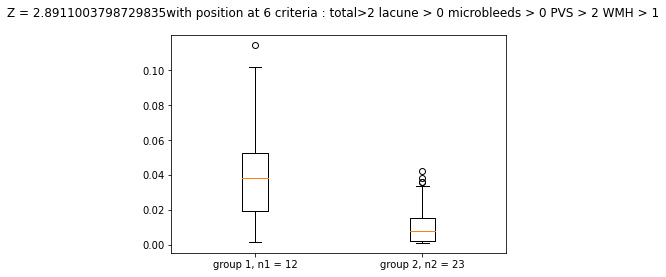

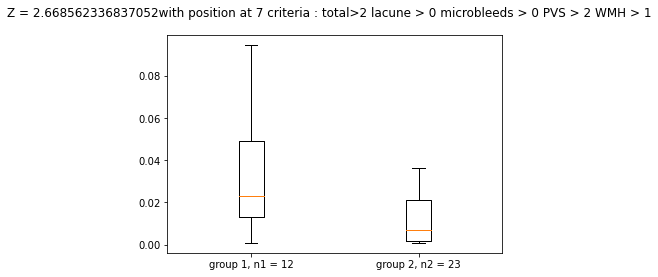

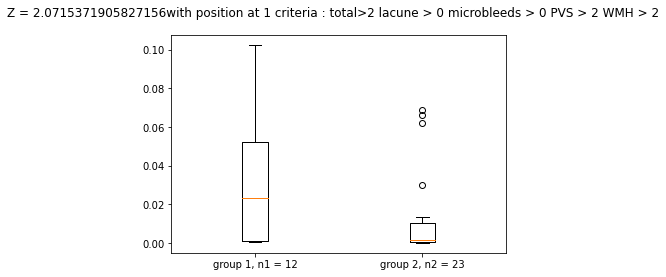

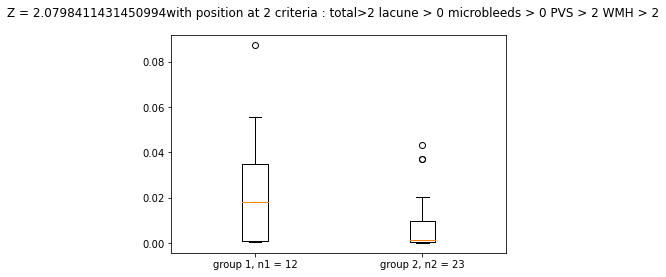

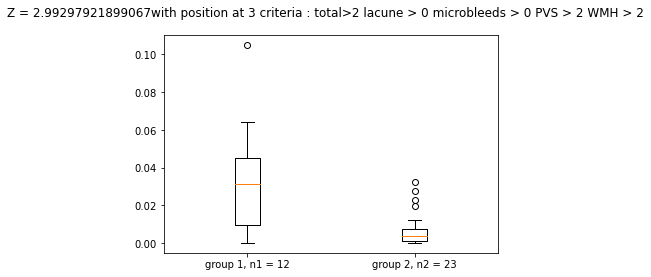

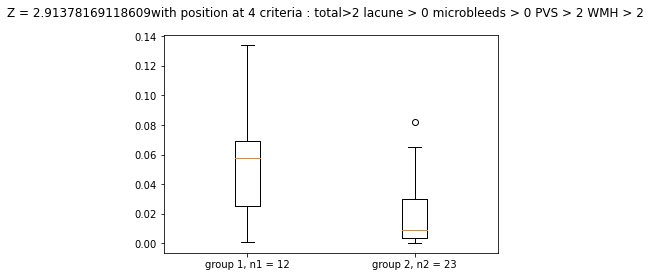

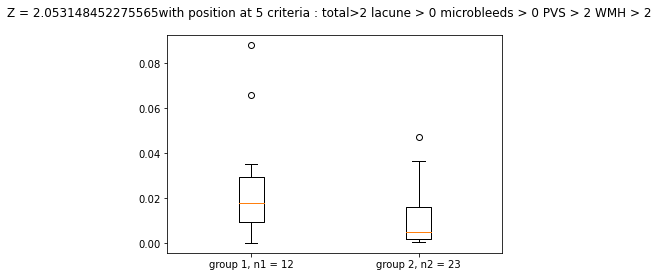

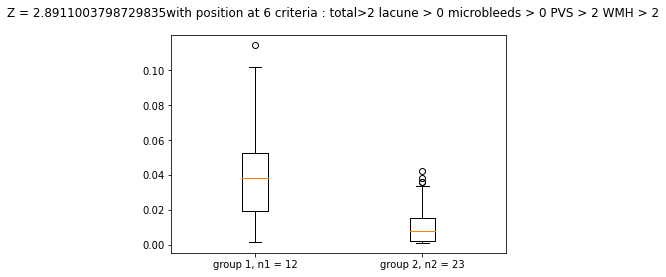

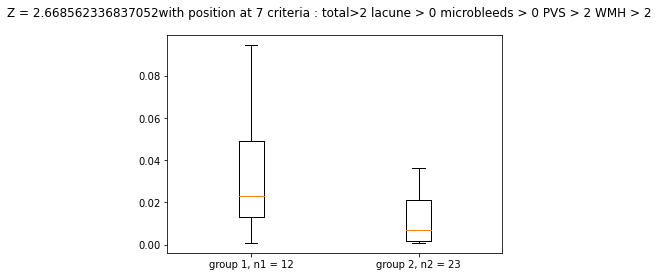

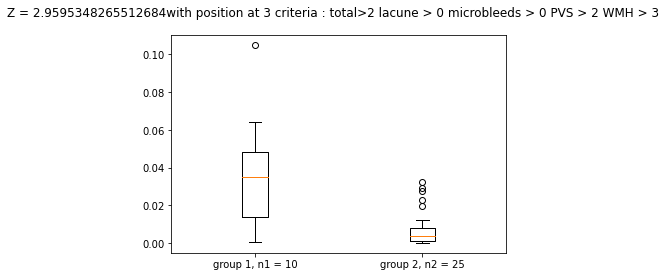

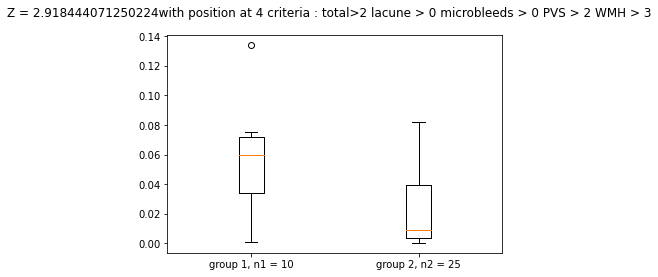

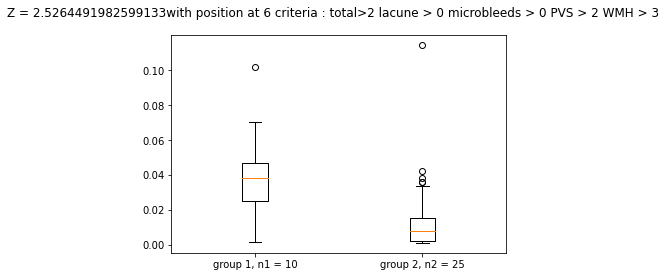

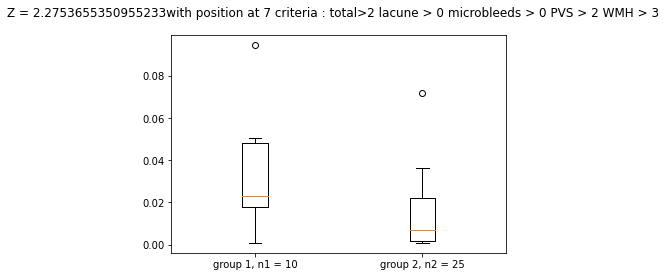

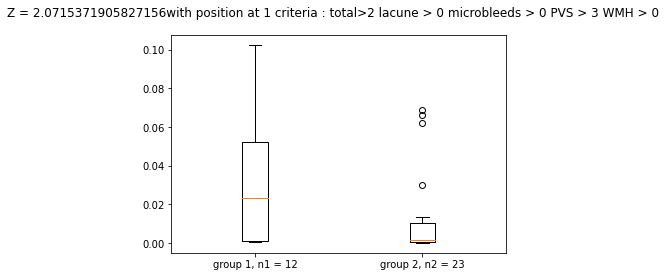

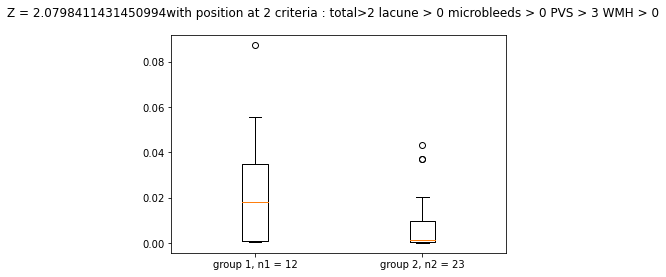

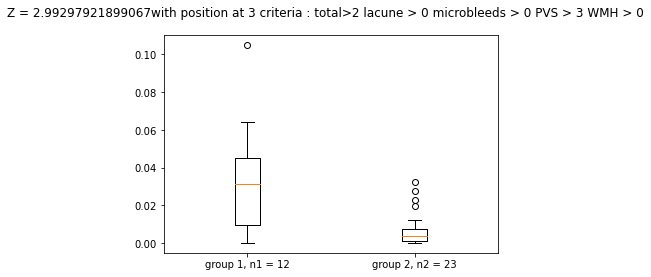

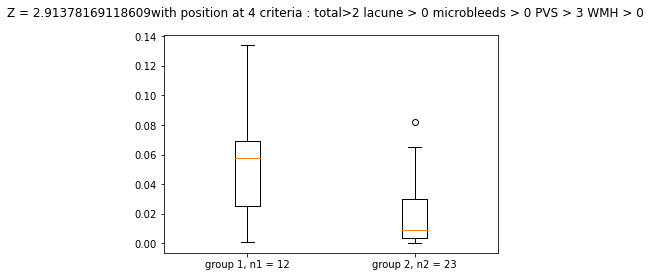

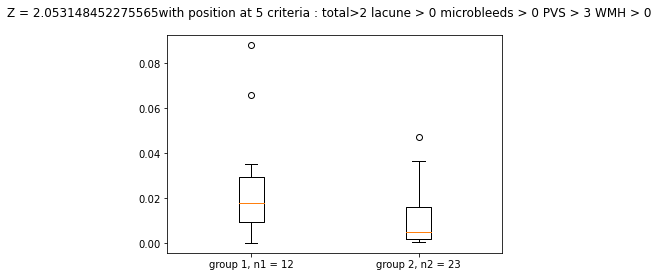

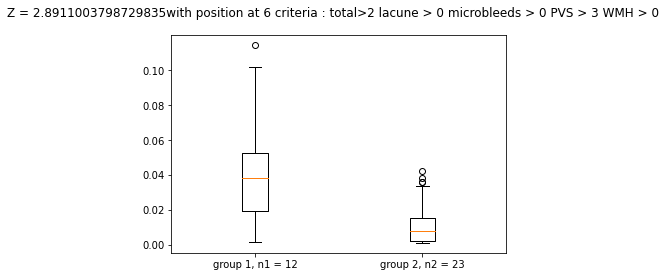

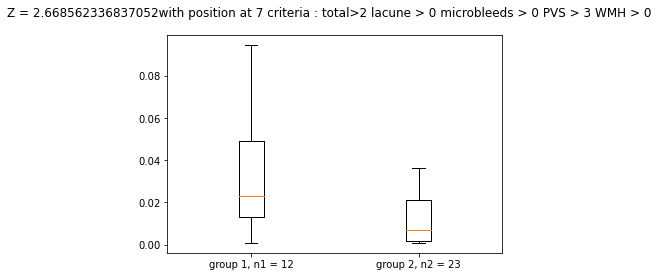

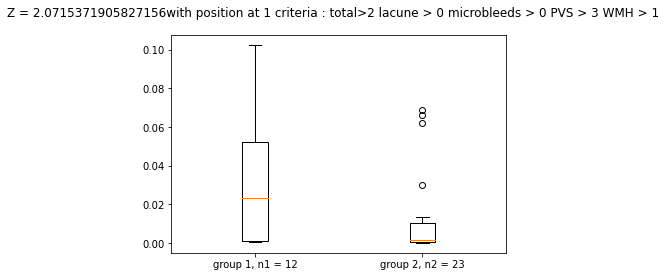

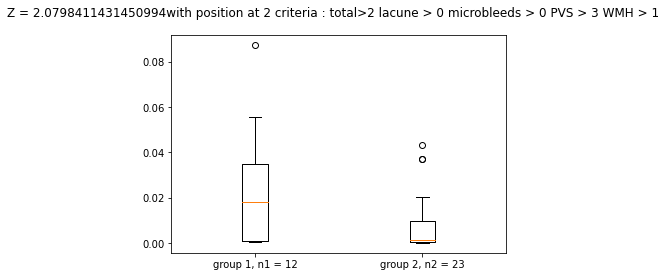

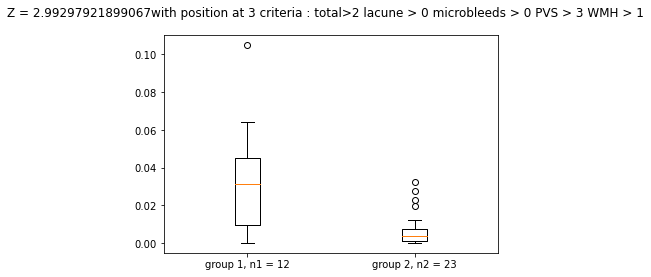

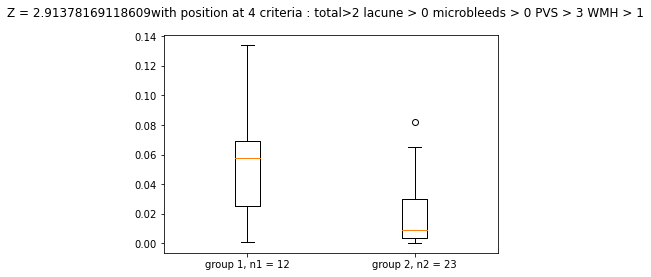

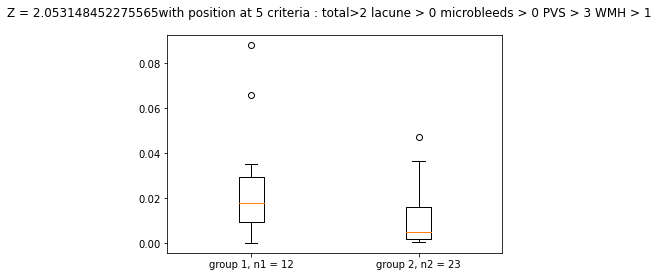

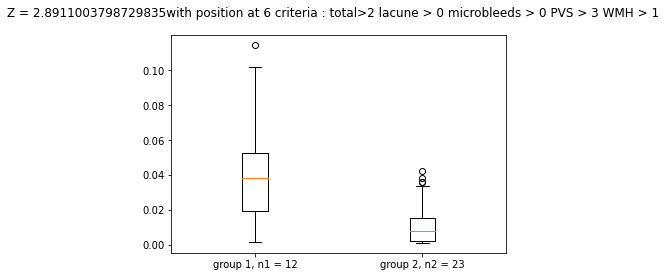

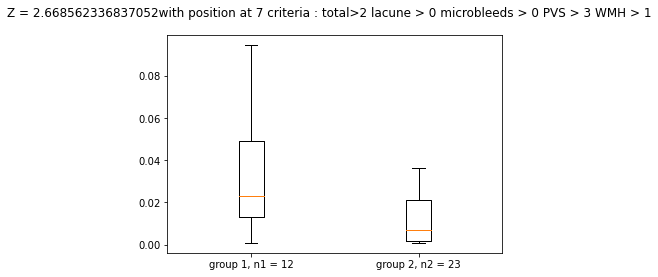

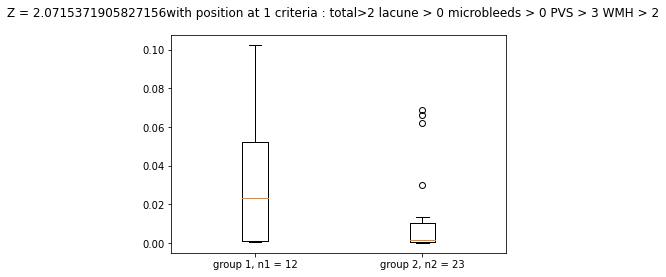

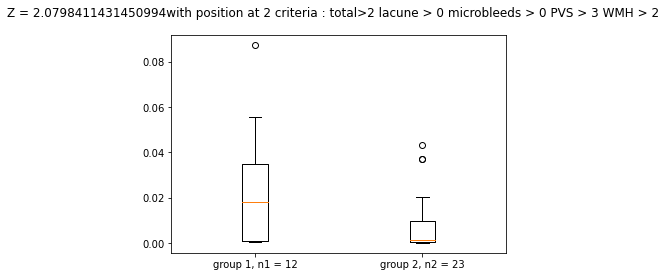

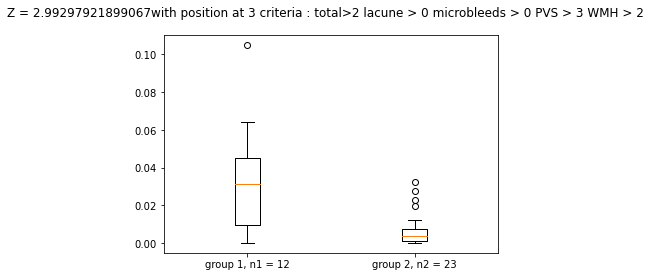

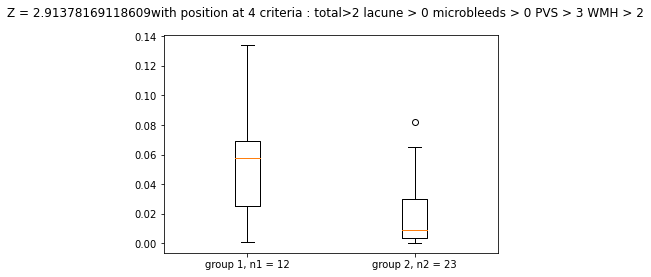

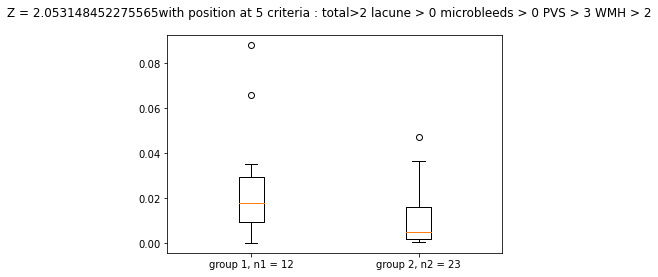

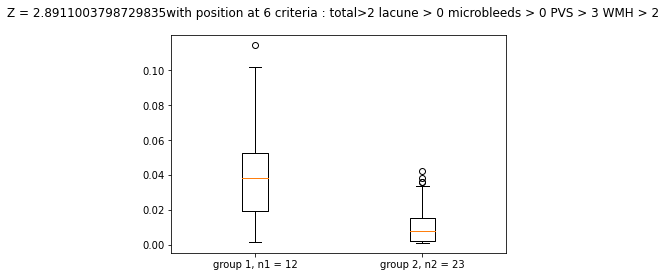

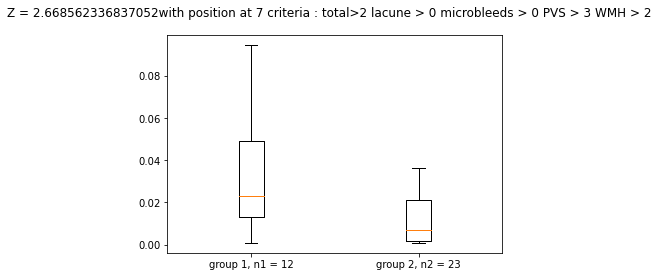

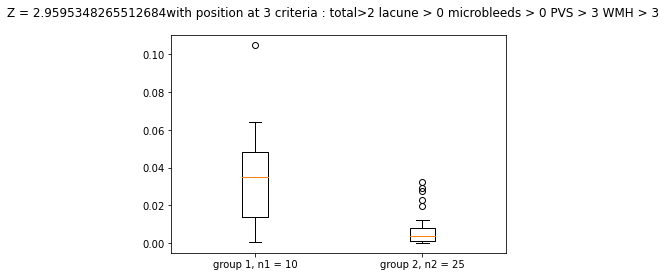

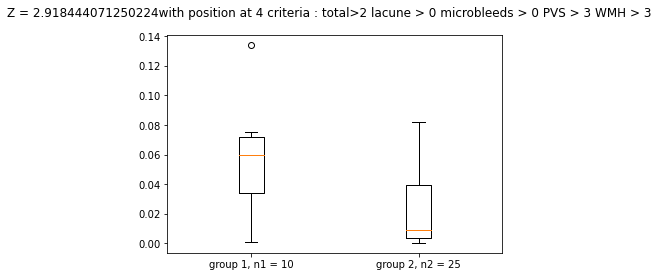

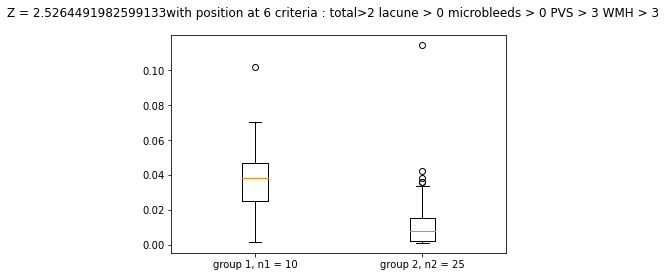

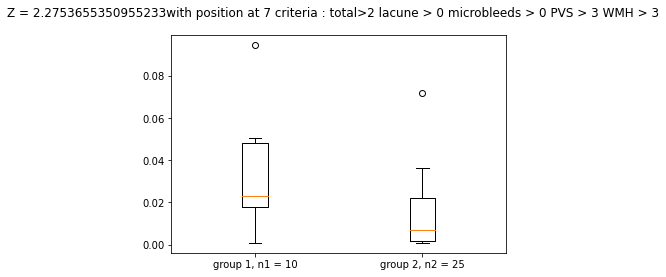

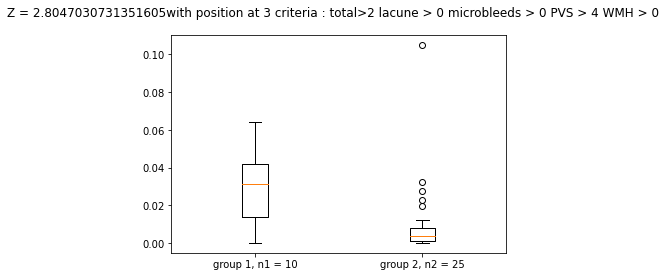

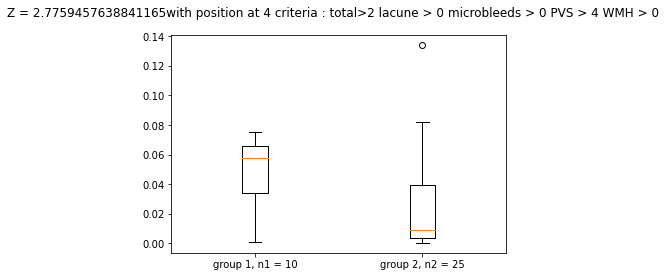

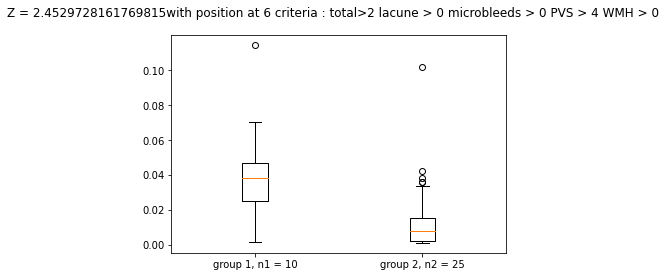

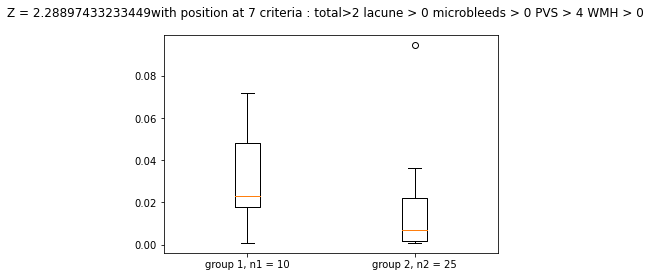

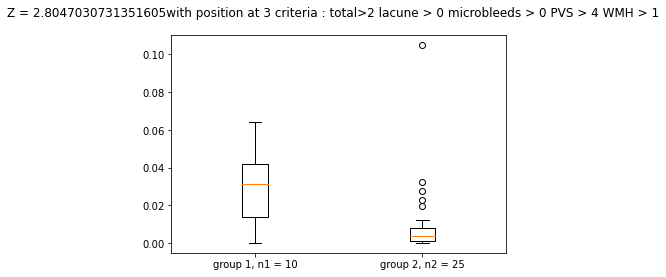

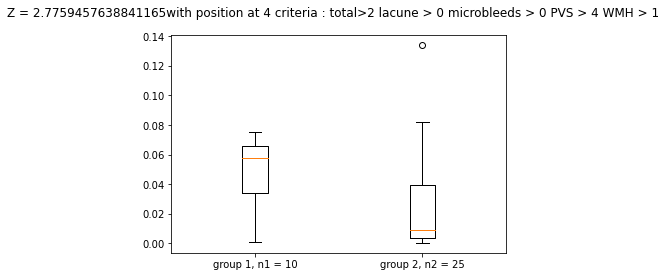

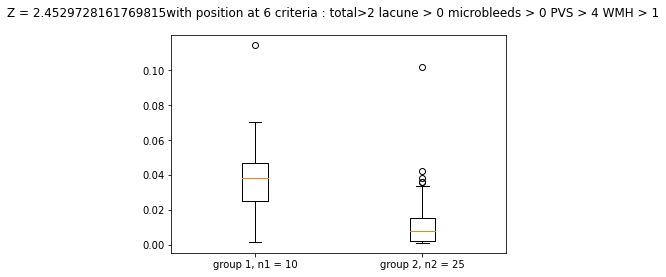

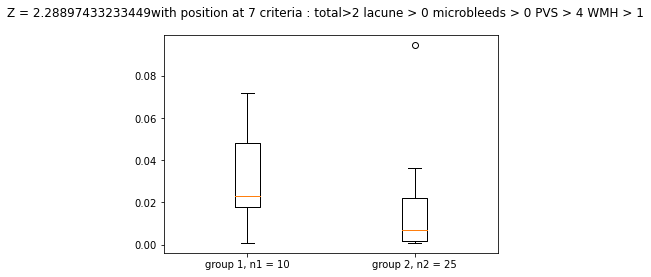

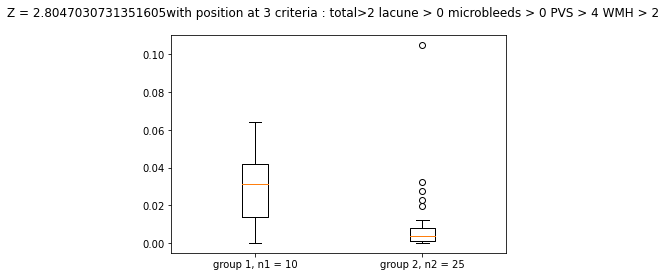

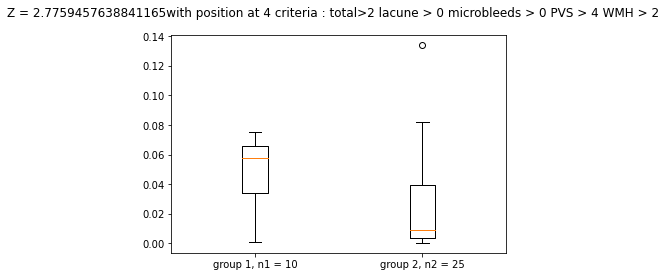

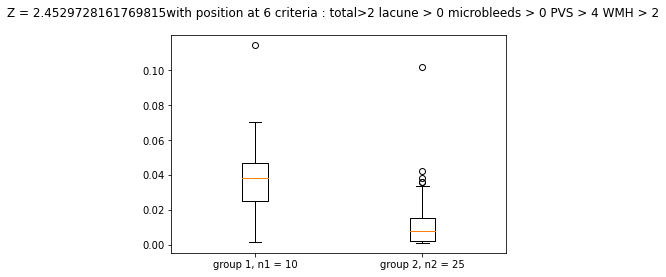

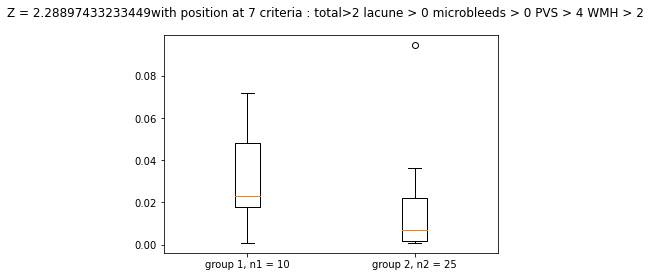

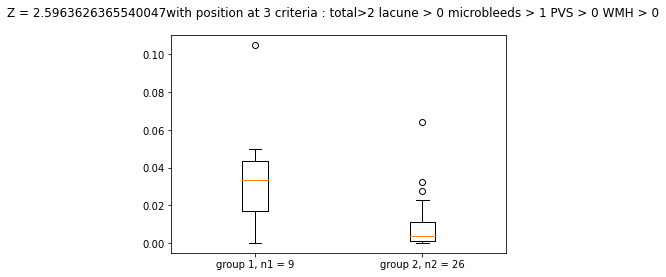

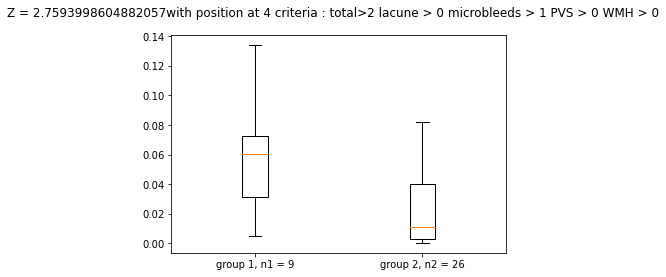

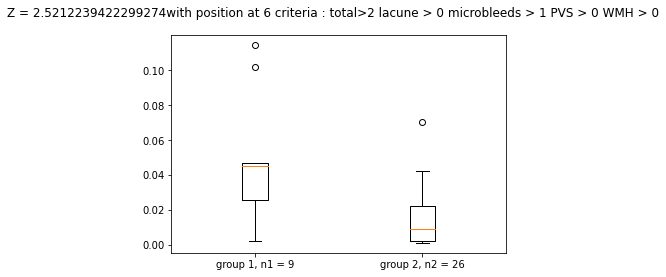

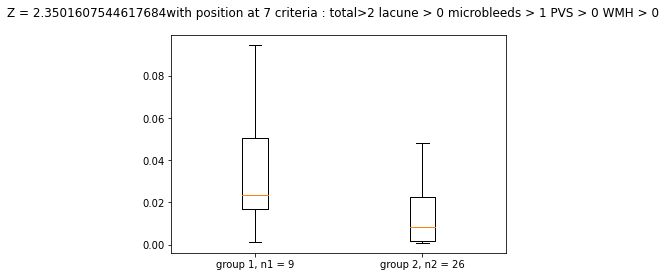

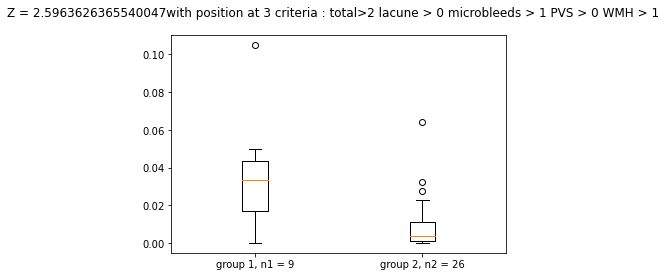

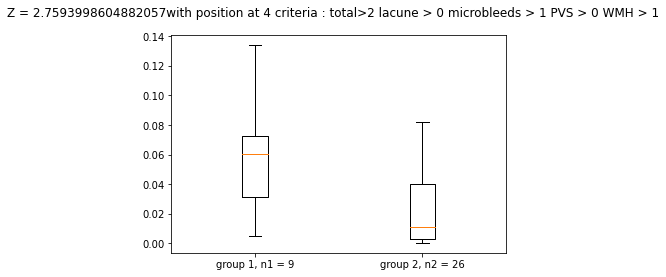

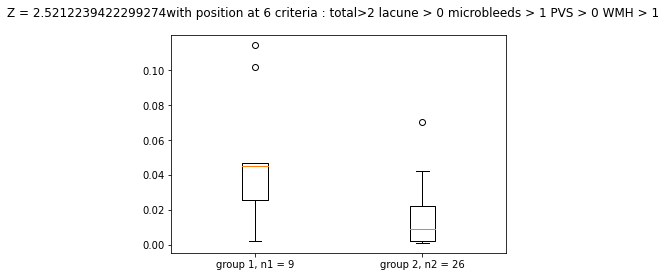

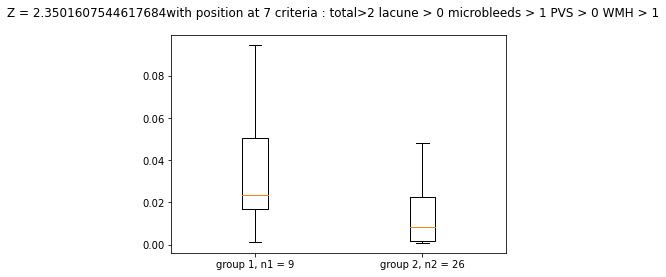

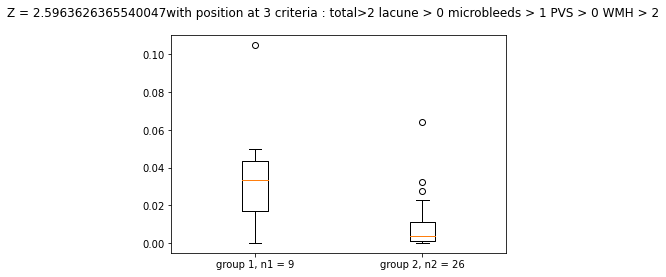

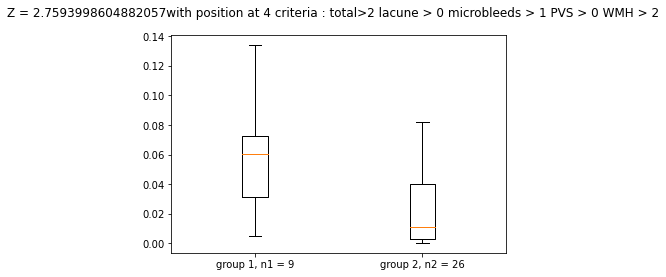

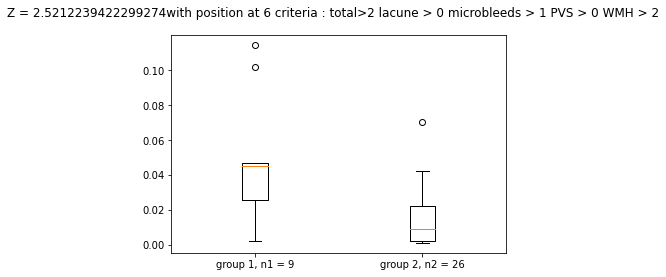

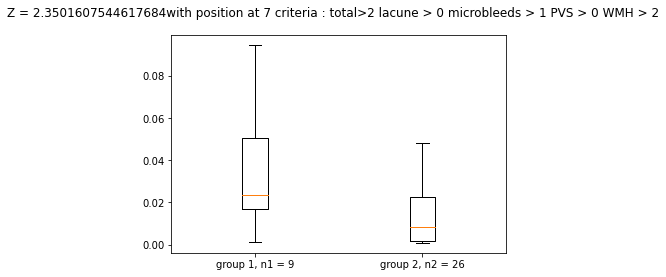

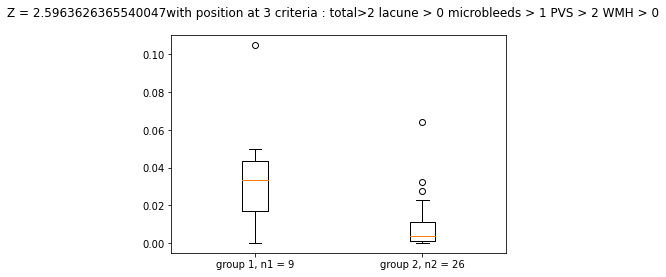

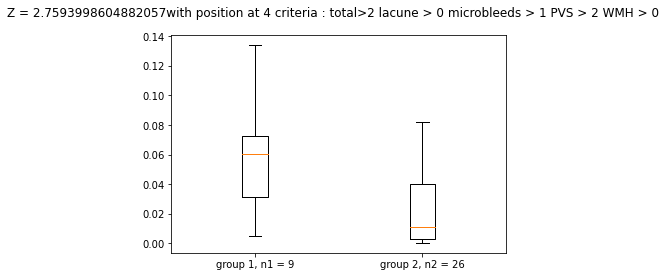

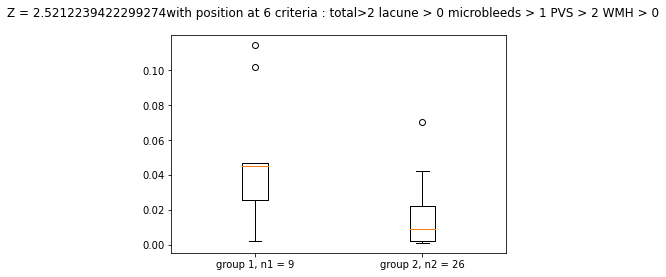

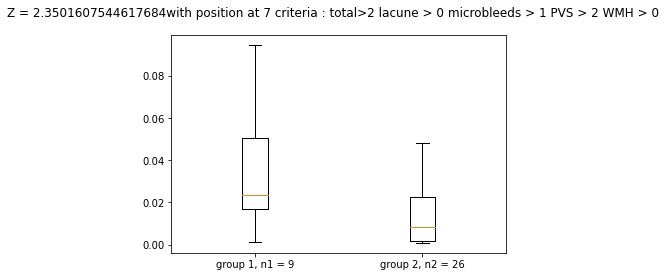

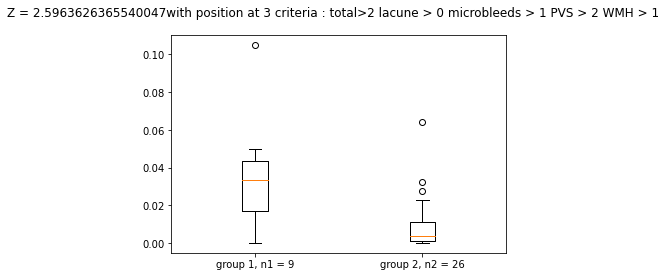

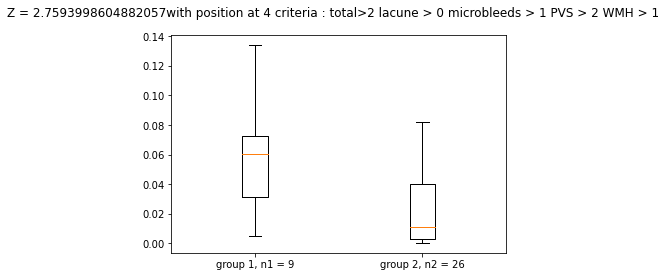

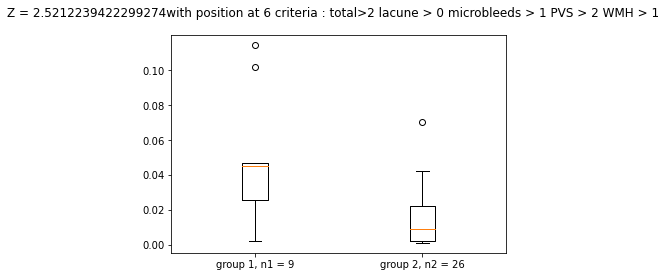

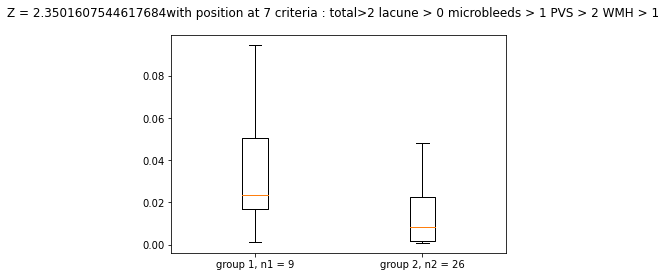

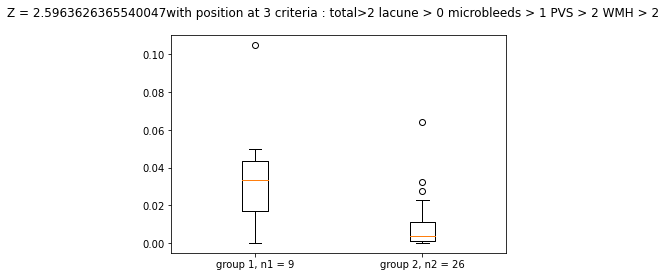

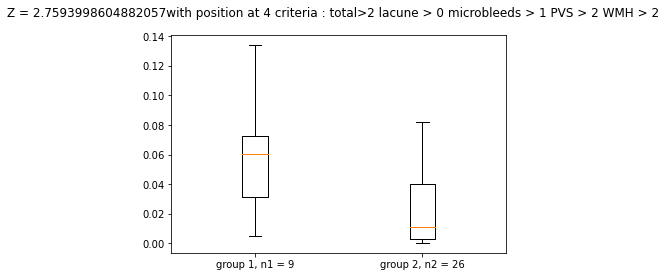

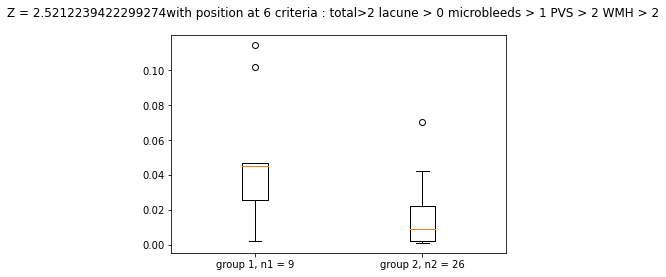

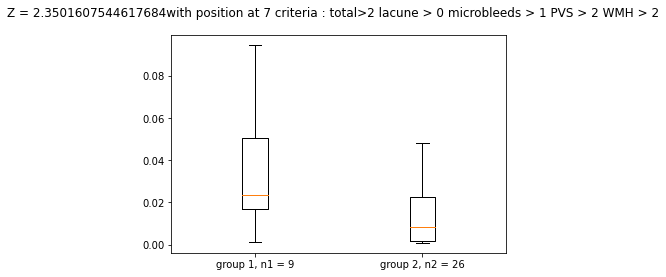

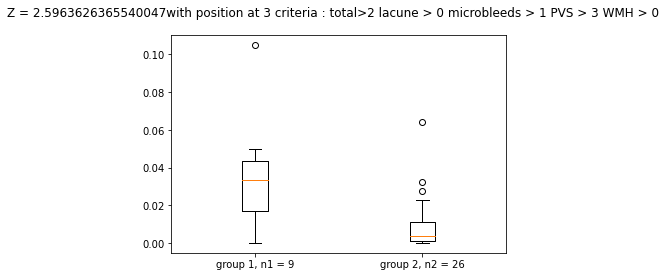

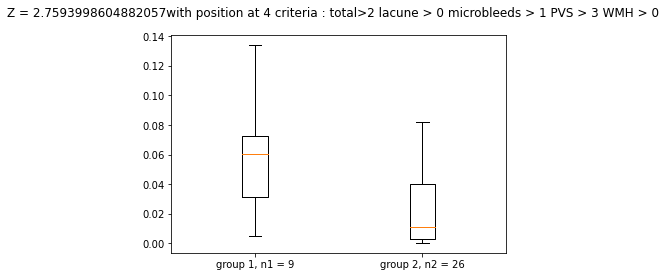

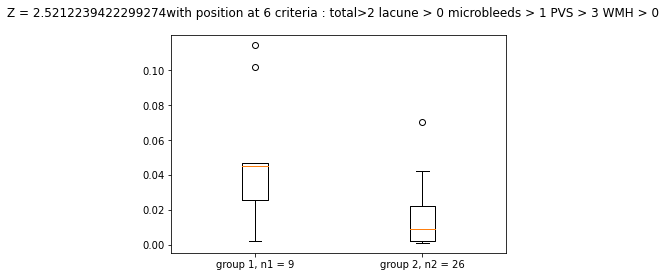

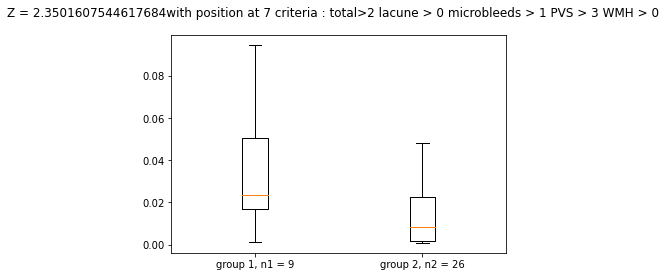

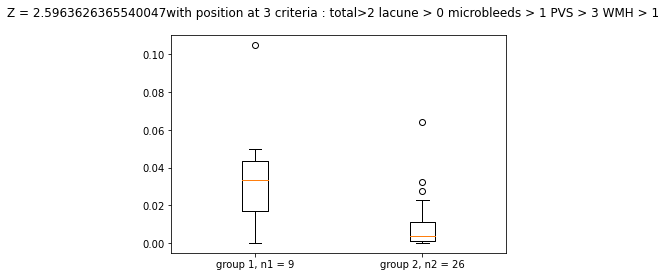

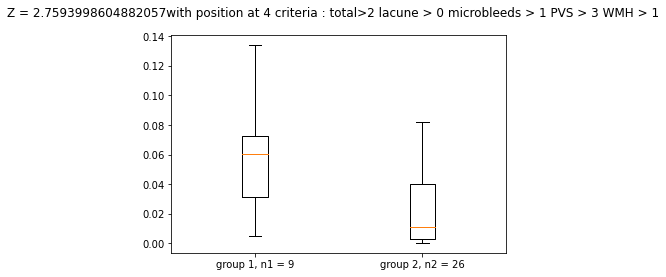

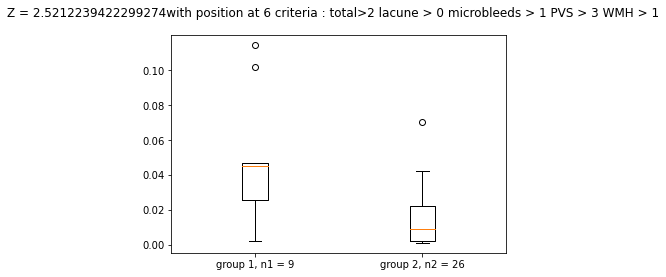

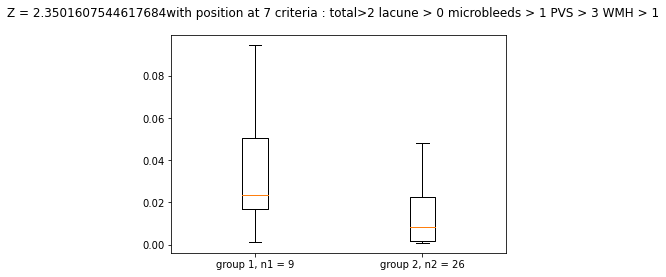

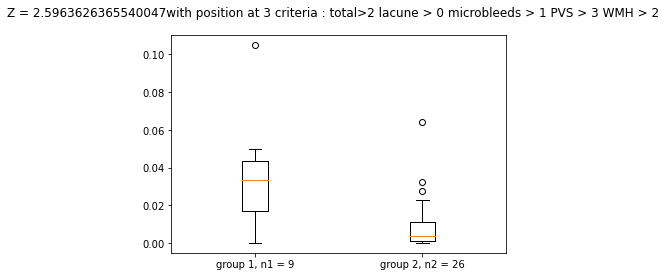

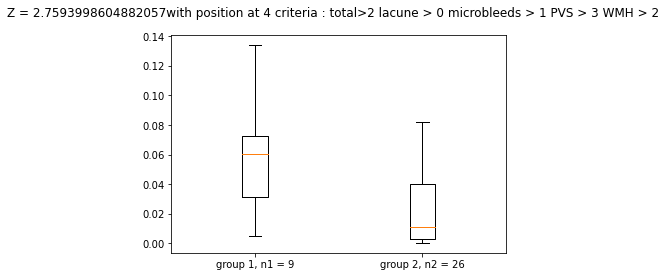

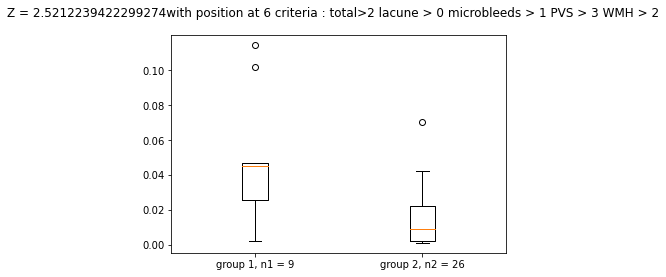

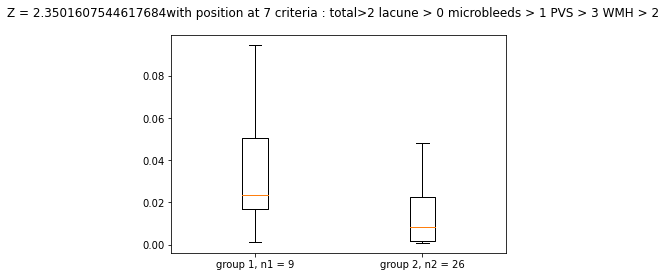

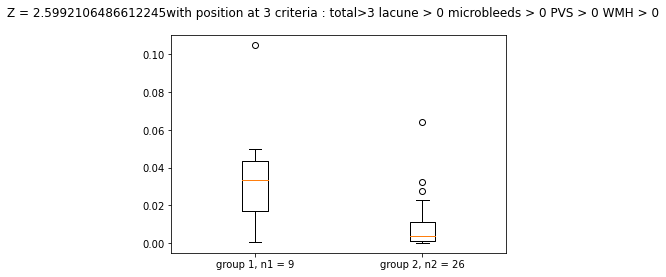

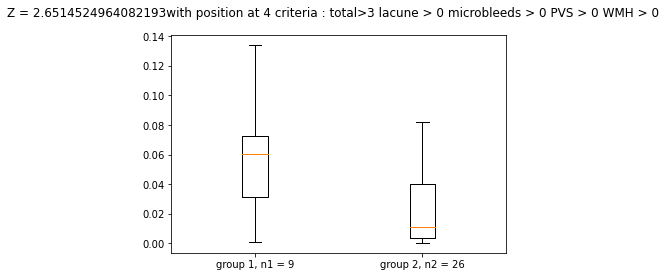

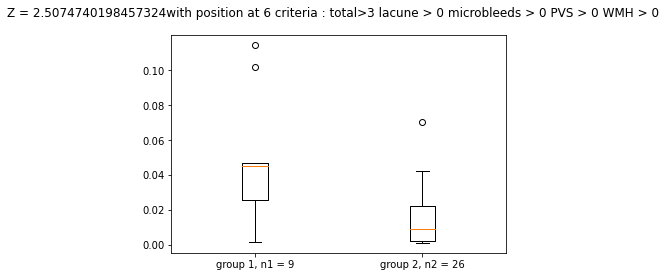

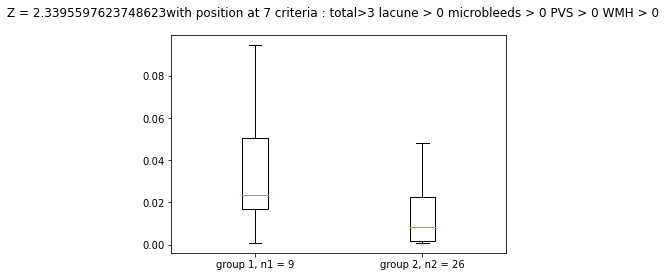

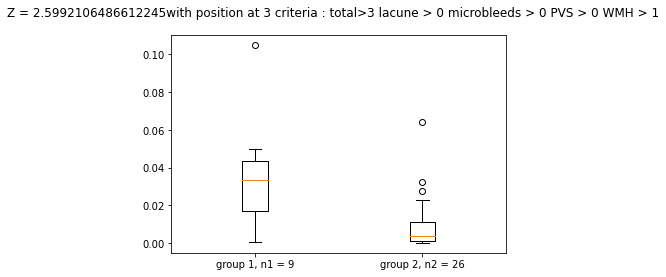

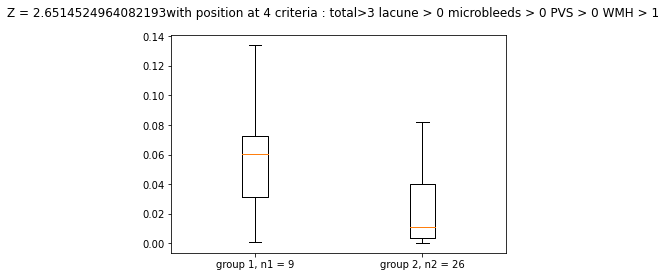

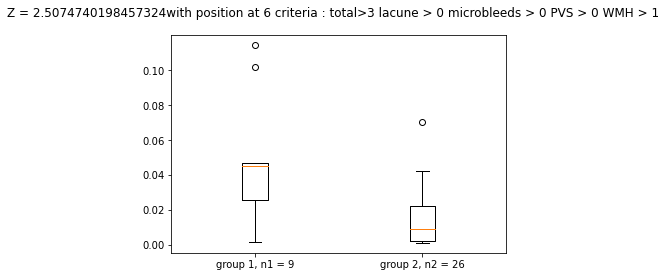

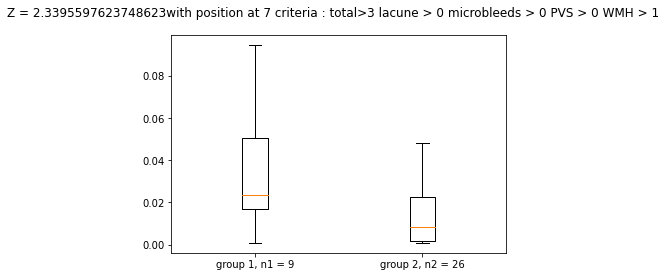

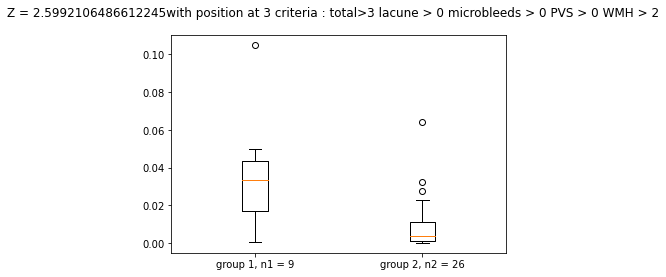

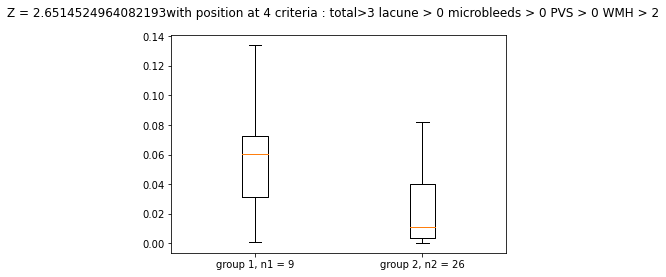

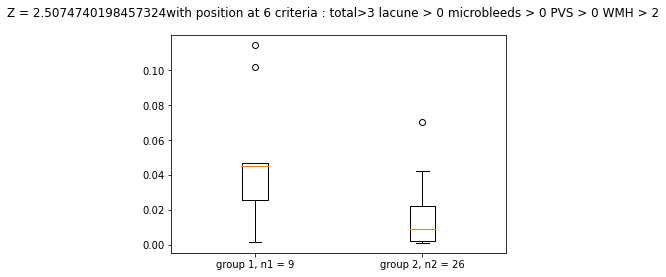

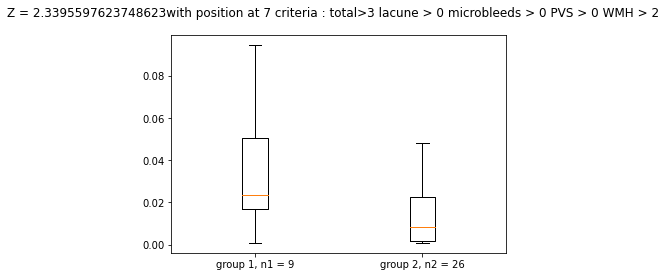

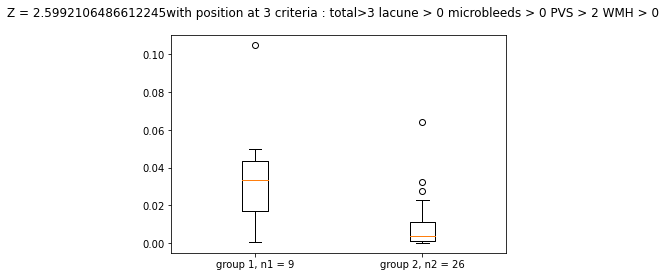

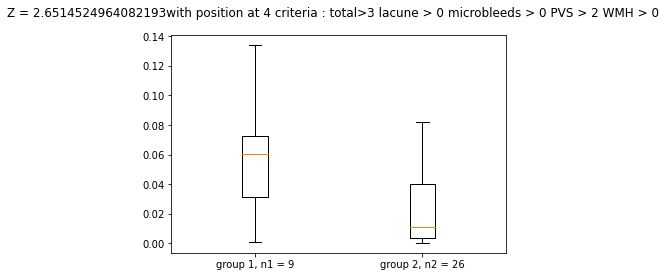

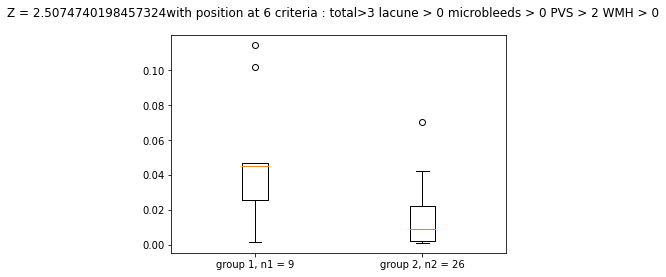

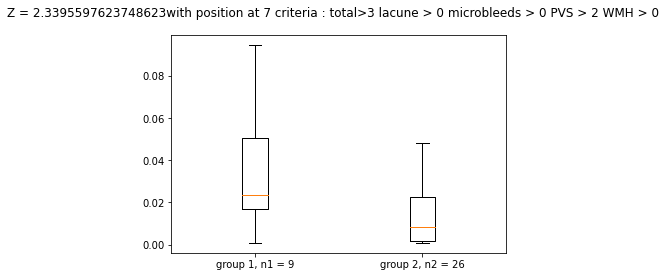

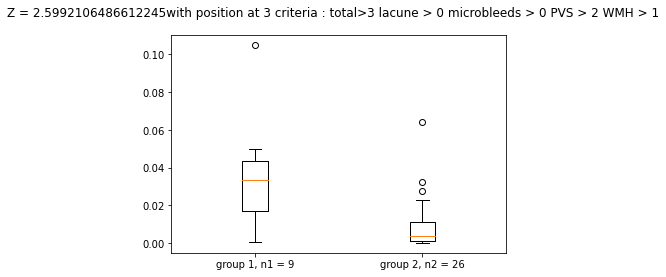

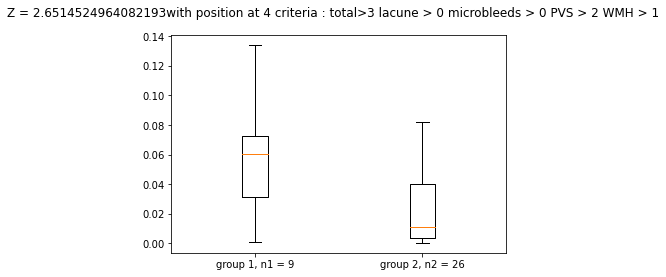

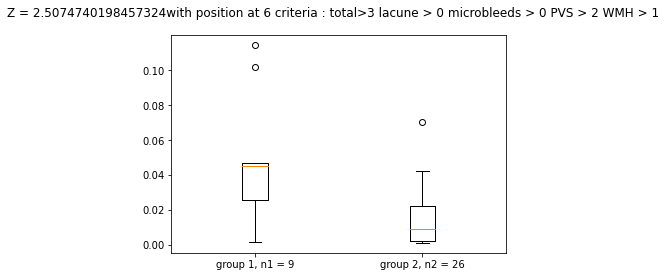

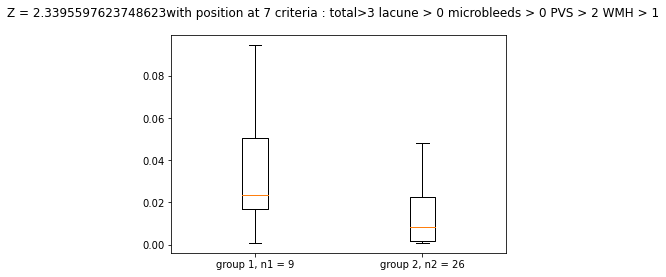

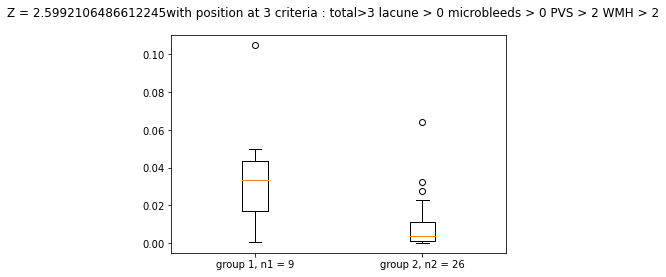

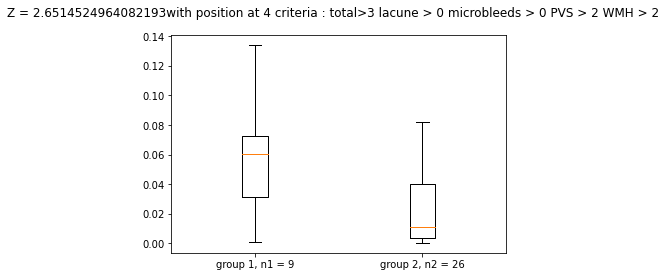

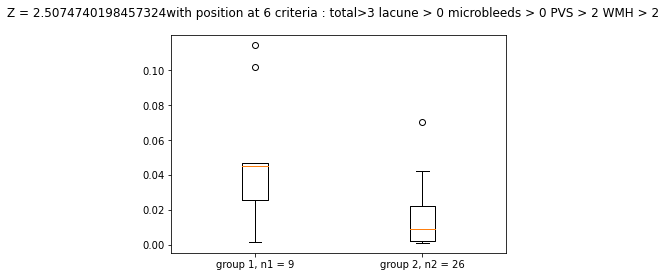

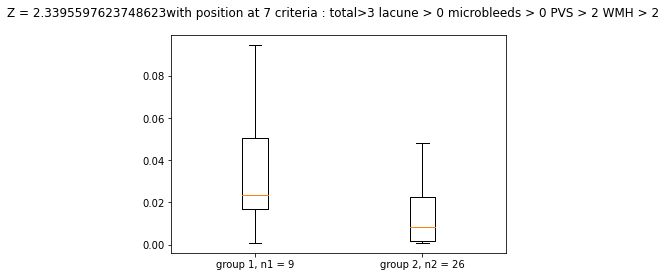

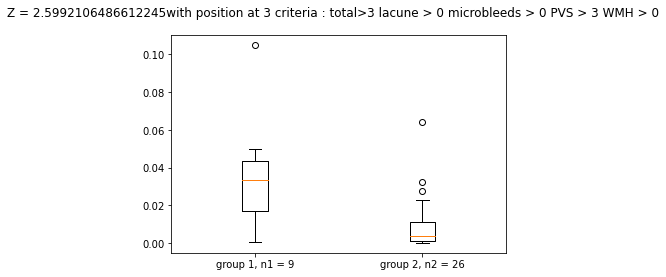

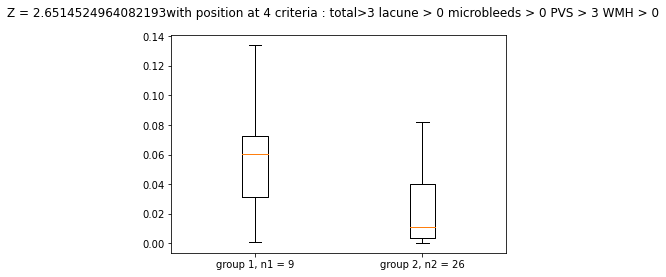

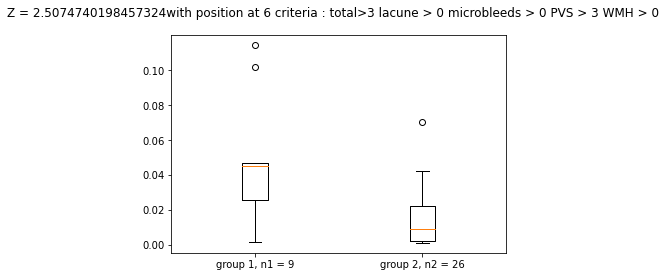

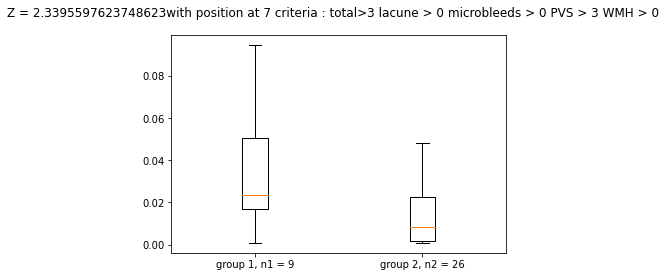

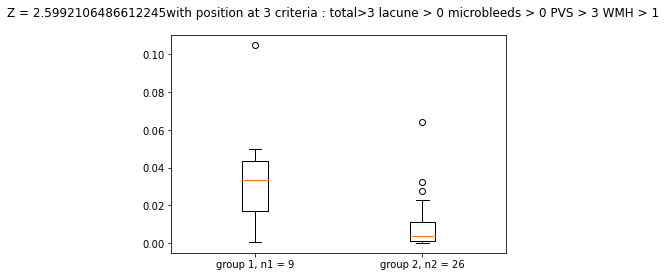

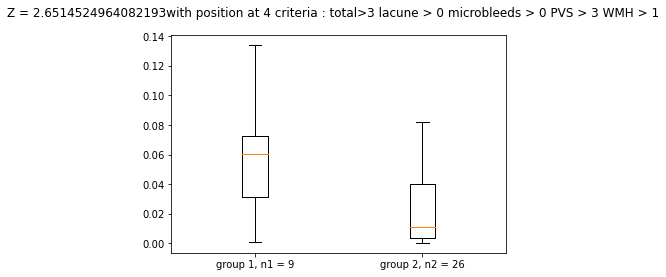

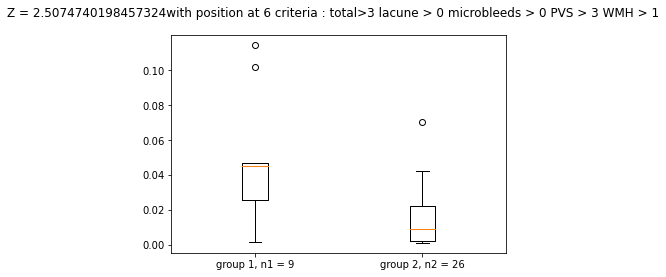

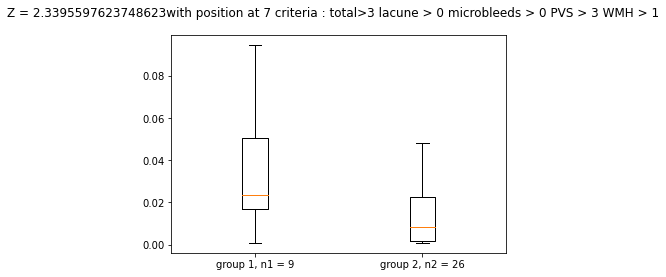

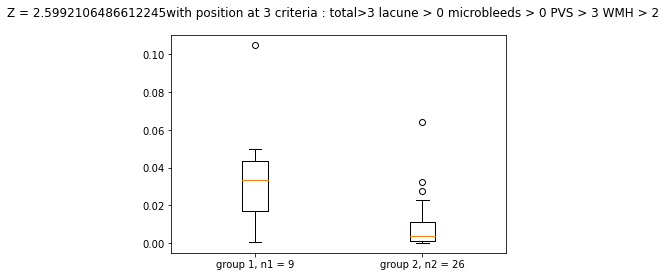

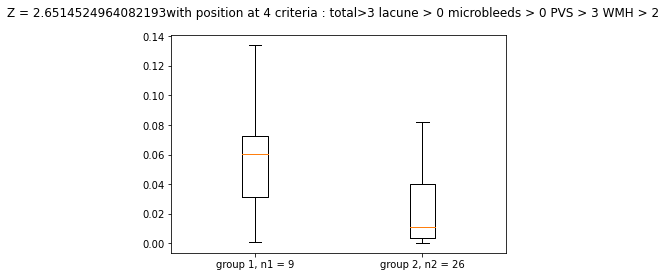

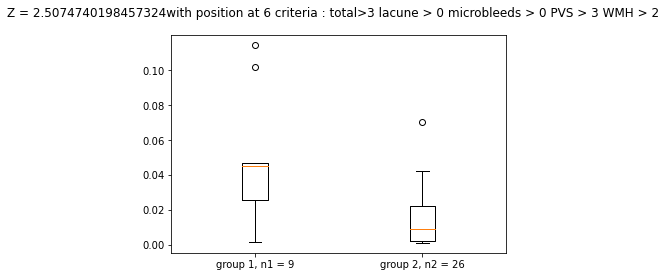

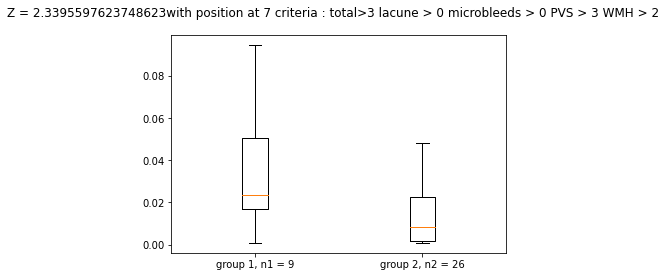

In [99]:
for cri in range(len(criteria_list)):
    for Ki_loc in range(8):
        gp1 = separte_list[cri][0][:,Ki_loc]
        gp2 = separte_list[cri][1][:,Ki_loc]
        if (len(gp1)>8) & (len(gp2)!=0):
#             print(separte_list[cri])
            Z = abs(result_mean[cri][0][Ki_loc]-result_mean[cri][1][Ki_loc])/np.sqrt(result_std[cri][0][Ki_loc]**2/len(separte_list[cri][0][:,Ki_loc]+result_std[cri][1][Ki_loc]**2/len(separte_list[cri][1][:,Ki_loc])))
            if Z>1.96:
                label_1 = "group 1, n1 = "+str(len(gp1))
                label_2 = "group 2, n2 = "+str(len(gp2))
                plt.boxplot([gp1, gp2], labels=(label_1, label_2))
                plt.suptitle("Z = "+str(Z)+ "with position at "+str(Ki_loc)+ " criteria : total>"+str(criteria_list[cri][0])+" lacune > "+str(criteria_list[cri][1])+" microbleeds > "+str(criteria_list[cri][2])+" PVS > "+str(criteria_list[cri][3])+" WMH > "+str(criteria_list[cri][4]))
                plt.show()